# GeekBrains
# Введение в нейроные сети
## ДЗ Урока 2
## Виталий Казанцев

Используем набор примеров fasion-MNIST  
1 Опишите какой результат получен в нейро сети в зависимости от:  
 - Числа нейронов в слое (для 2-хслойной сети)   
 - Числа слоев(2, 3,5, 10) при близких размерах сети (близкле число тренируемых параметров)  
 - фиксируйте для тренировочного итестового набора метрики accuracy  
 
2 Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1  
  
3 Сделайте выод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?  
  
4 Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно(полнота, точность). Сделайте вывод.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist, mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 28, 28)
print(test_images.shape) # (60000,)

2022-11-29 20:56:25.492795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 784)
(10000, 784)


In [2]:
n = 1
train_imagesi[n,:,:].shape

(28, 28)

In [3]:
keras.backend.backend()

'tensorflow'

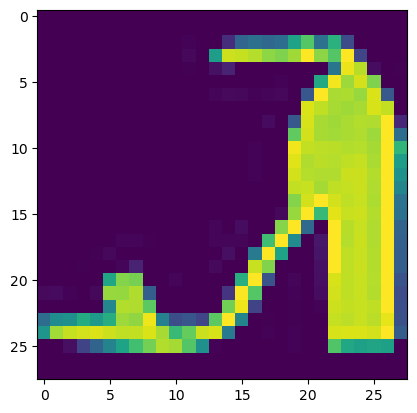

5


In [4]:
n = 2591
plt.imshow(train_imagesi[n, :, :])
plt.show()
print(train_labels[n])

In [5]:
train_labels[:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [6]:
model1 = Sequential(name='my_first_model')
model1.add(Dense(128, activation='relu', input_shape=(784,)))
for k in range(2):
    model1.add(Dense(10+(10-k)*10, activation='tanh'))
    
model1.add(Dense(10, activation='softmax'))

2022-11-29 20:56:27.710391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model1.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [8]:
model1.summary()

Model: "my_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [9]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [10]:
model1.fit(
    train_images[:, :],
    y_t[:, :],
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

model1.evaluate(
    test_images,
    y_tt
)

Epoch 1/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4978 - accuracy: 0.8186 - val_loss: 0.3998 - val_accuracy: 0.8565
Epoch 2/2
313/313 [==============================] - 0s 813us/step - loss: 0.4224 - accuracy: 0.8492


[0.4224373996257782, 0.8492000102996826]

In [11]:
predictions = model1.predict(test_images[:5])

print(np.argmax(predictions, axis=1))

print(test_labels[:5])

1/1 [==============================] - 0s 64ms/step
[9 2 1 1 6]
[9 2 1 1 6]


__Задание 1__  
1 Опишите какой результат получен в нейро сети в зависимости от:  
 - Числа нейронов в слое (для 2-хслойной сети)   
 - Числа слоев(2, 3,5, 10) при близких размерах сети (близкoе число тренируемых параметров)  
 - фиксируйте для тренировочного и тестового набора метрики accuracy 

In [12]:
def make_model1(neurons):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(784,)),
        Dense(neurons, activation='softmax'),
    ])
    
    model.compile(
        optimizer='adam',
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    model.summary()
    
    hh = model1.fit(
        train_images[:, :],
        y_t[:, :],
        epochs=2,
        batch_size=32,
        validation_split=0.2
    )
    model1.evaluate(
        test_images,
        y_tt
    )
    hh.history
    plt.figure(figsize=(15,7))
    plt.plot(hh.history['loss'], label = 'Потери для тренировки')
    plt.plot(hh.history['val_loss'], label = 'Потери для валидации')
    plt.xlabel('эпохи')
    plt.ylabel('loss')
    plt.legend()
    plt.grid('On')
    plt.title('потери от эпох')
    plt.show()
    return

In [13]:
neurons = np.arange(1,101)
neurons

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 785       
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 787
Trainable params: 787
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3478 - accuracy: 0.8715 - val_loss: 0.3453 - val_accuracy: 0.8741
Epoch 2/2
313/313 [==============================] - 0s 797us/step - loss: 0.3855 - accuracy: 0.8584


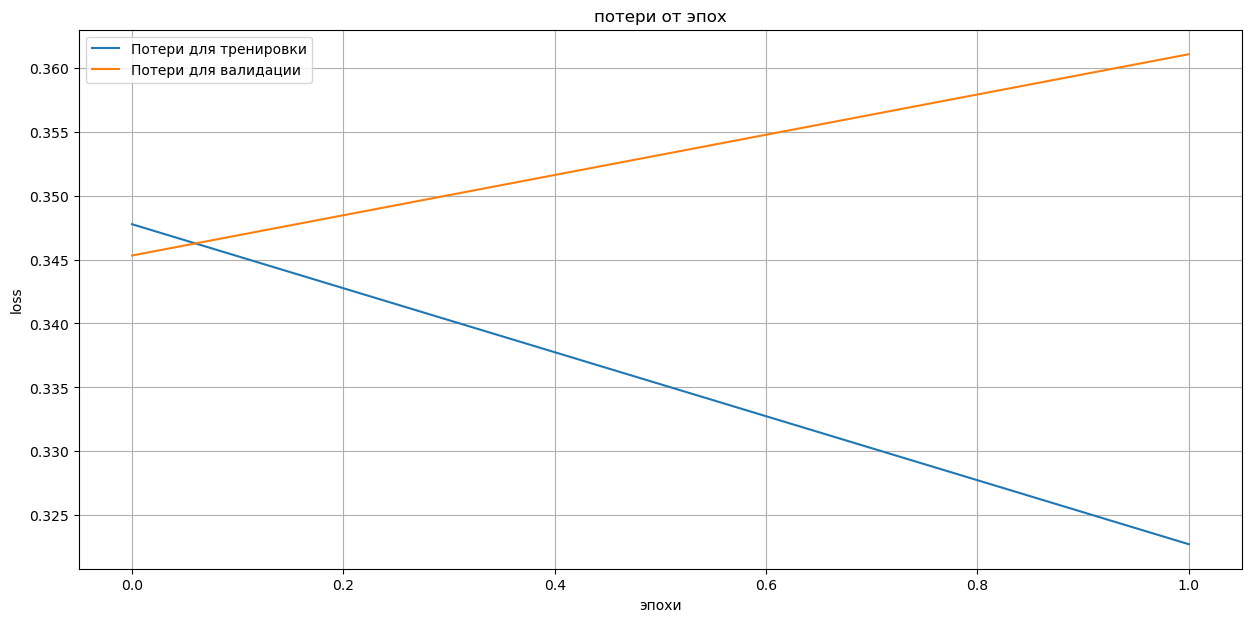

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 1570      
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
Total params: 1,576
Trainable params: 1,576
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3063 - accuracy: 0.8864 - val_loss: 0.3723 - val_accuracy: 0.8679
Epoch 2/2
313/313 [==============================] - 0s 800us/step - loss: 0.3593 - accuracy: 0.8723


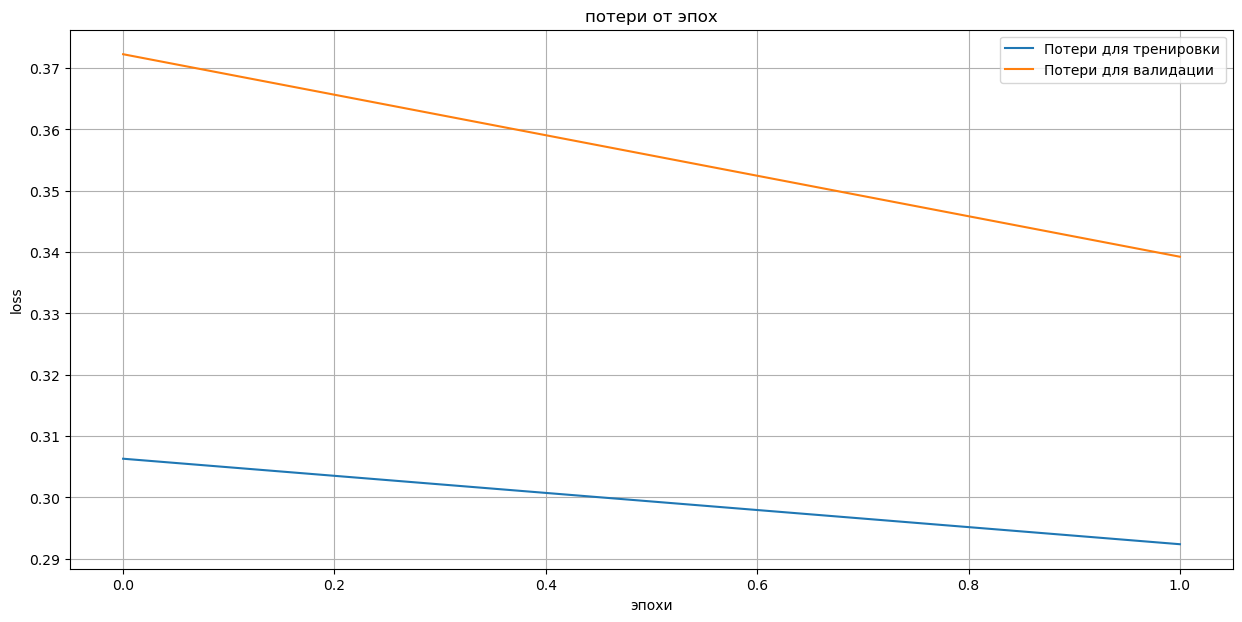

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 2355      
                                                                 
 dense_9 (Dense)             (None, 3)                 12        
                                                                 
Total params: 2,367
Trainable params: 2,367
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2799 - accuracy: 0.8961 - val_loss: 0.3386 - val_accuracy: 0.8767
Epoch 2/2
313/313 [==============================] - 0s 902us/step - loss: 0.3571 - accuracy: 0.8768


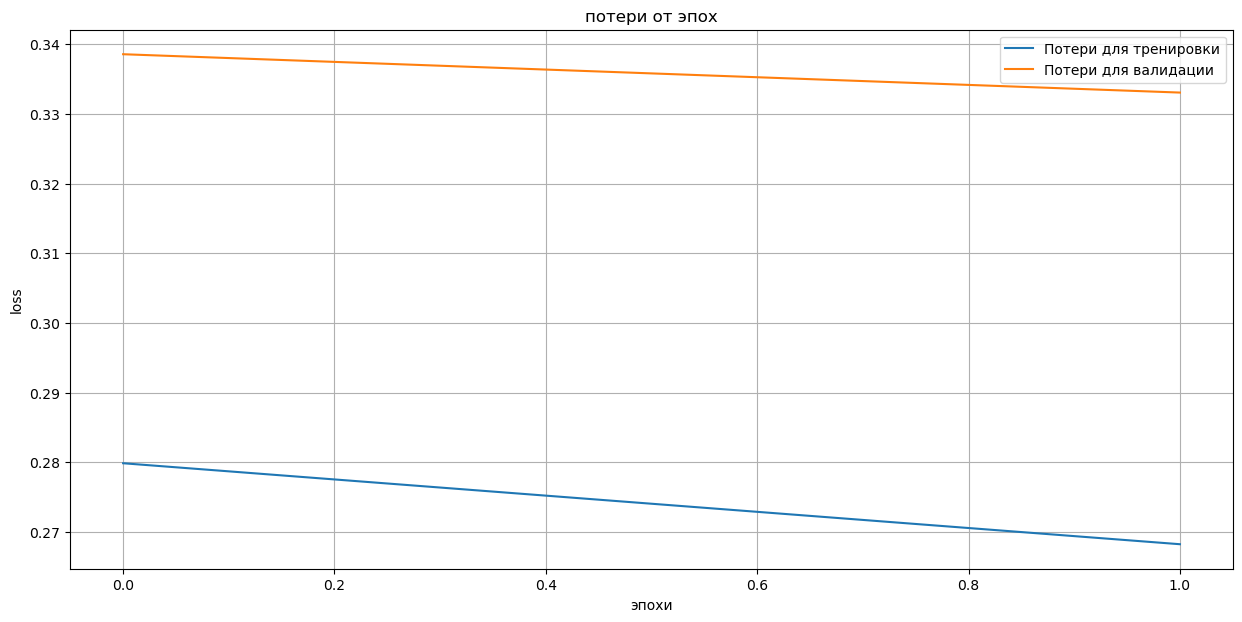

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 3140      
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
Total params: 3,160
Trainable params: 3,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2590 - accuracy: 0.9029 - val_loss: 0.3529 - val_accuracy: 0.8728
Epoch 2/2
313/313 [==============================] - 0s 790us/step - loss: 0.3534 - accuracy: 0.8742


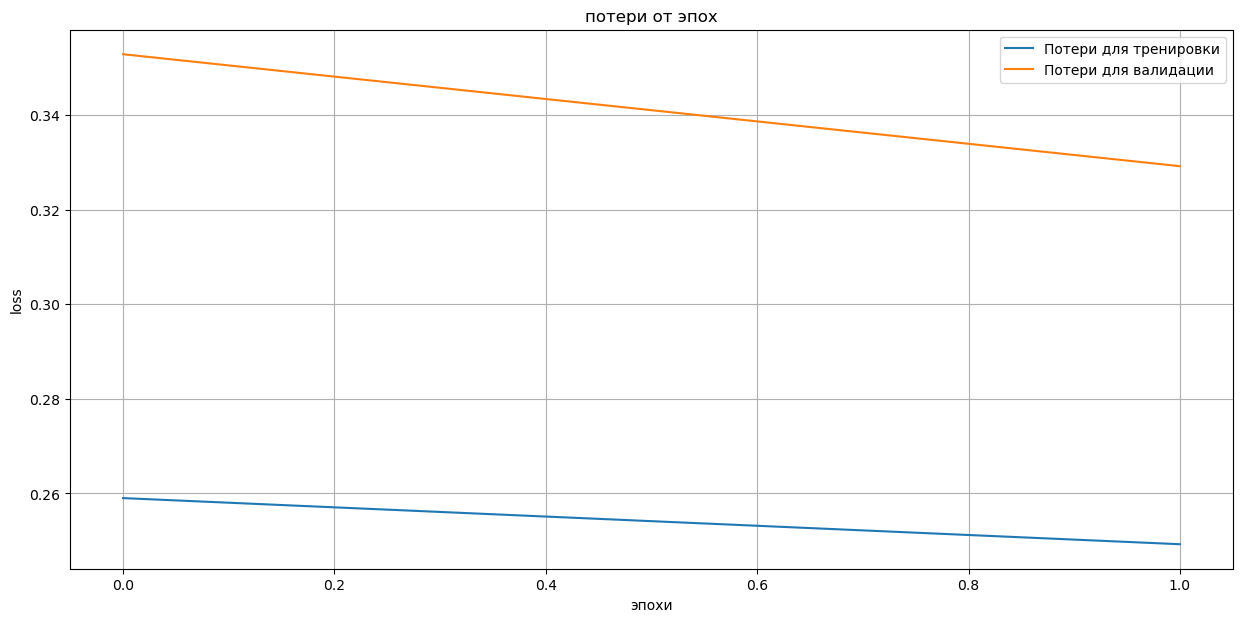

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 3925      
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
Total params: 3,955
Trainable params: 3,955
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2408 - accuracy: 0.9098 - val_loss: 0.3301 - val_accuracy: 0.8863
Epoch 2/2
313/313 [==============================] - 0s 800us/step - loss: 0.3577 - accuracy: 0.8773


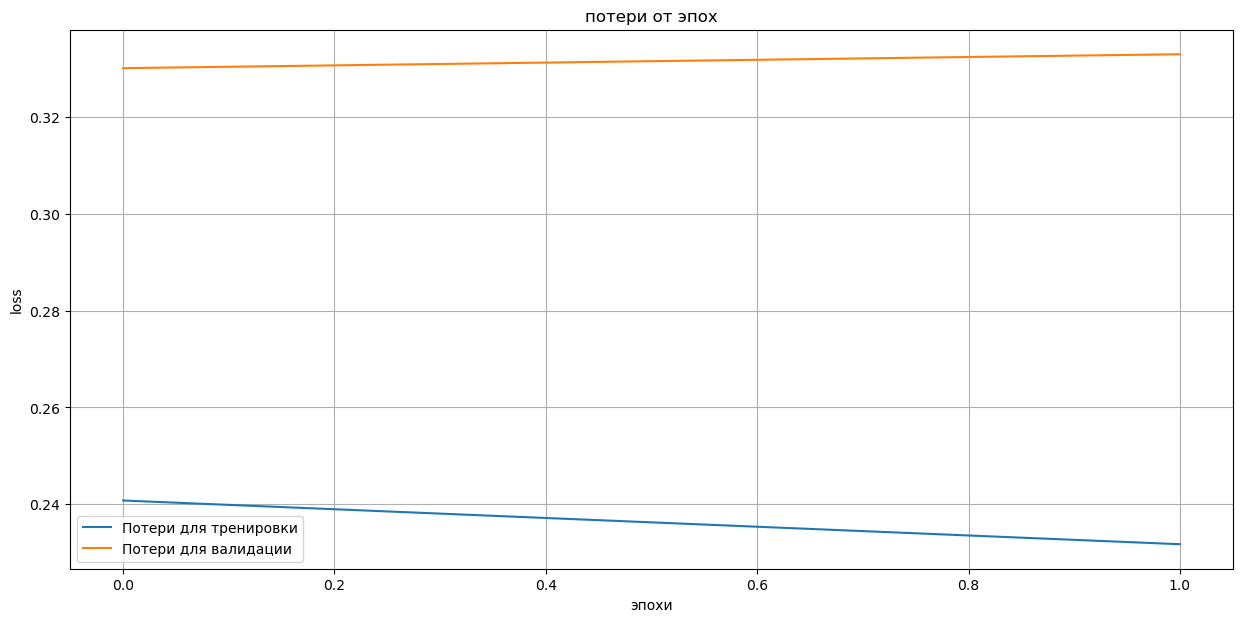

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 4710      
                                                                 
 dense_15 (Dense)            (None, 6)                 42        
                                                                 
Total params: 4,752
Trainable params: 4,752
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2248 - accuracy: 0.9173 - val_loss: 0.3477 - val_accuracy: 0.8796
Epoch 2/2
313/313 [==============================] - 0s 801us/step - loss: 0.3734 - accuracy: 0.8713


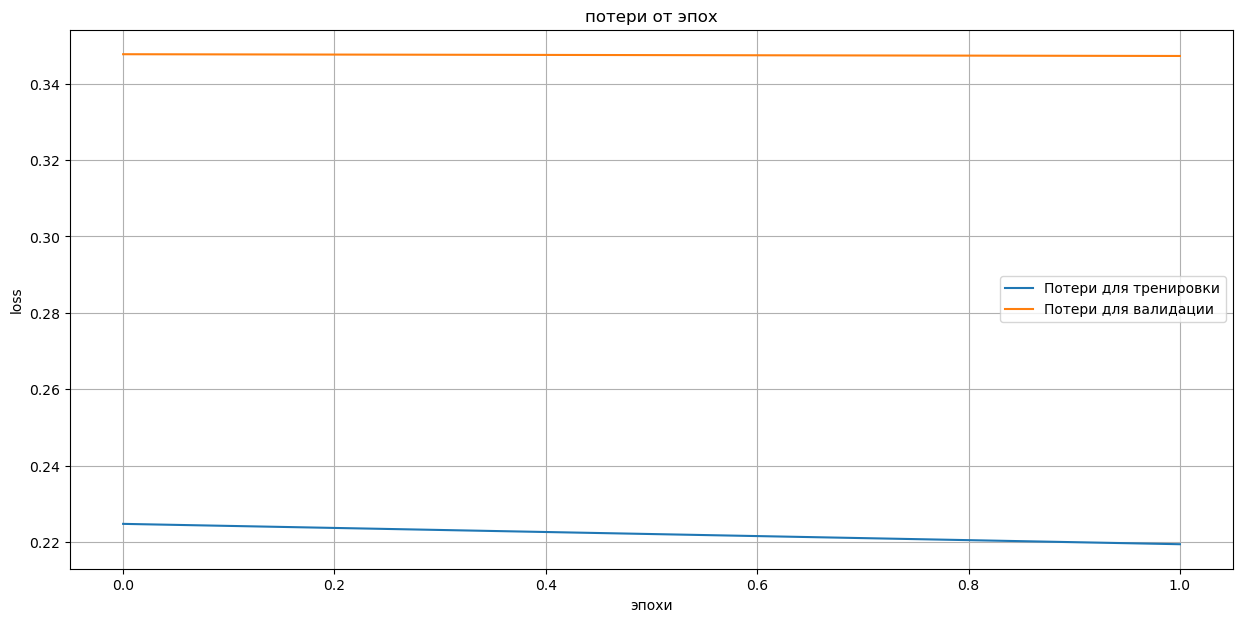

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 7)                 5495      
                                                                 
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
Total params: 5,551
Trainable params: 5,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2136 - accuracy: 0.9206 - val_loss: 0.3502 - val_accuracy: 0.8787
Epoch 2/2
313/313 [==============================] - 0s 787us/step - loss: 0.3672 - accuracy: 0.8757


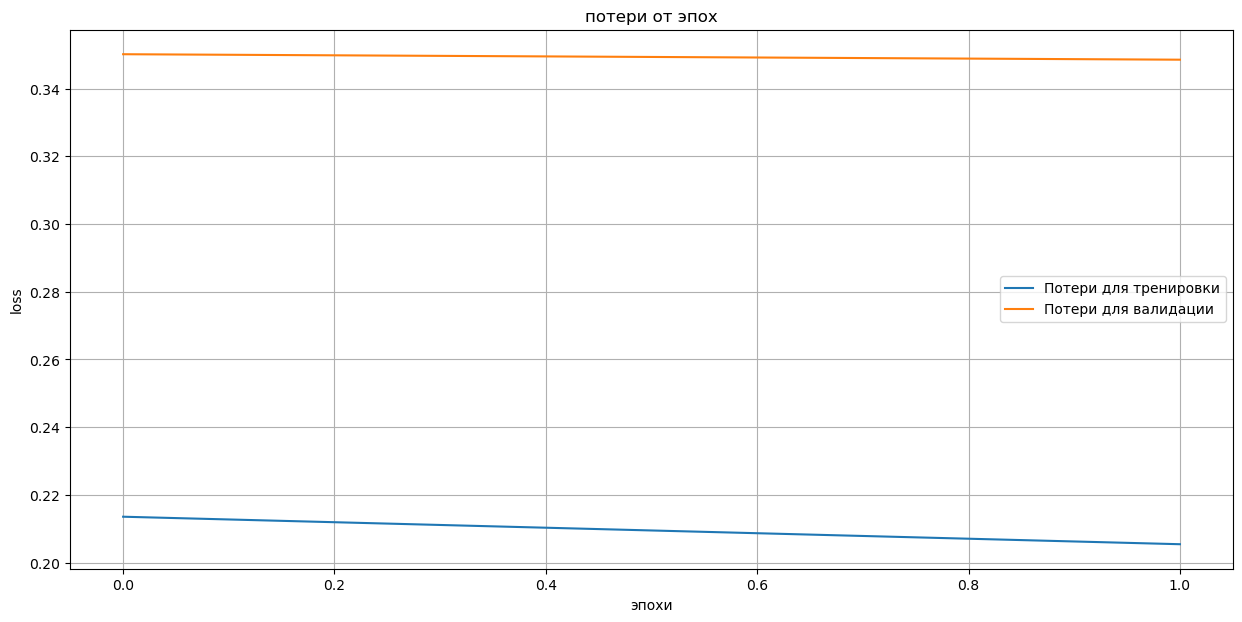

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 6280      
                                                                 
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
Total params: 6,352
Trainable params: 6,352
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2014 - accuracy: 0.9240 - val_loss: 0.3397 - val_accuracy: 0.8857
Epoch 2/2
313/313 [==============================] - 0s 782us/step - loss: 0.3681 - accuracy: 0.8808


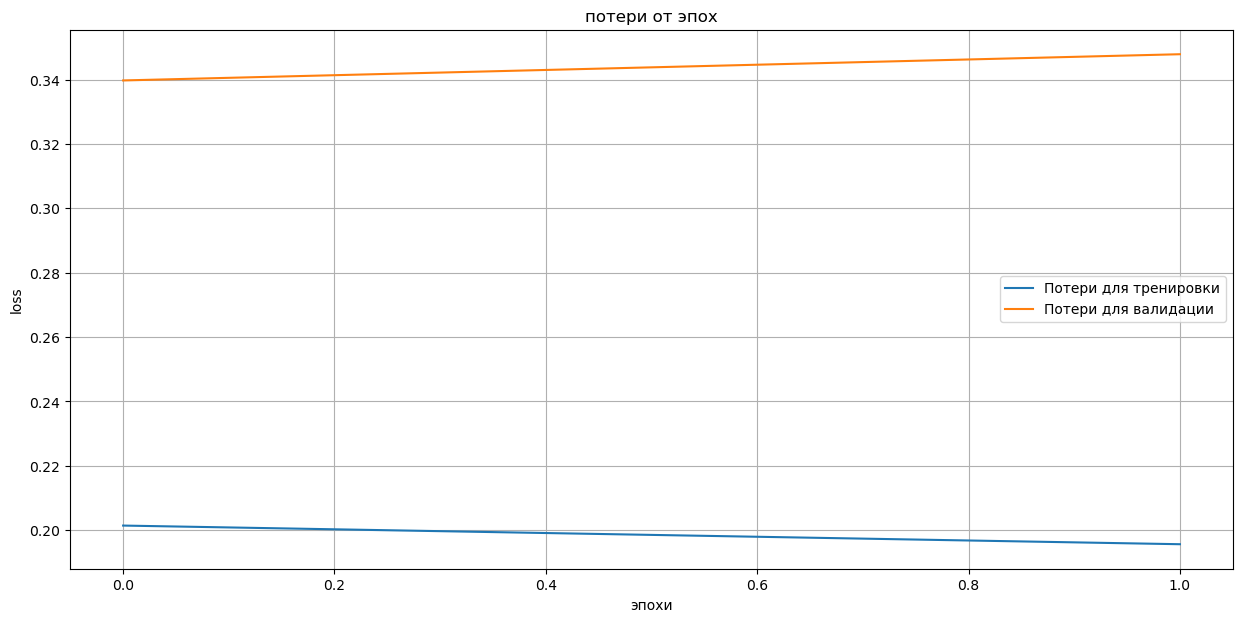

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 9)                 7065      
                                                                 
 dense_21 (Dense)            (None, 9)                 90        
                                                                 
Total params: 7,155
Trainable params: 7,155
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1906 - accuracy: 0.9287 - val_loss: 0.3633 - val_accuracy: 0.8790
Epoch 2/2
313/313 [==============================] - 0s 834us/step - loss: 0.3520 - accuracy: 0.8831


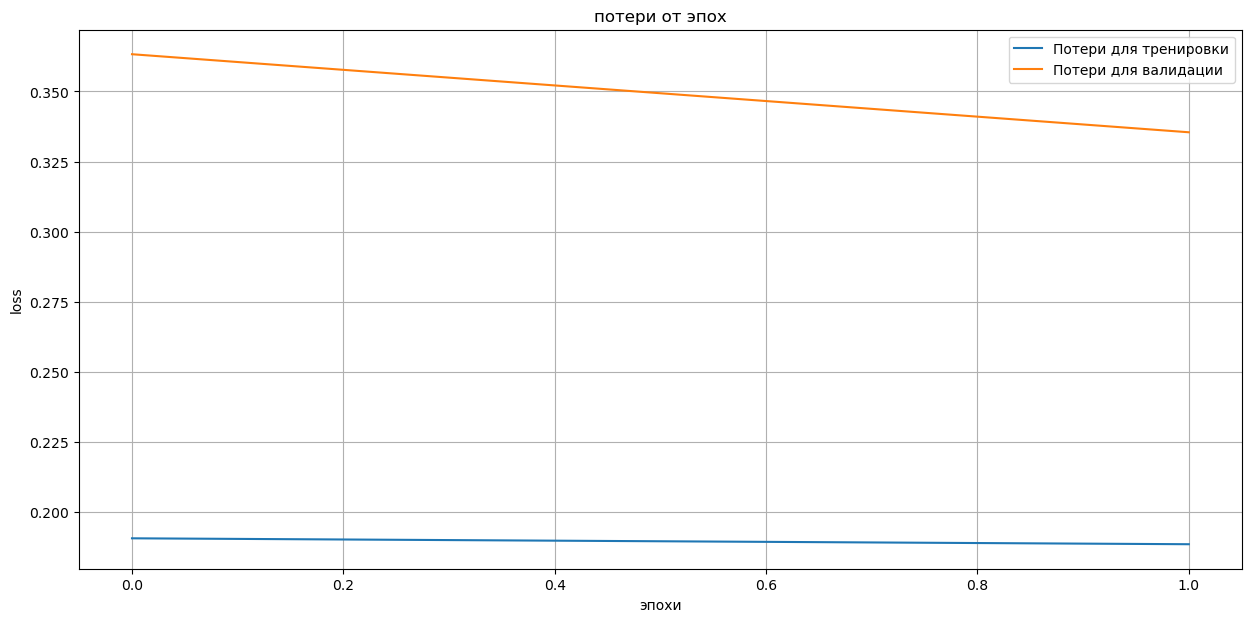

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1849 - accuracy: 0.9305 - val_loss: 0.3476 - val_accuracy: 0.8839
Epoch 2/2
313/313 [==============================] - 0s 850us/step - loss: 0.3799 - accuracy: 0.8785


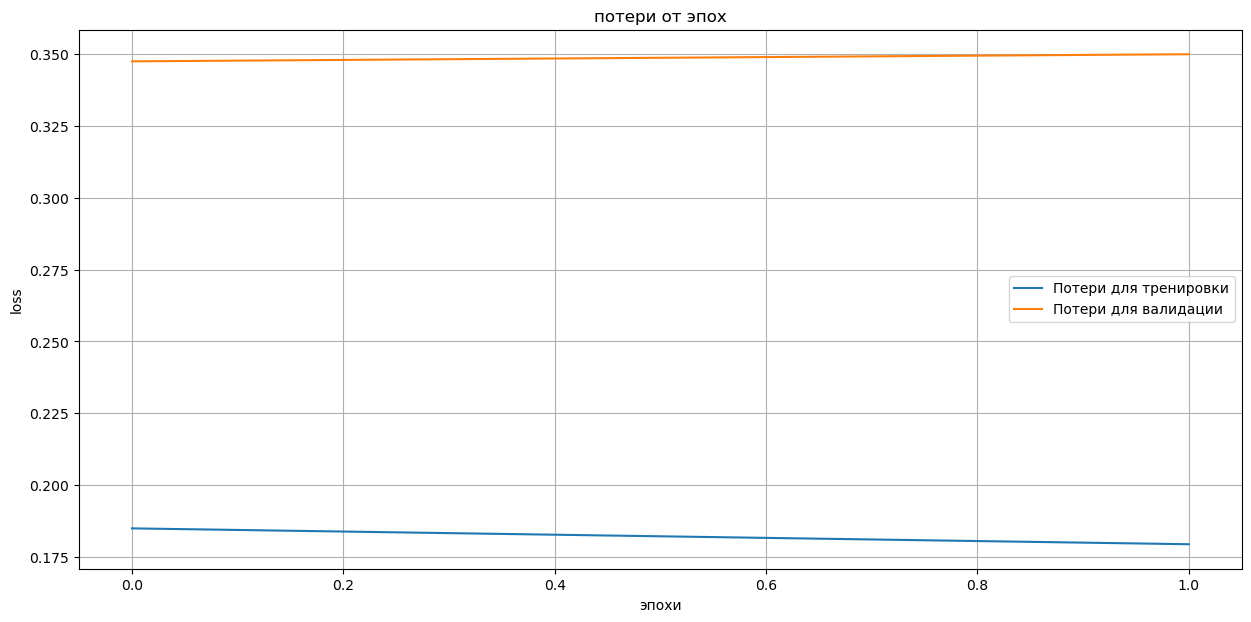

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 11)                8635      
                                                                 
 dense_25 (Dense)            (None, 11)                132       
                                                                 
Total params: 8,767
Trainable params: 8,767
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1765 - accuracy: 0.9353 - val_loss: 0.3502 - val_accuracy: 0.8865
Epoch 2/2
313/313 [==============================] - 0s 791us/step - loss: 0.3712 - accuracy: 0.8814


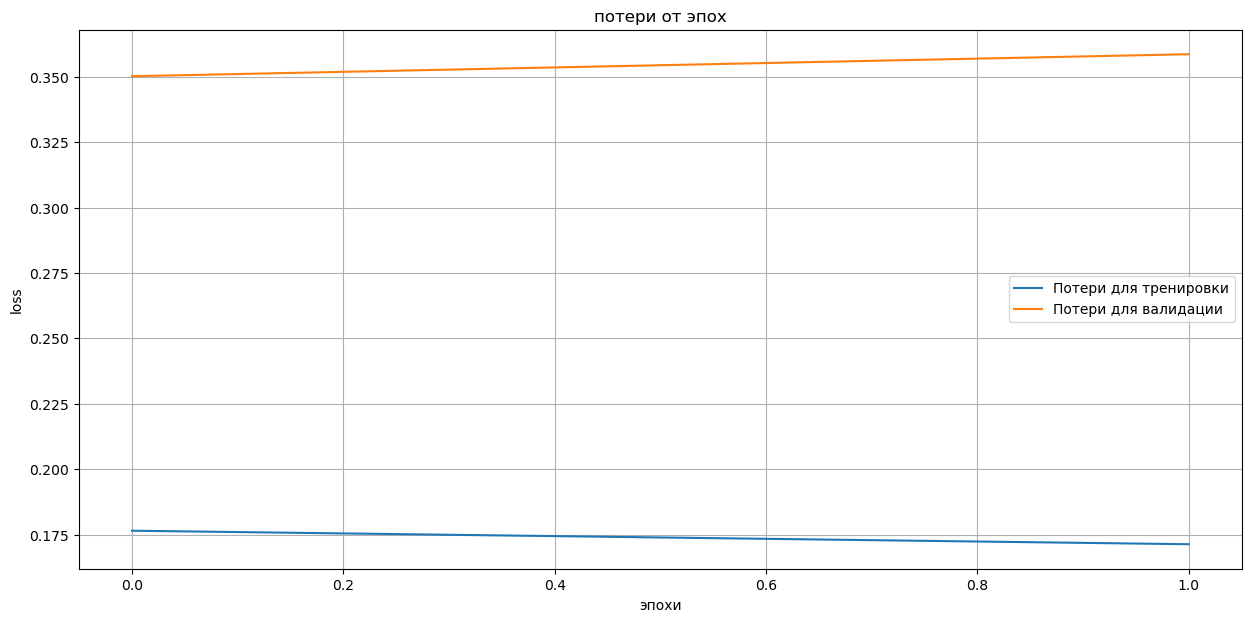

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 12)                9420      
                                                                 
 dense_27 (Dense)            (None, 12)                156       
                                                                 
Total params: 9,576
Trainable params: 9,576
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1690 - accuracy: 0.9364 - val_loss: 0.3577 - val_accuracy: 0.8808
Epoch 2/2
313/313 [==============================] - 0s 786us/step - loss: 0.3761 - accuracy: 0.8834


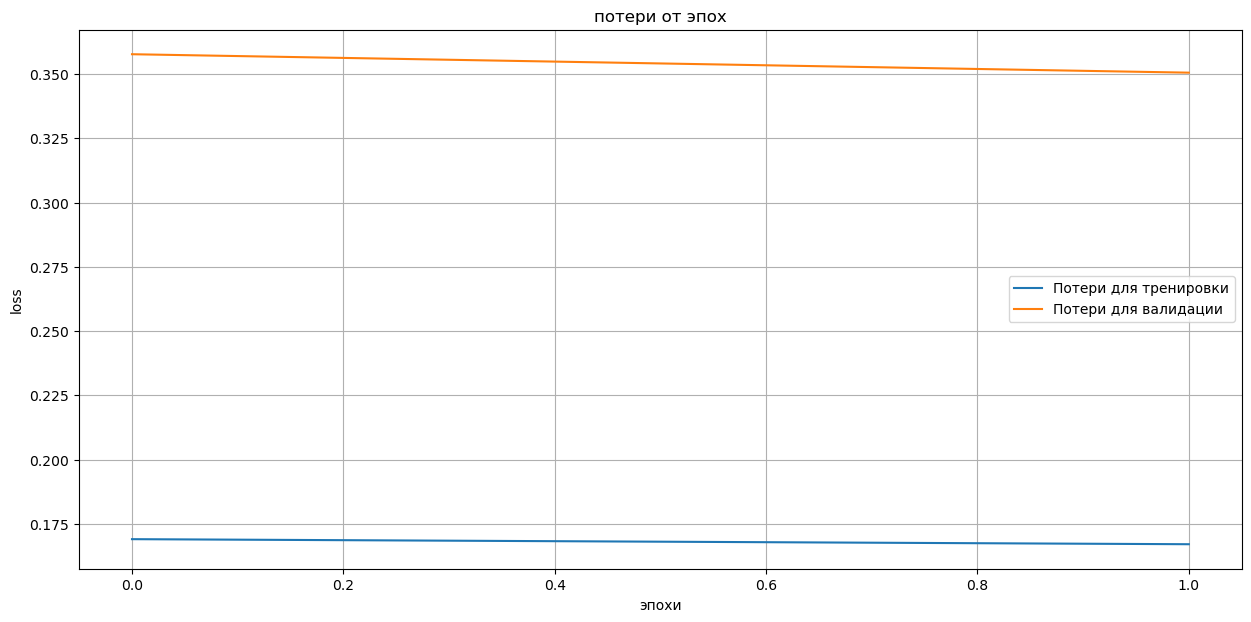

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 13)                10205     
                                                                 
 dense_29 (Dense)            (None, 13)                182       
                                                                 
Total params: 10,387
Trainable params: 10,387
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1602 - accuracy: 0.9401 - val_loss: 0.3629 - val_accuracy: 0.8857
Epoch 2/2
313/313 [==============================] - 0s 790us/step - loss: 0.4051 - accuracy: 0.8762


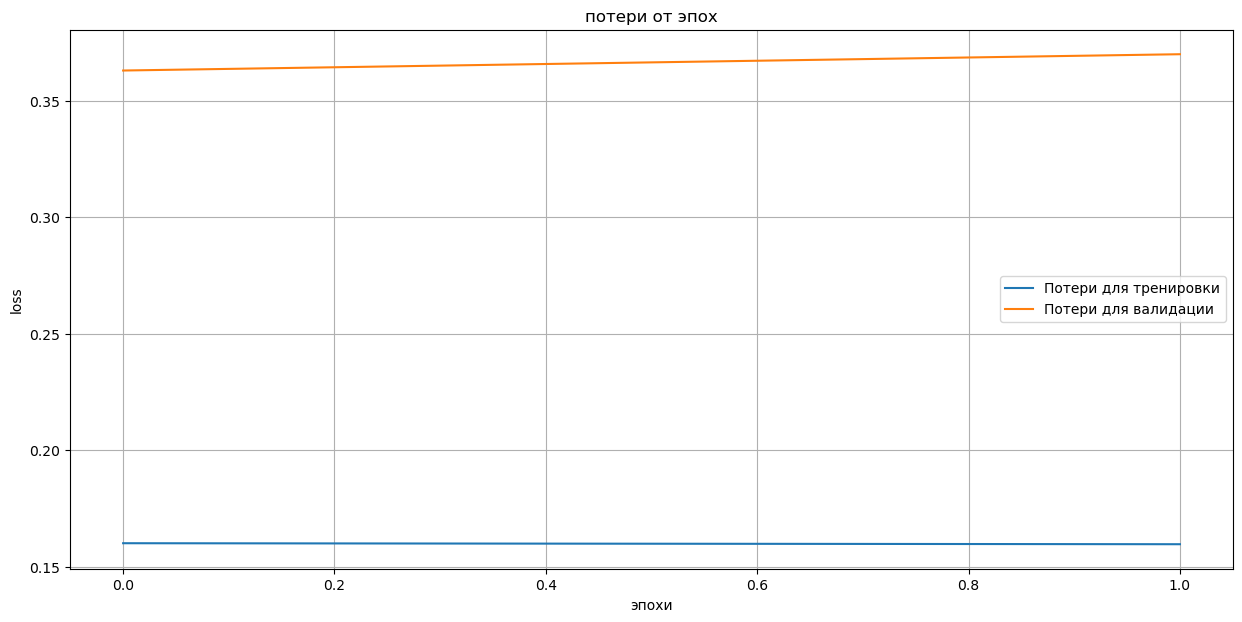

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 14)                10990     
                                                                 
 dense_31 (Dense)            (None, 14)                210       
                                                                 
Total params: 11,200
Trainable params: 11,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1545 - accuracy: 0.9421 - val_loss: 0.3794 - val_accuracy: 0.8881
Epoch 2/2
313/313 [==============================] - 0s 788us/step - loss: 0.4088 - accuracy: 0.8764


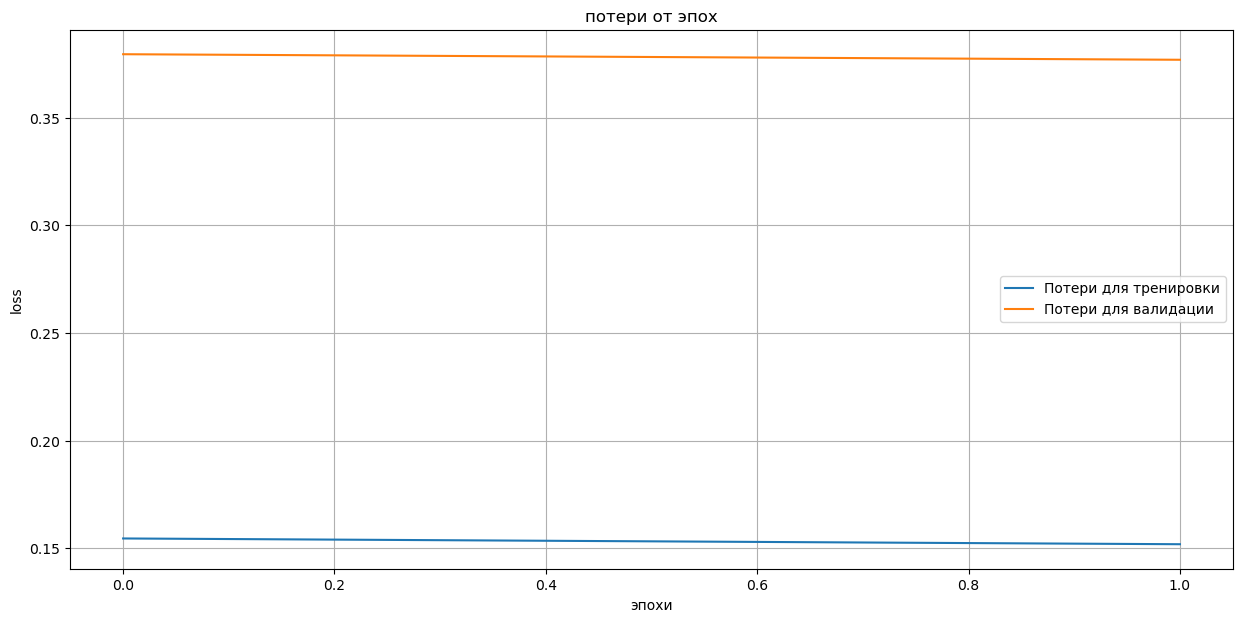

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 15)                11775     
                                                                 
 dense_33 (Dense)            (None, 15)                240       
                                                                 
Total params: 12,015
Trainable params: 12,015
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1489 - accuracy: 0.9442 - val_loss: 0.3741 - val_accuracy: 0.8856
Epoch 2/2
313/313 [==============================] - 0s 869us/step - loss: 0.4101 - accuracy: 0.8764


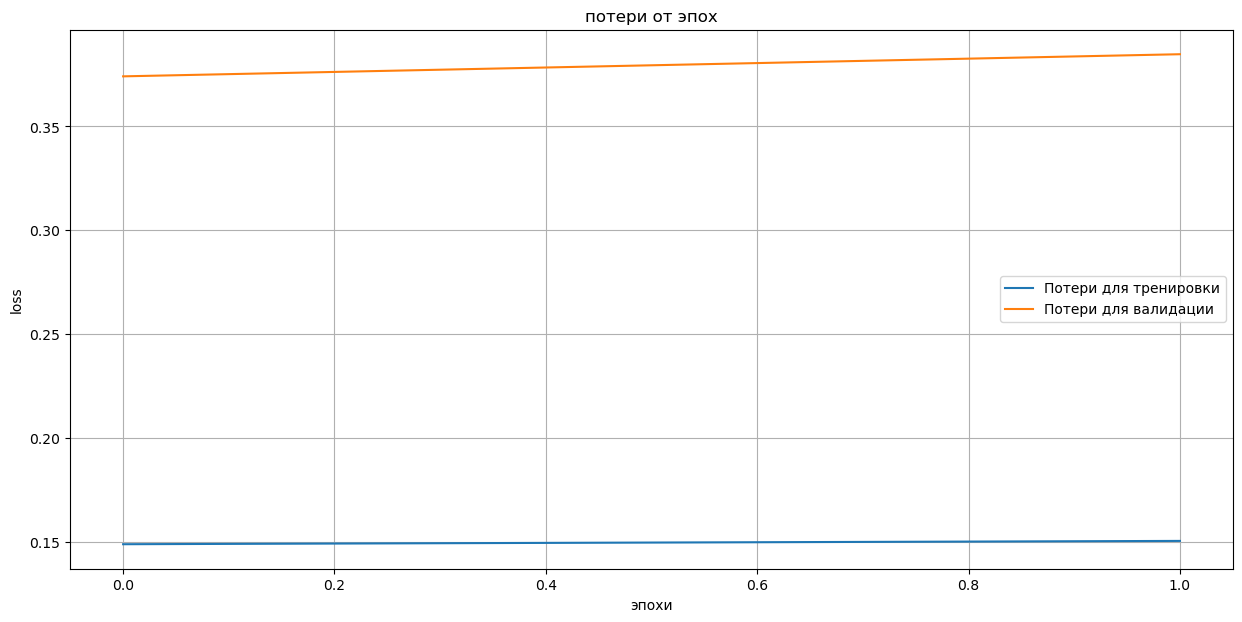

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 16)                12560     
                                                                 
 dense_35 (Dense)            (None, 16)                272       
                                                                 
Total params: 12,832
Trainable params: 12,832
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1460 - accuracy: 0.9444 - val_loss: 0.3903 - val_accuracy: 0.8786
Epoch 2/2
313/313 [==============================] - 0s 824us/step - loss: 0.4051 - accuracy: 0.8800


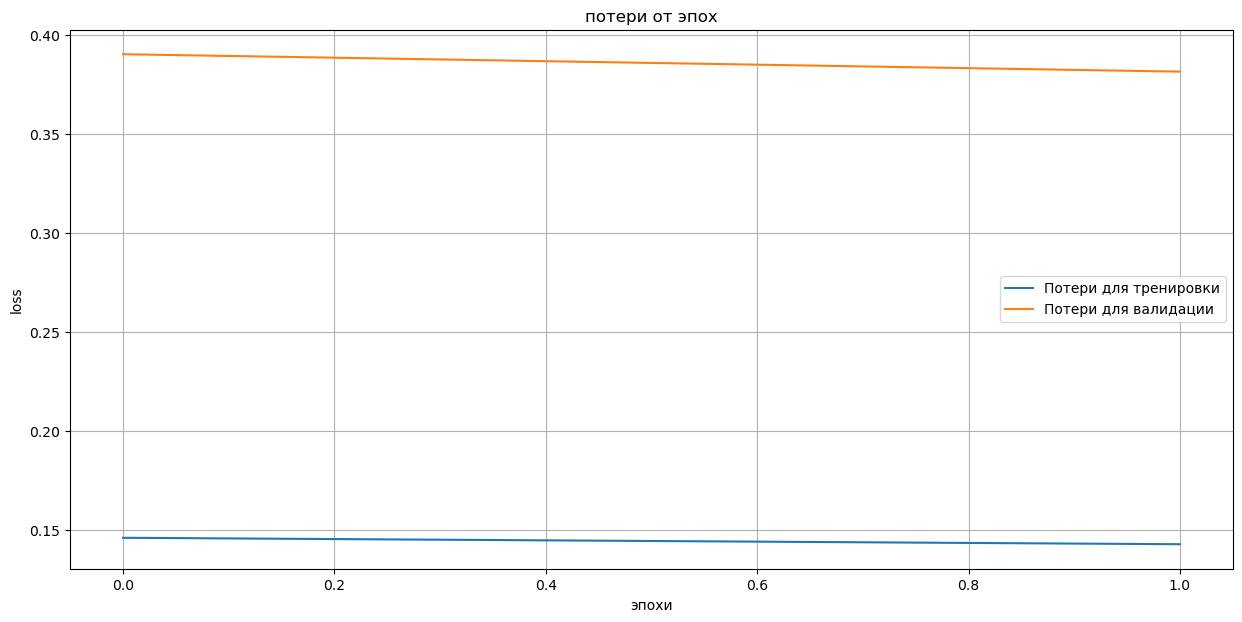

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 17)                13345     
                                                                 
 dense_37 (Dense)            (None, 17)                306       
                                                                 
Total params: 13,651
Trainable params: 13,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1398 - accuracy: 0.9481 - val_loss: 0.3878 - val_accuracy: 0.8868
Epoch 2/2
313/313 [==============================] - 0s 792us/step - loss: 0.3952 - accuracy: 0.8832


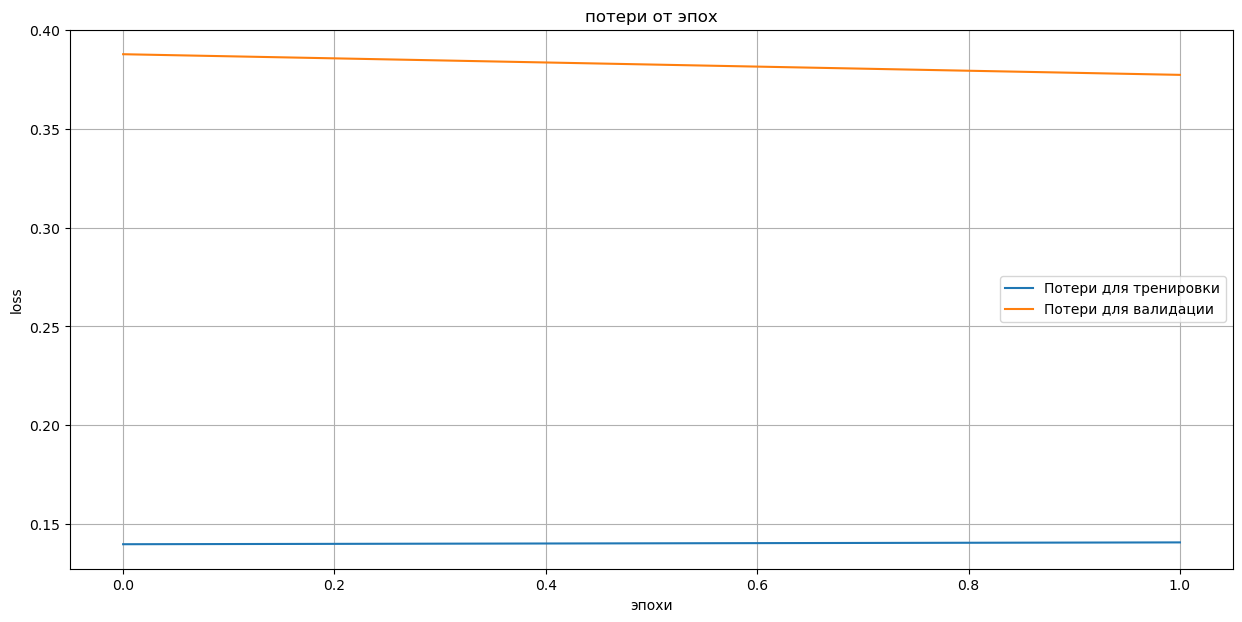

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 18)                14130     
                                                                 
 dense_39 (Dense)            (None, 18)                342       
                                                                 
Total params: 14,472
Trainable params: 14,472
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1370 - accuracy: 0.9491 - val_loss: 0.4231 - val_accuracy: 0.8802
Epoch 2/2
313/313 [==============================] - 0s 815us/step - loss: 0.4089 - accuracy: 0.8818


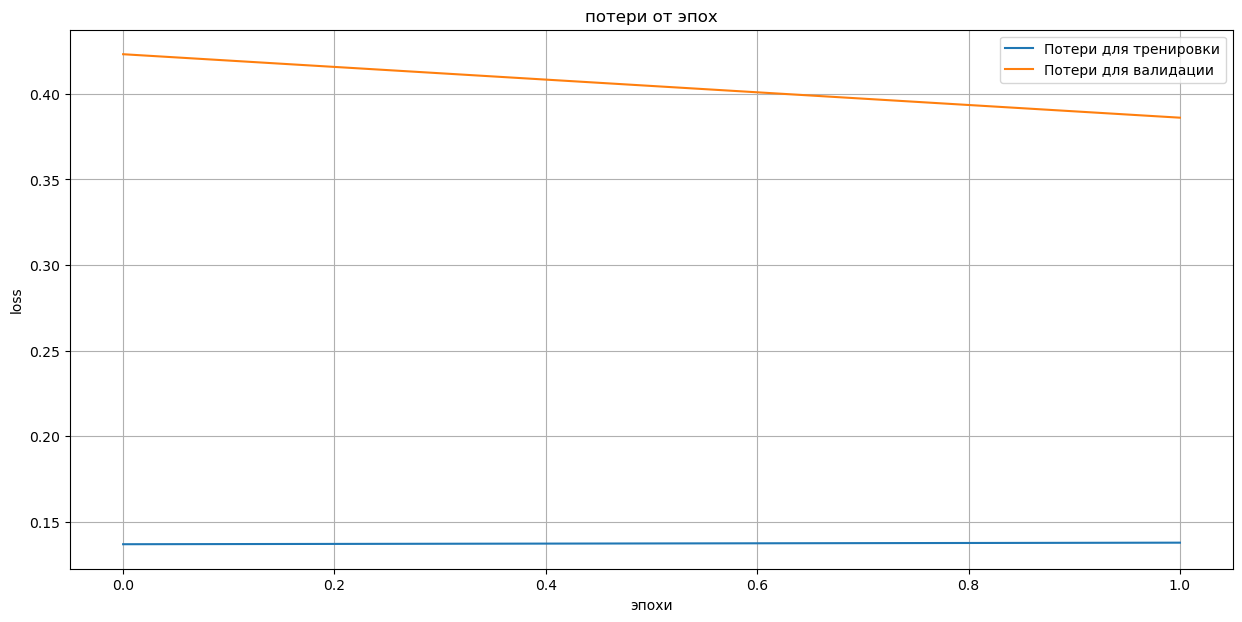

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 19)                14915     
                                                                 
 dense_41 (Dense)            (None, 19)                380       
                                                                 
Total params: 15,295
Trainable params: 15,295
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1388 - accuracy: 0.9476 - val_loss: 0.4001 - val_accuracy: 0.8811
Epoch 2/2
313/313 [==============================] - 0s 822us/step - loss: 0.4169 - accuracy: 0.8811


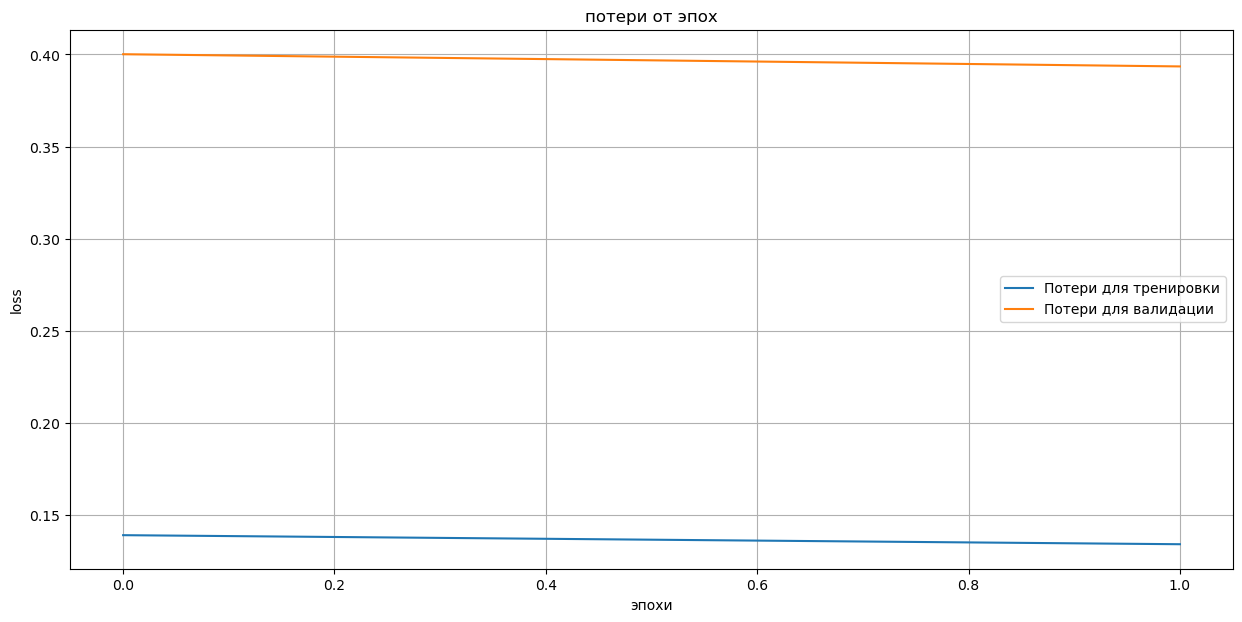

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 20)                15700     
                                                                 
 dense_43 (Dense)            (None, 20)                420       
                                                                 
Total params: 16,120
Trainable params: 16,120
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1281 - accuracy: 0.9518 - val_loss: 0.4087 - val_accuracy: 0.8782
Epoch 2/2
313/313 [==============================] - 0s 789us/step - loss: 0.4099 - accuracy: 0.8821


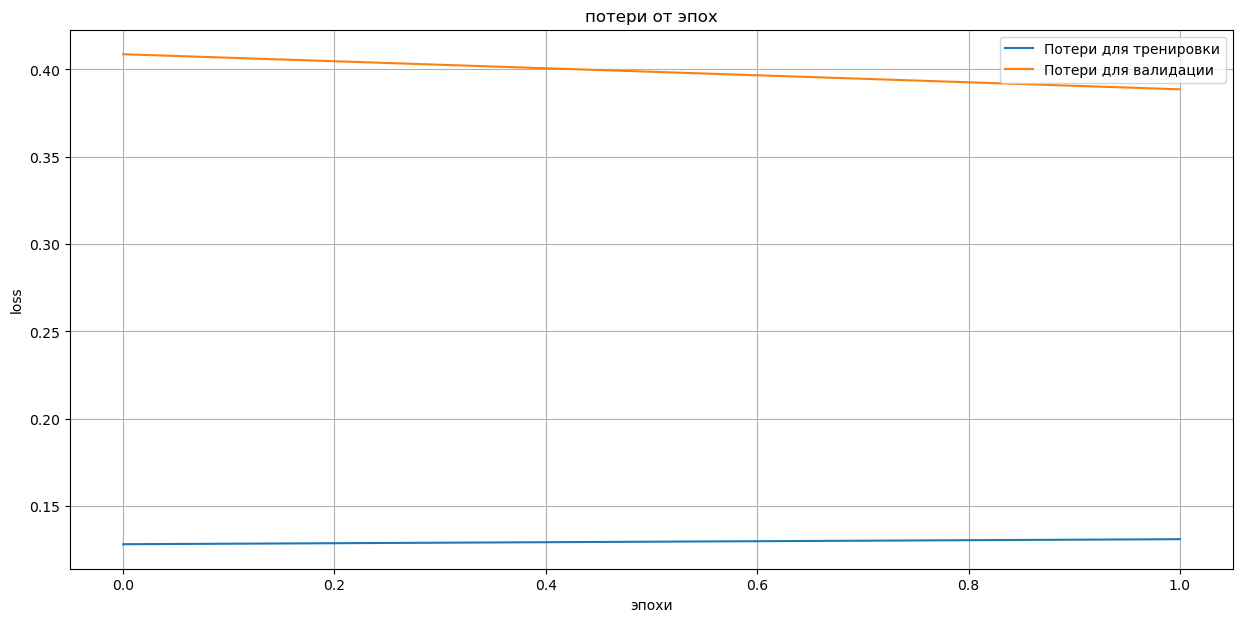

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 21)                16485     
                                                                 
 dense_45 (Dense)            (None, 21)                462       
                                                                 
Total params: 16,947
Trainable params: 16,947
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1252 - accuracy: 0.9531 - val_loss: 0.4147 - val_accuracy: 0.8835
Epoch 2/2
313/313 [==============================] - 0s 819us/step - loss: 0.4714 - accuracy: 0.8745


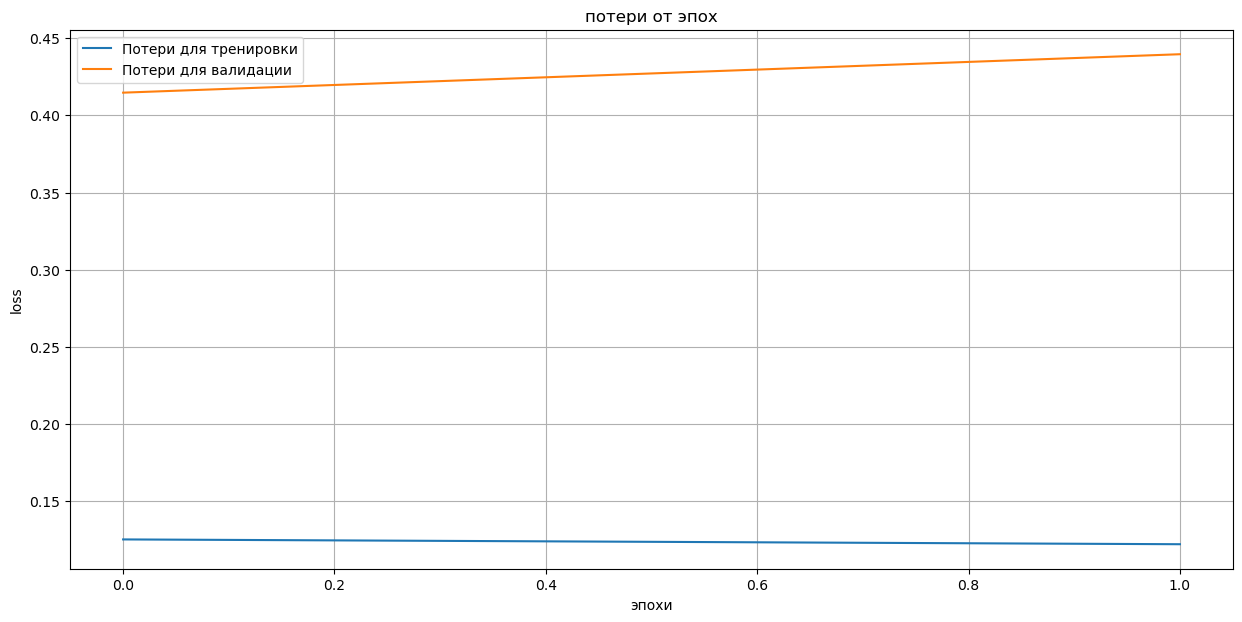

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 22)                17270     
                                                                 
 dense_47 (Dense)            (None, 22)                506       
                                                                 
Total params: 17,776
Trainable params: 17,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1226 - accuracy: 0.9543 - val_loss: 0.4341 - val_accuracy: 0.8783
Epoch 2/2
313/313 [==============================] - 0s 780us/step - loss: 0.4503 - accuracy: 0.8773


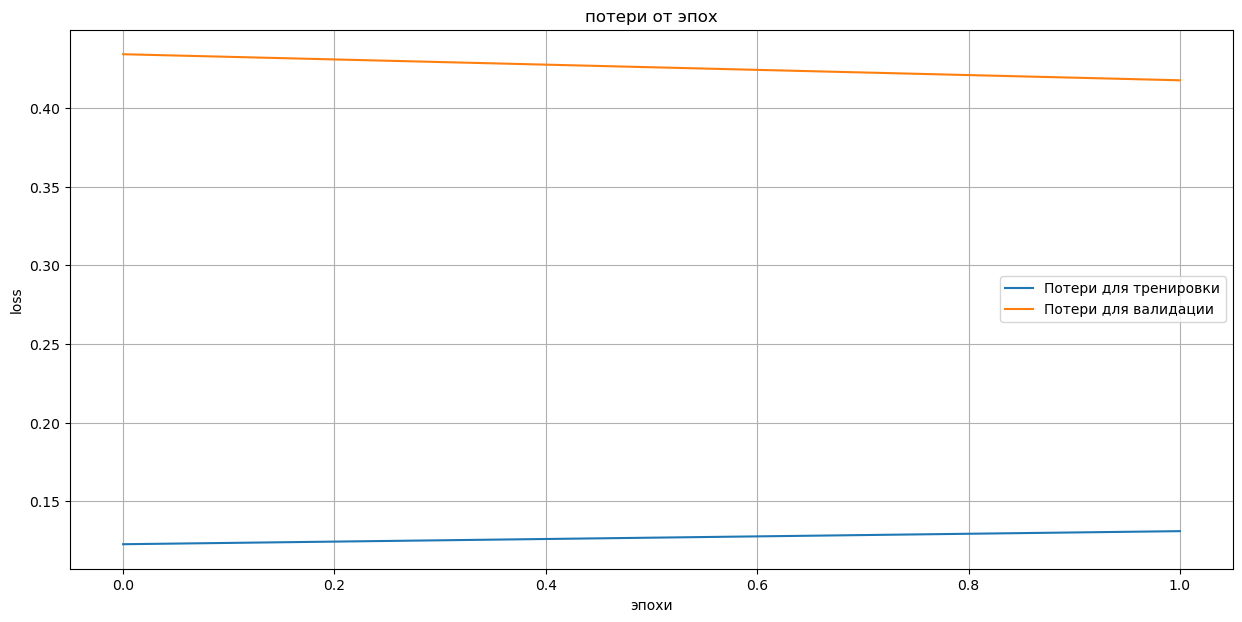

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 23)                18055     
                                                                 
 dense_49 (Dense)            (None, 23)                552       
                                                                 
Total params: 18,607
Trainable params: 18,607
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1237 - accuracy: 0.9536 - val_loss: 0.4211 - val_accuracy: 0.8878
Epoch 2/2
313/313 [==============================] - 0s 792us/step - loss: 0.4289 - accuracy: 0.8801


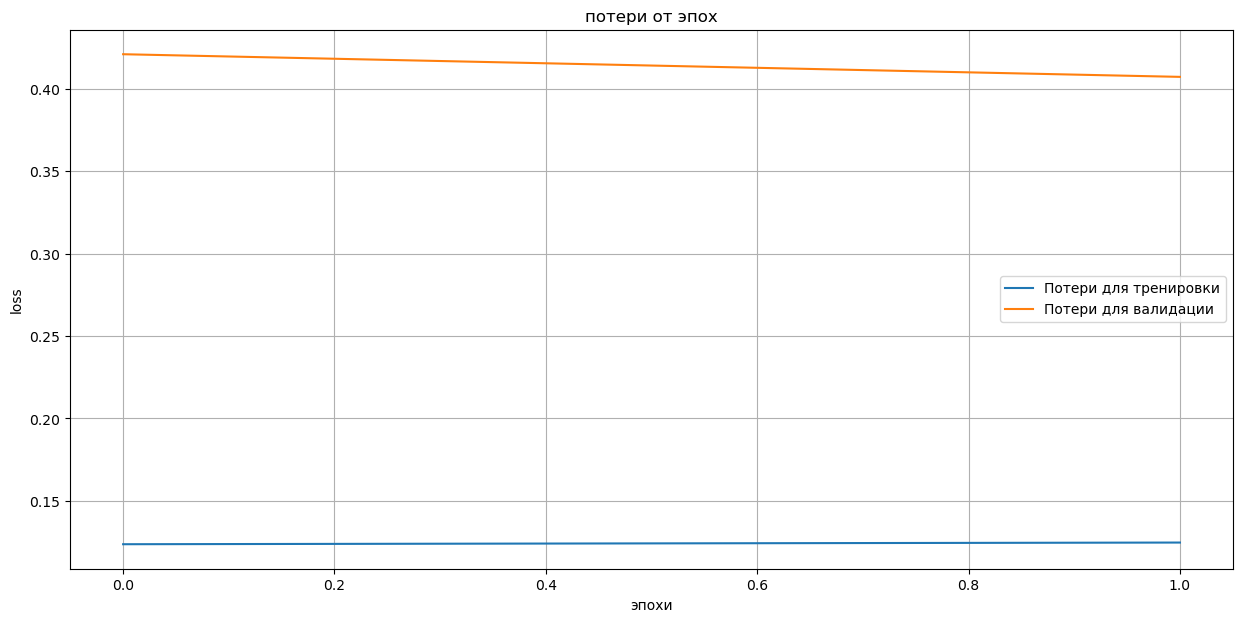

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 24)                18840     
                                                                 
 dense_51 (Dense)            (None, 24)                600       
                                                                 
Total params: 19,440
Trainable params: 19,440
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1211 - accuracy: 0.9551 - val_loss: 0.4024 - val_accuracy: 0.8855
Epoch 2/2
313/313 [==============================] - 0s 813us/step - loss: 0.4415 - accuracy: 0.8783


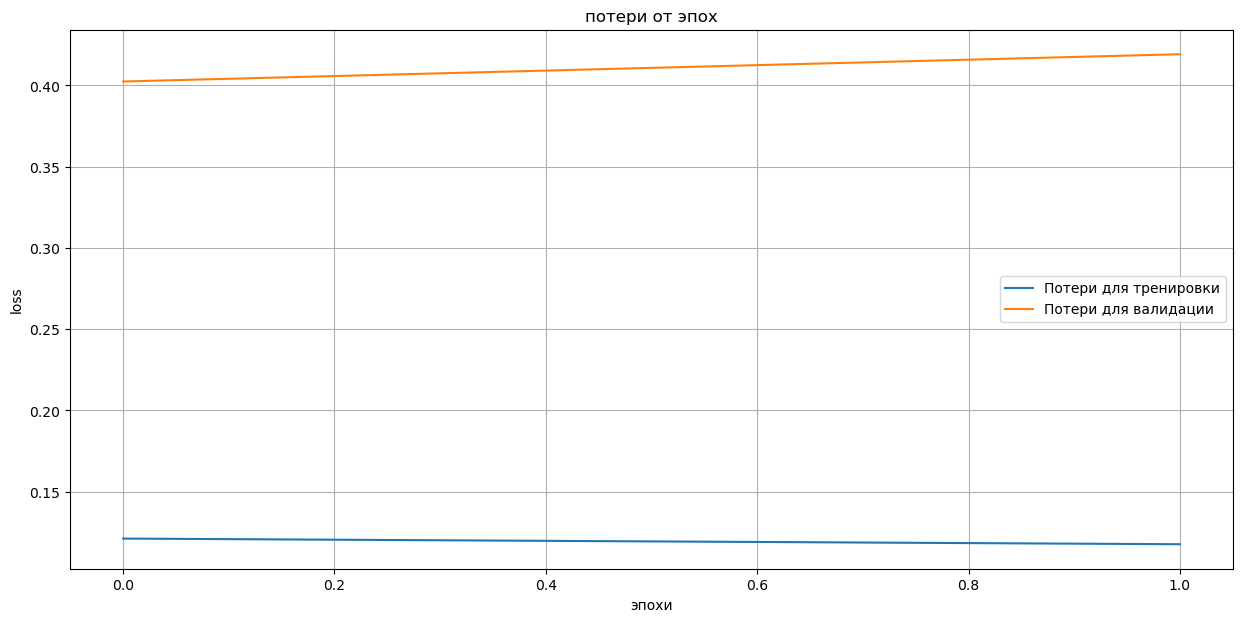

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 25)                19625     
                                                                 
 dense_53 (Dense)            (None, 25)                650       
                                                                 
Total params: 20,275
Trainable params: 20,275
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1211 - accuracy: 0.9556 - val_loss: 0.4208 - val_accuracy: 0.8830
Epoch 2/2
313/313 [==============================] - 0s 813us/step - loss: 0.4172 - accuracy: 0.8812


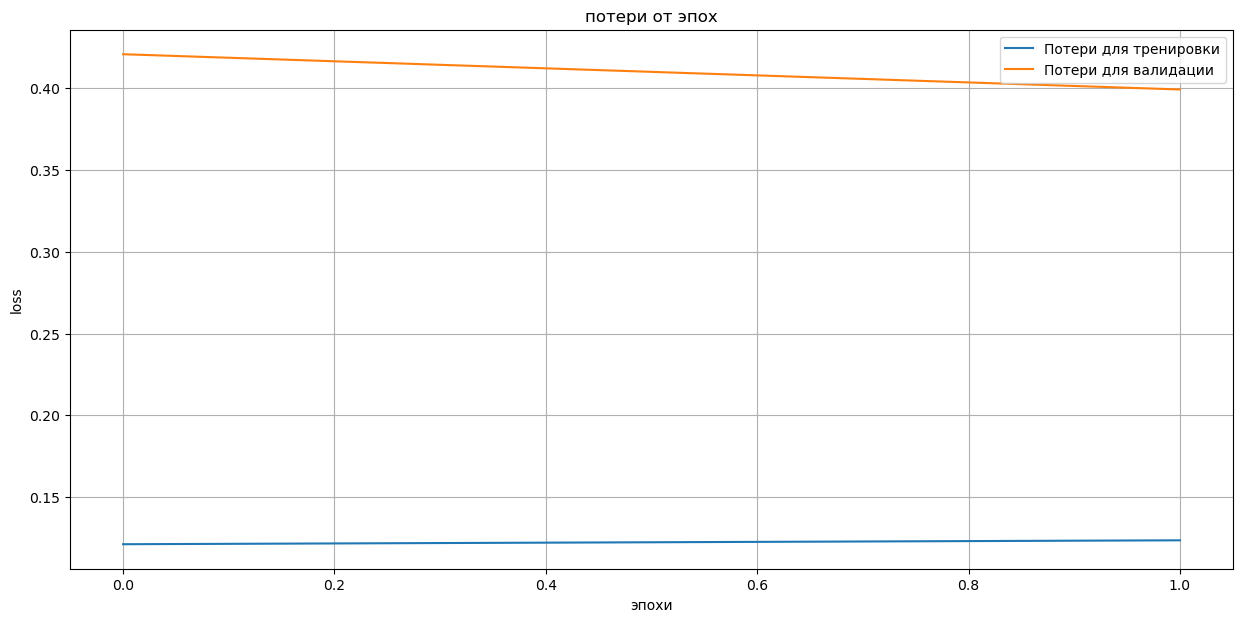

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 26)                20410     
                                                                 
 dense_55 (Dense)            (None, 26)                702       
                                                                 
Total params: 21,112
Trainable params: 21,112
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1156 - accuracy: 0.9581 - val_loss: 0.4347 - val_accuracy: 0.8796
Epoch 2/2
313/313 [==============================] - 0s 825us/step - loss: 0.4660 - accuracy: 0.8809


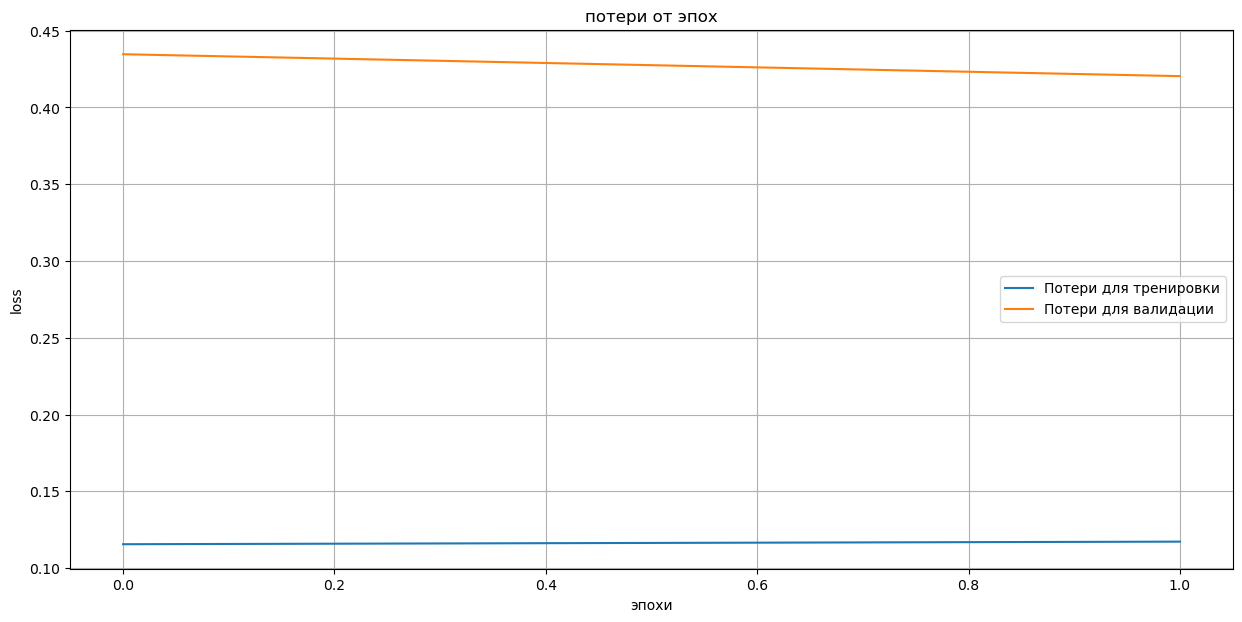

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 27)                21195     
                                                                 
 dense_57 (Dense)            (None, 27)                756       
                                                                 
Total params: 21,951
Trainable params: 21,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1182 - accuracy: 0.9562 - val_loss: 0.4147 - val_accuracy: 0.8861
Epoch 2/2
313/313 [==============================] - 0s 860us/step - loss: 0.4575 - accuracy: 0.8791


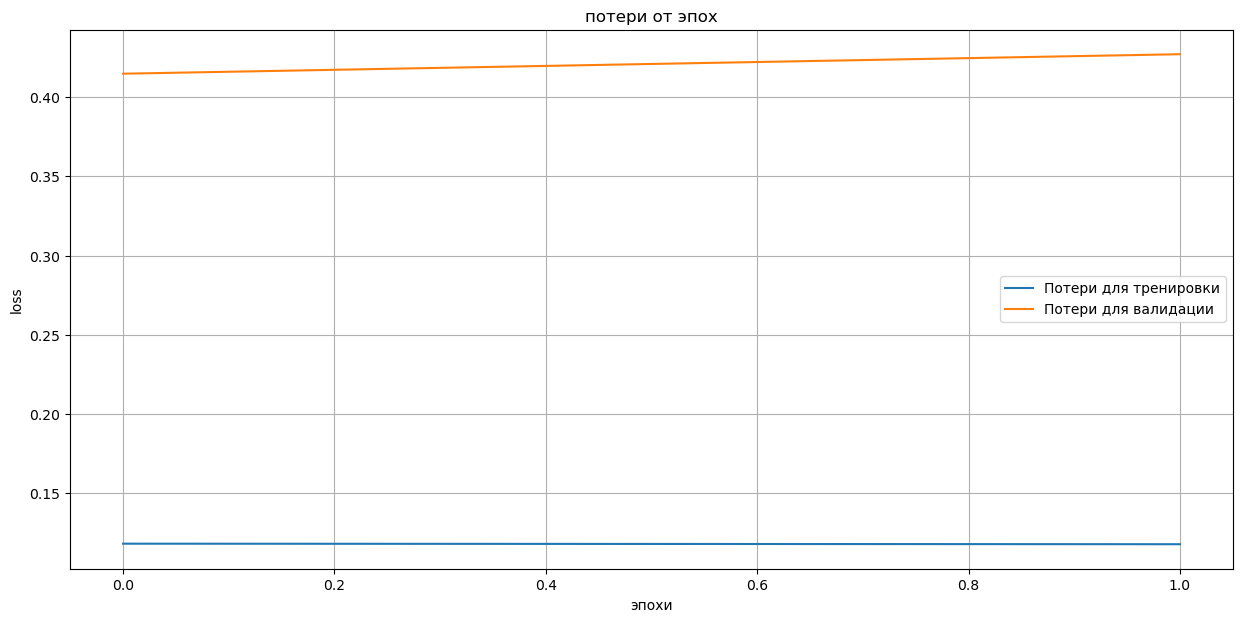

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 28)                21980     
                                                                 
 dense_59 (Dense)            (None, 28)                812       
                                                                 
Total params: 22,792
Trainable params: 22,792
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1154 - accuracy: 0.9571 - val_loss: 0.4284 - val_accuracy: 0.8828
Epoch 2/2
313/313 [==============================] - 0s 792us/step - loss: 0.4849 - accuracy: 0.8753


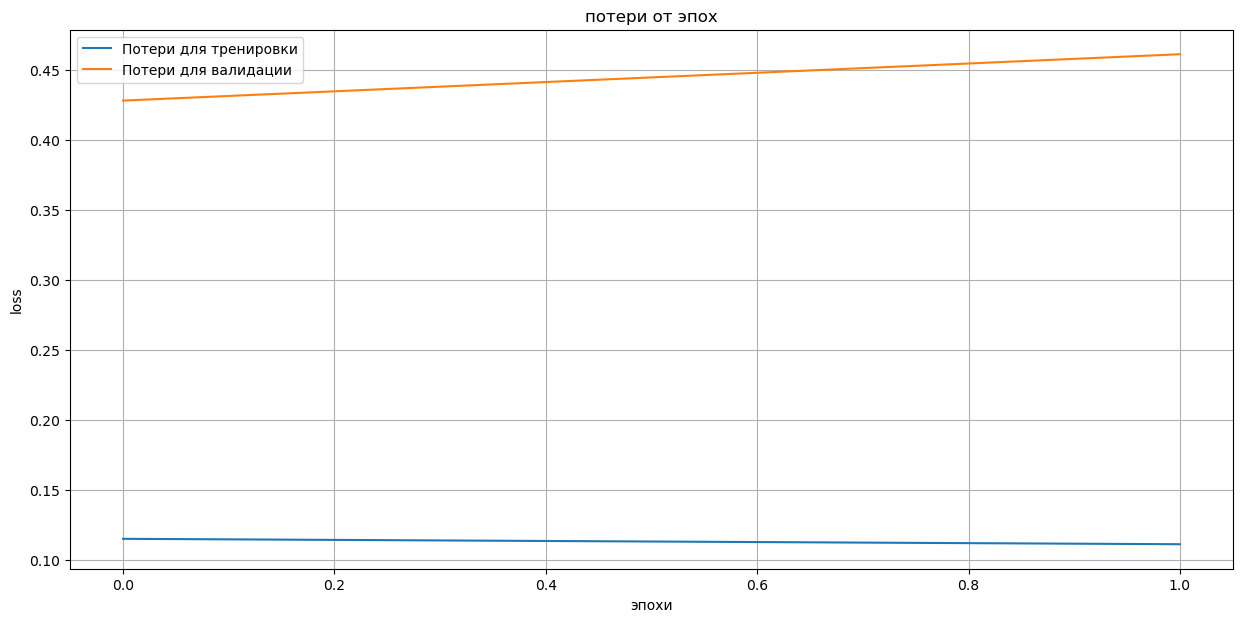

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 29)                22765     
                                                                 
 dense_61 (Dense)            (None, 29)                870       
                                                                 
Total params: 23,635
Trainable params: 23,635
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1149 - accuracy: 0.9579 - val_loss: 0.4307 - val_accuracy: 0.8901
Epoch 2/2
313/313 [==============================] - 0s 829us/step - loss: 0.4852 - accuracy: 0.8687


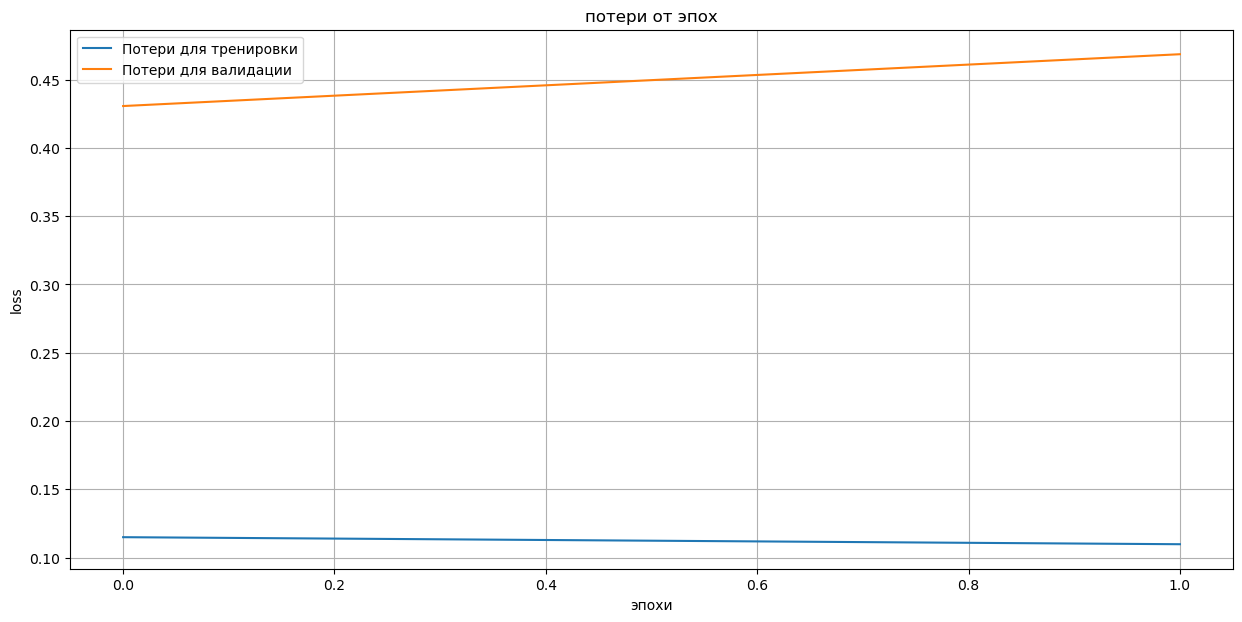

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 30)                23550     
                                                                 
 dense_63 (Dense)            (None, 30)                930       
                                                                 
Total params: 24,480
Trainable params: 24,480
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1070 - accuracy: 0.9610 - val_loss: 0.4521 - val_accuracy: 0.8876
Epoch 2/2
313/313 [==============================] - 0s 815us/step - loss: 0.4667 - accuracy: 0.8821


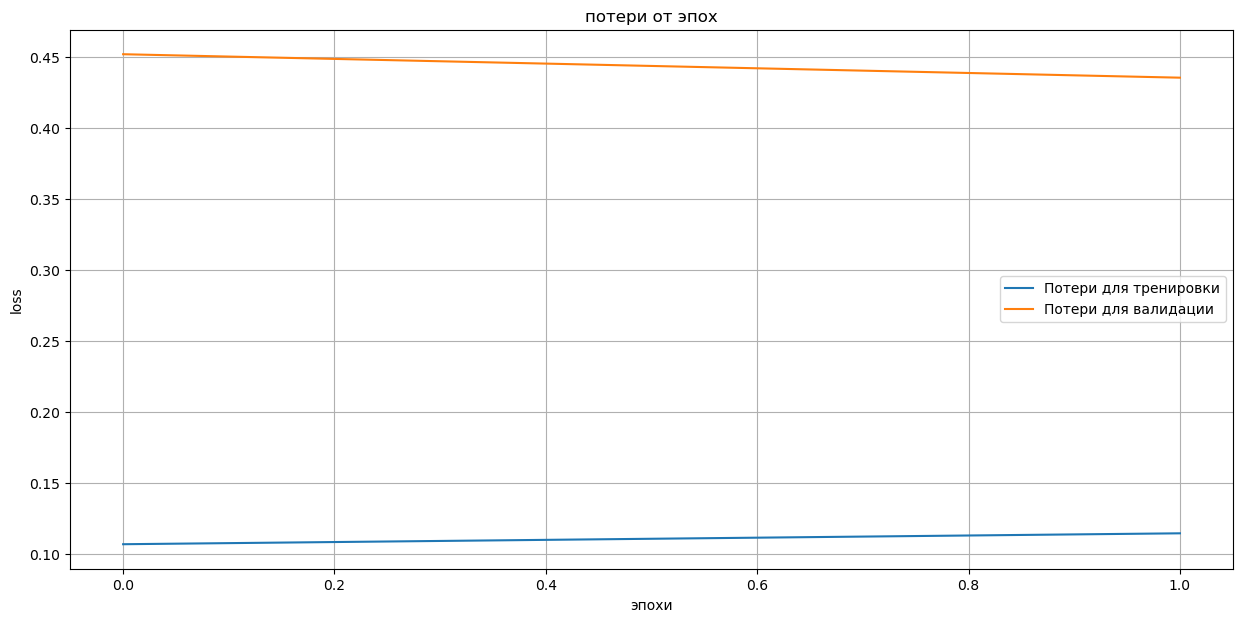

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 31)                24335     
                                                                 
 dense_65 (Dense)            (None, 31)                992       
                                                                 
Total params: 25,327
Trainable params: 25,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1134 - accuracy: 0.9581 - val_loss: 0.4445 - val_accuracy: 0.8817
Epoch 2/2
313/313 [==============================] - 0s 816us/step - loss: 0.4508 - accuracy: 0.8818


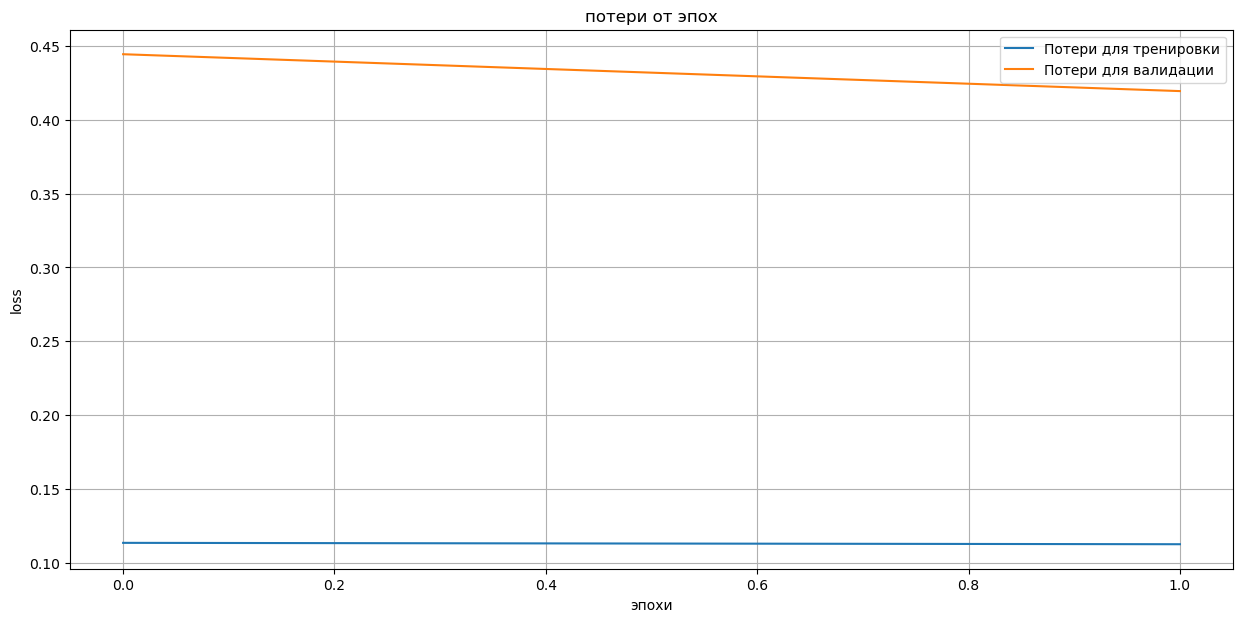

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                25120     
                                                                 
 dense_67 (Dense)            (None, 32)                1056      
                                                                 
Total params: 26,176
Trainable params: 26,176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1095 - accuracy: 0.9596 - val_loss: 0.4440 - val_accuracy: 0.8827
Epoch 2/2
313/313 [==============================] - 0s 776us/step - loss: 0.4831 - accuracy: 0.8803


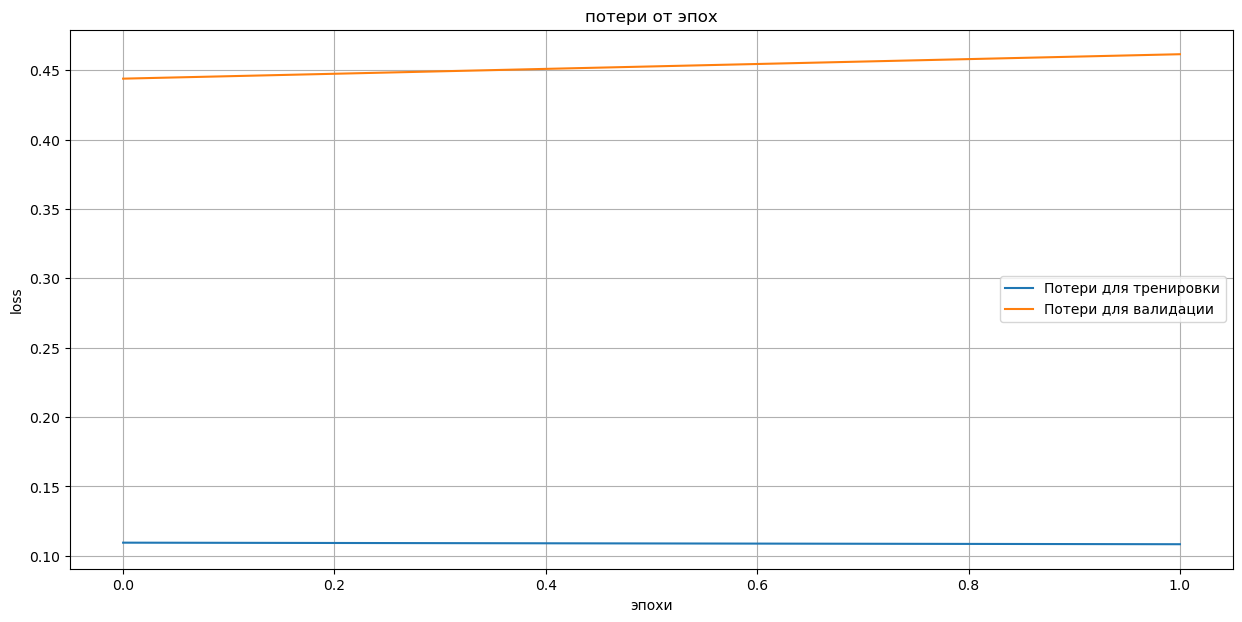

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 33)                25905     
                                                                 
 dense_69 (Dense)            (None, 33)                1122      
                                                                 
Total params: 27,027
Trainable params: 27,027
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1092 - accuracy: 0.9588 - val_loss: 0.4483 - val_accuracy: 0.8872
Epoch 2/2
313/313 [==============================] - 0s 788us/step - loss: 0.4659 - accuracy: 0.8790


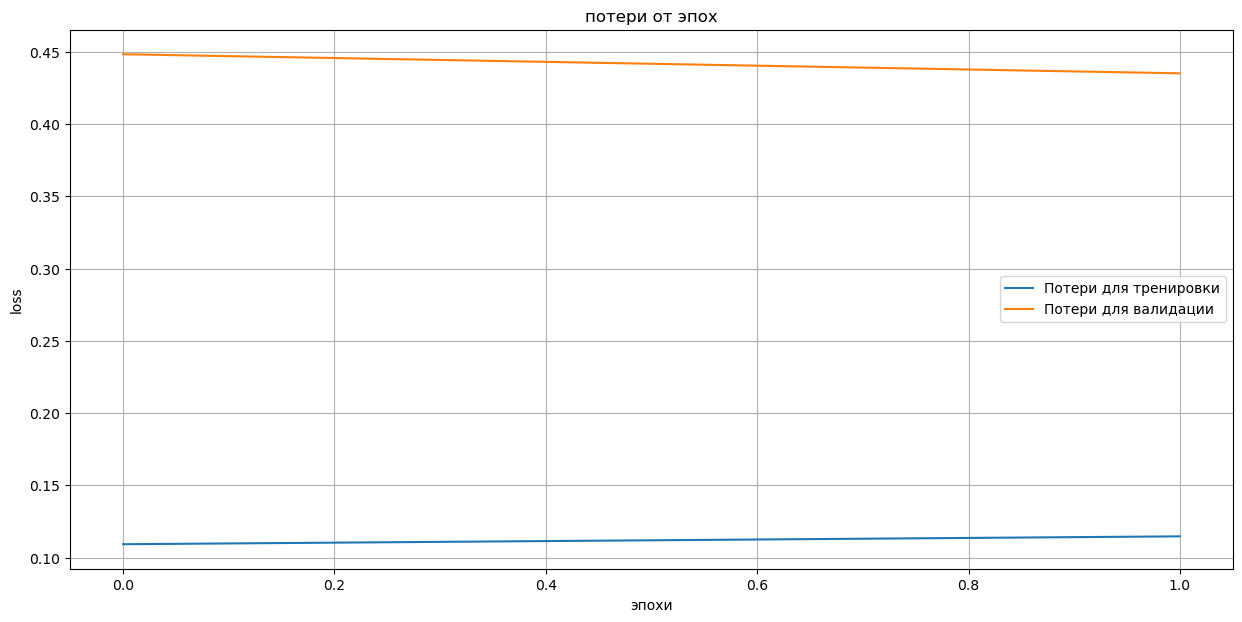

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 34)                26690     
                                                                 
 dense_71 (Dense)            (None, 34)                1190      
                                                                 
Total params: 27,880
Trainable params: 27,880
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1077 - accuracy: 0.9600 - val_loss: 0.4455 - val_accuracy: 0.8834
Epoch 2/2
313/313 [==============================] - 0s 791us/step - loss: 0.4676 - accuracy: 0.8780


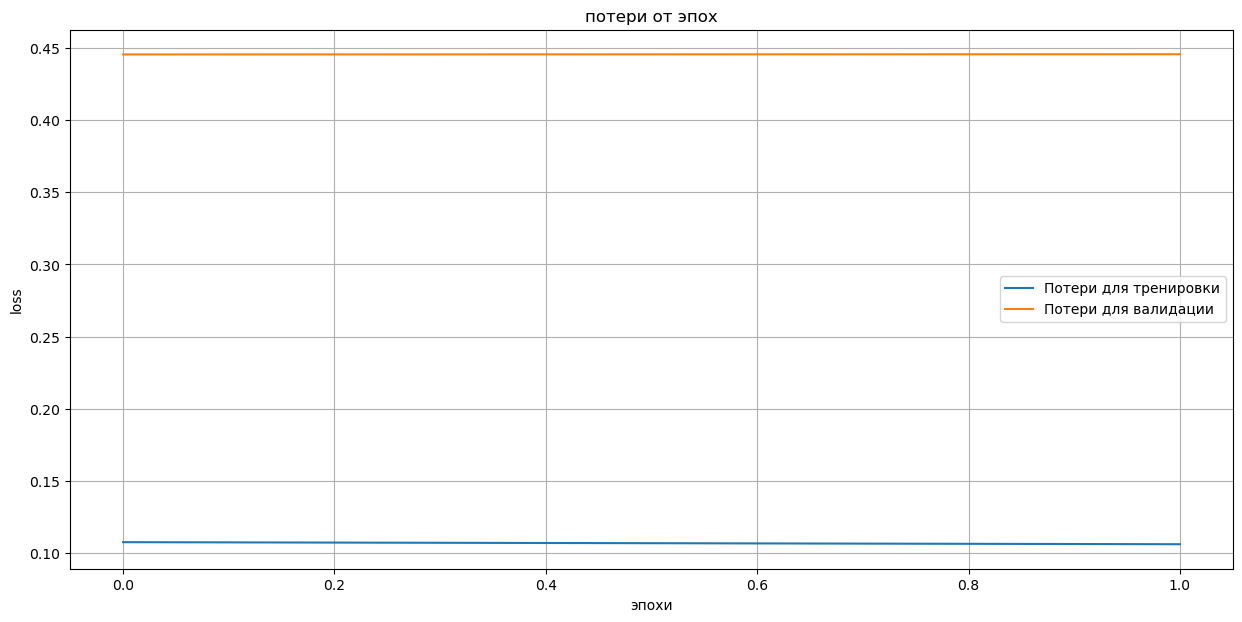

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 35)                27475     
                                                                 
 dense_73 (Dense)            (None, 35)                1260      
                                                                 
Total params: 28,735
Trainable params: 28,735
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1128 - accuracy: 0.9572 - val_loss: 0.4347 - val_accuracy: 0.8857
Epoch 2/2
313/313 [==============================] - 0s 820us/step - loss: 0.5037 - accuracy: 0.8756


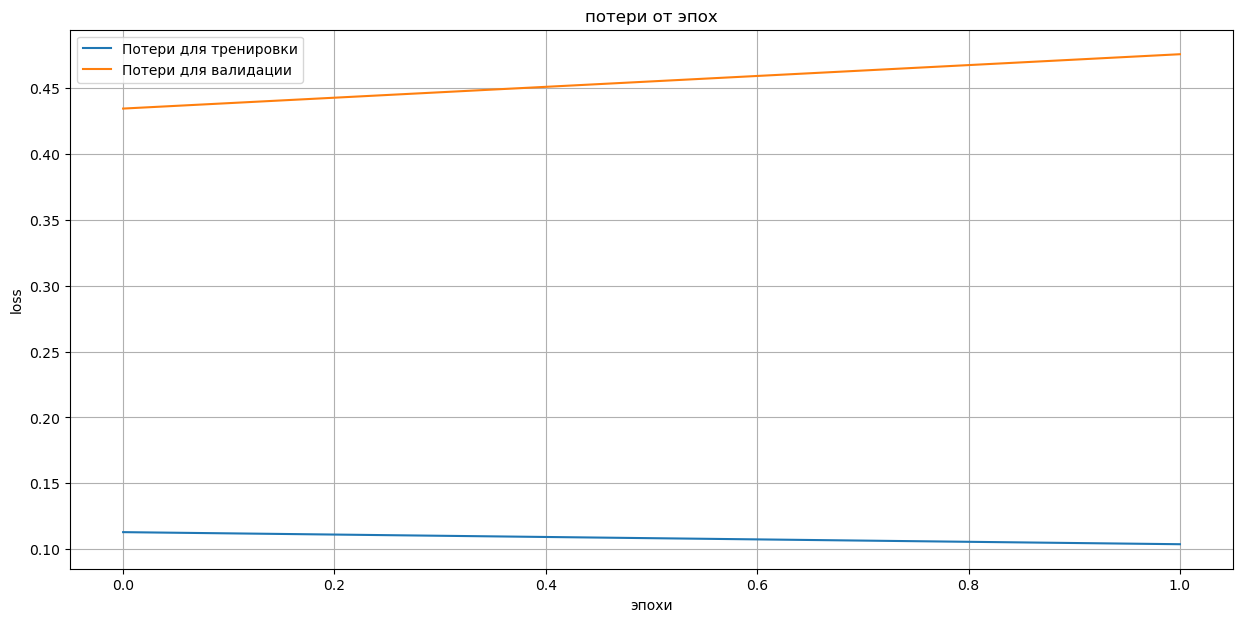

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 36)                28260     
                                                                 
 dense_75 (Dense)            (None, 36)                1332      
                                                                 
Total params: 29,592
Trainable params: 29,592
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1068 - accuracy: 0.9602 - val_loss: 0.4457 - val_accuracy: 0.8820
Epoch 2/2
313/313 [==============================] - 0s 791us/step - loss: 0.4928 - accuracy: 0.8809


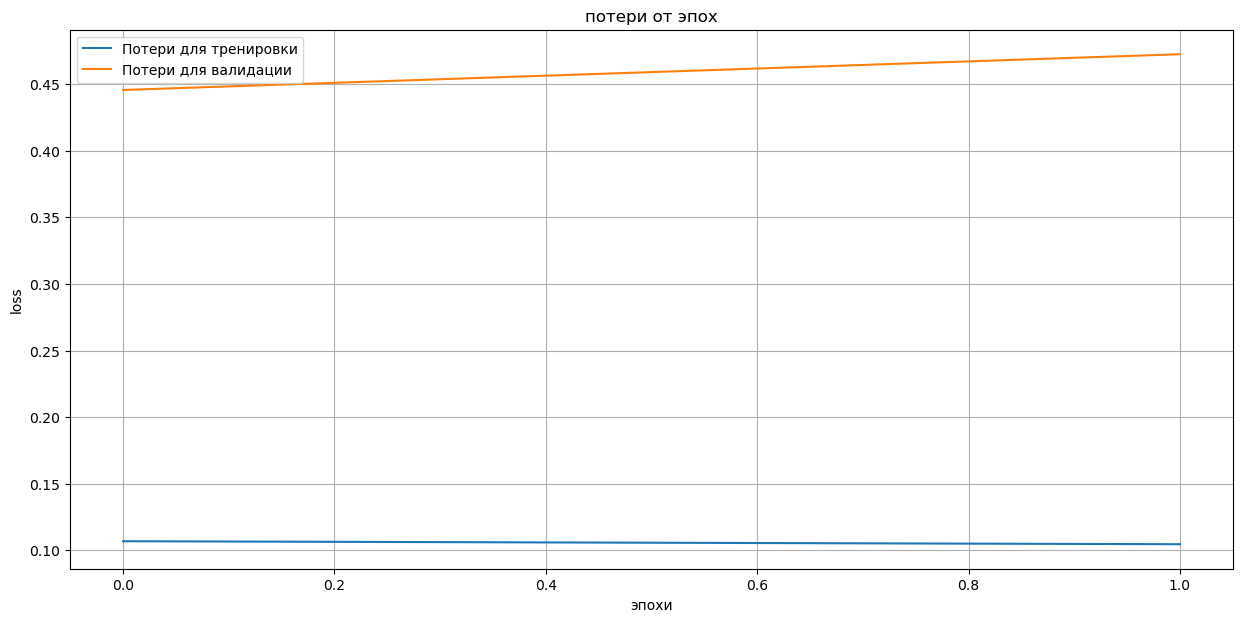

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 37)                29045     
                                                                 
 dense_77 (Dense)            (None, 37)                1406      
                                                                 
Total params: 30,451
Trainable params: 30,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1032 - accuracy: 0.9618 - val_loss: 0.4558 - val_accuracy: 0.8824
Epoch 2/2
313/313 [==============================] - 0s 794us/step - loss: 0.4802 - accuracy: 0.8795


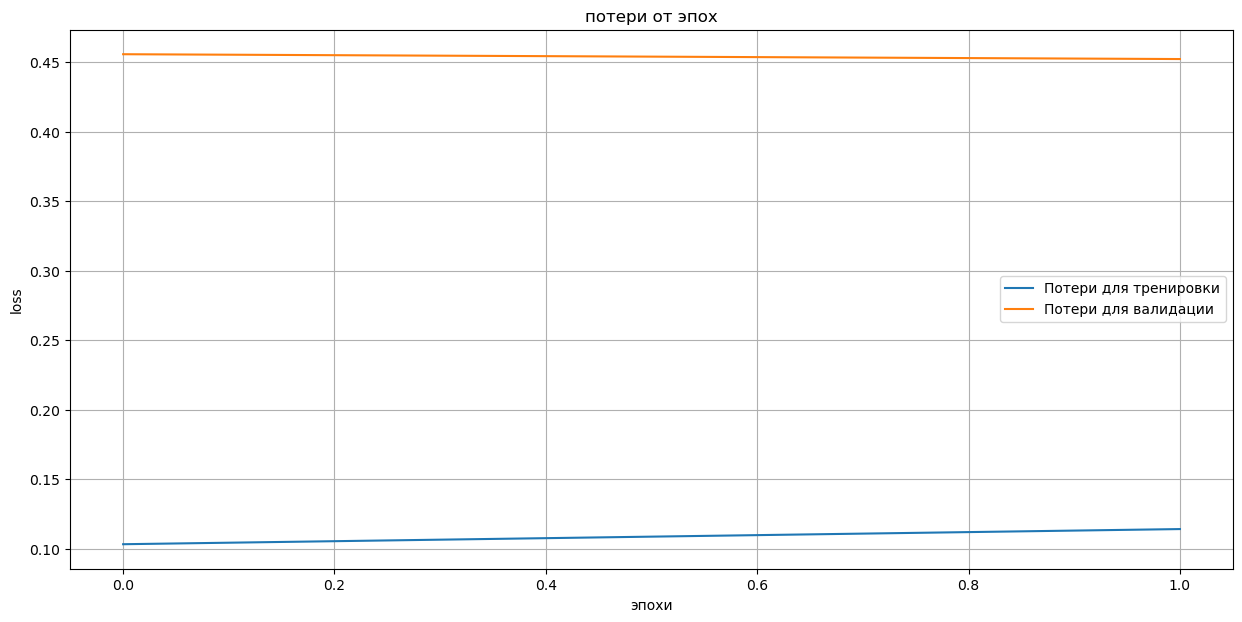

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 38)                29830     
                                                                 
 dense_79 (Dense)            (None, 38)                1482      
                                                                 
Total params: 31,312
Trainable params: 31,312
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1060 - accuracy: 0.9603 - val_loss: 0.4392 - val_accuracy: 0.8865
Epoch 2/2
313/313 [==============================] - 0s 797us/step - loss: 0.4763 - accuracy: 0.8822


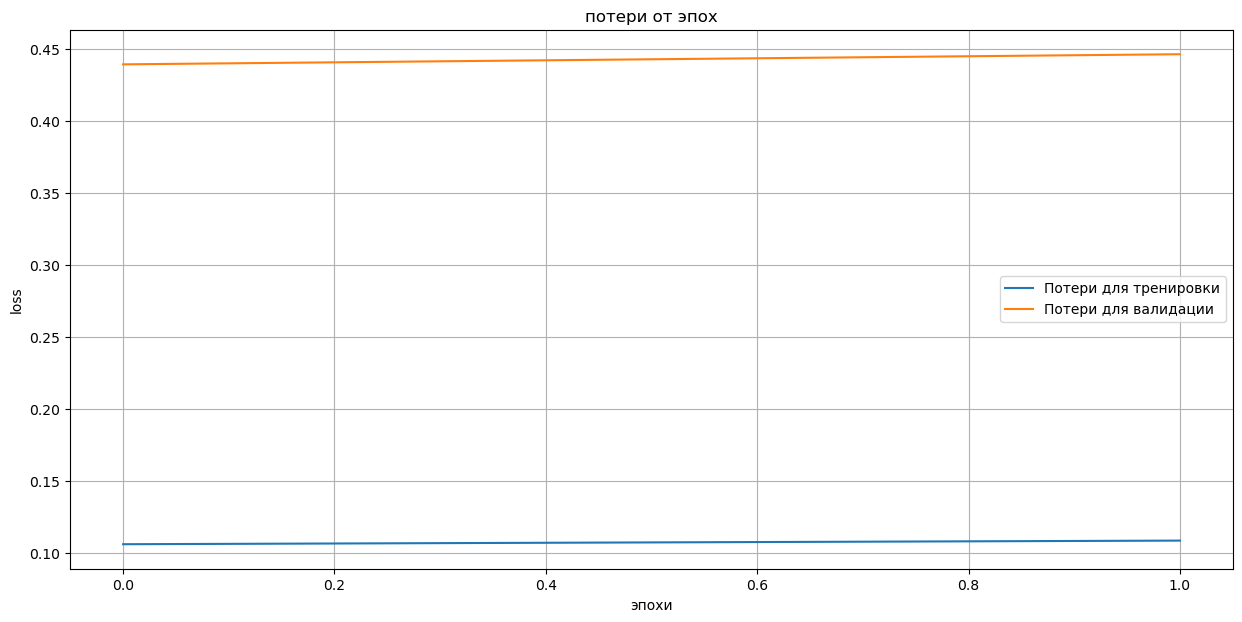

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 39)                30615     
                                                                 
 dense_81 (Dense)            (None, 39)                1560      
                                                                 
Total params: 32,175
Trainable params: 32,175
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1052 - accuracy: 0.9617 - val_loss: 0.4735 - val_accuracy: 0.8798
Epoch 2/2
313/313 [==============================] - 0s 779us/step - loss: 0.4950 - accuracy: 0.8787


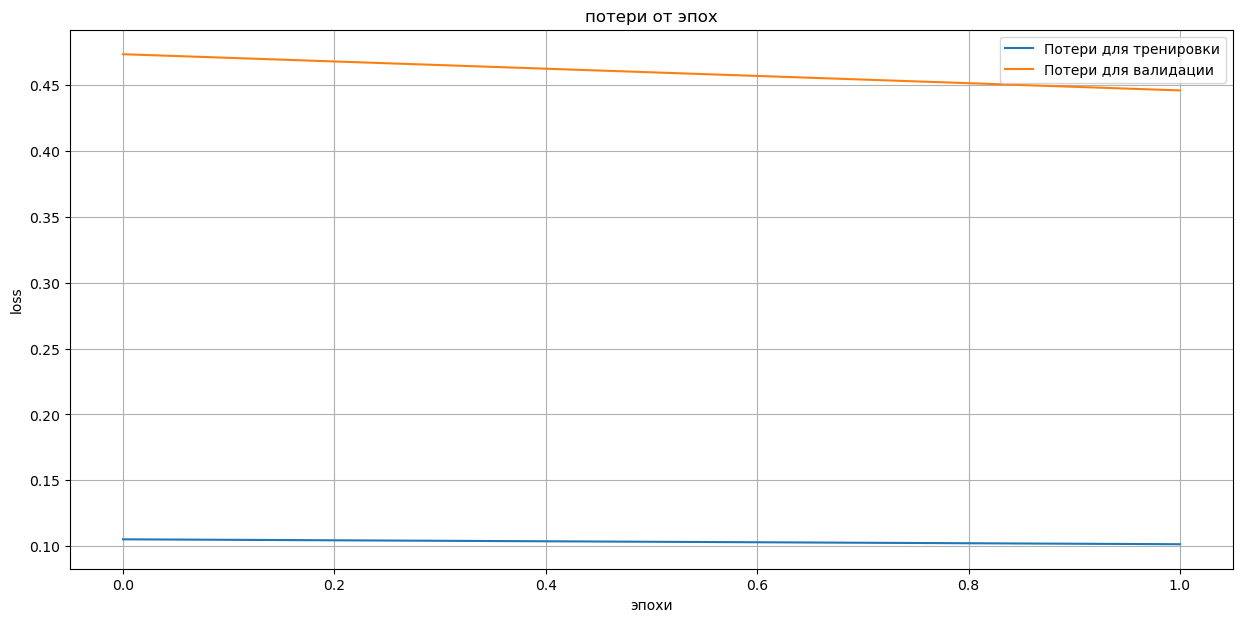

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 40)                31400     
                                                                 
 dense_83 (Dense)            (None, 40)                1640      
                                                                 
Total params: 33,040
Trainable params: 33,040
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1025 - accuracy: 0.9620 - val_loss: 0.4641 - val_accuracy: 0.8858
Epoch 2/2
313/313 [==============================] - 0s 795us/step - loss: 0.4961 - accuracy: 0.8811


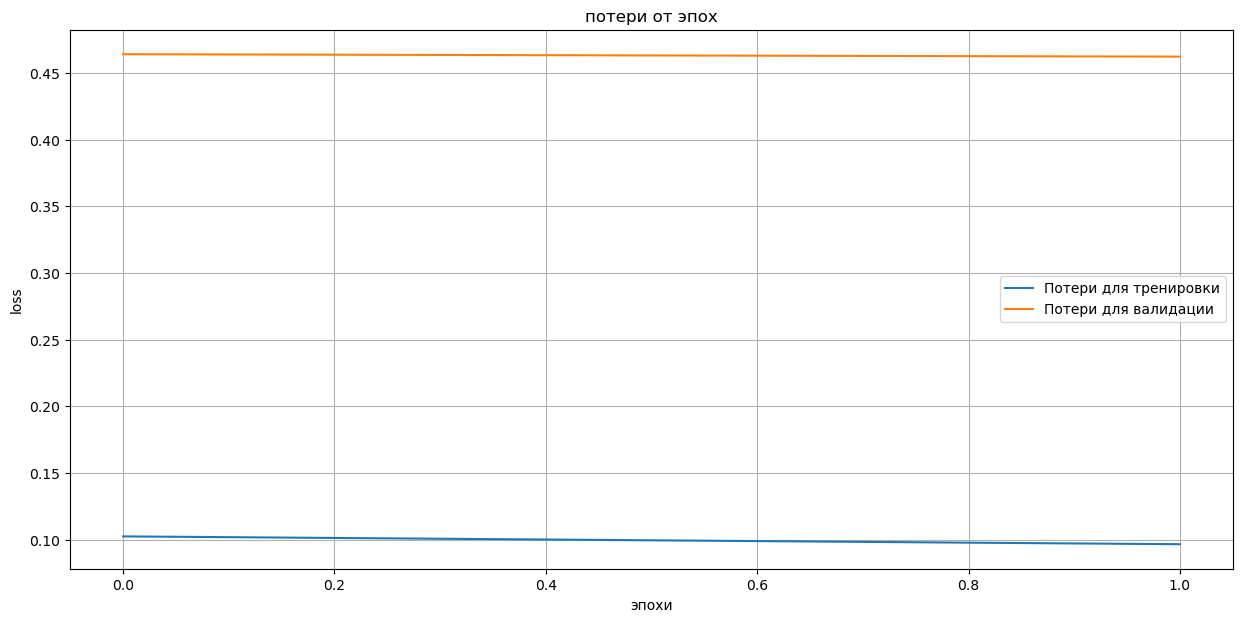

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 41)                32185     
                                                                 
 dense_85 (Dense)            (None, 41)                1722      
                                                                 
Total params: 33,907
Trainable params: 33,907
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1058 - accuracy: 0.9607 - val_loss: 0.4440 - val_accuracy: 0.8852
Epoch 2/2
313/313 [==============================] - 0s 834us/step - loss: 0.4936 - accuracy: 0.8771


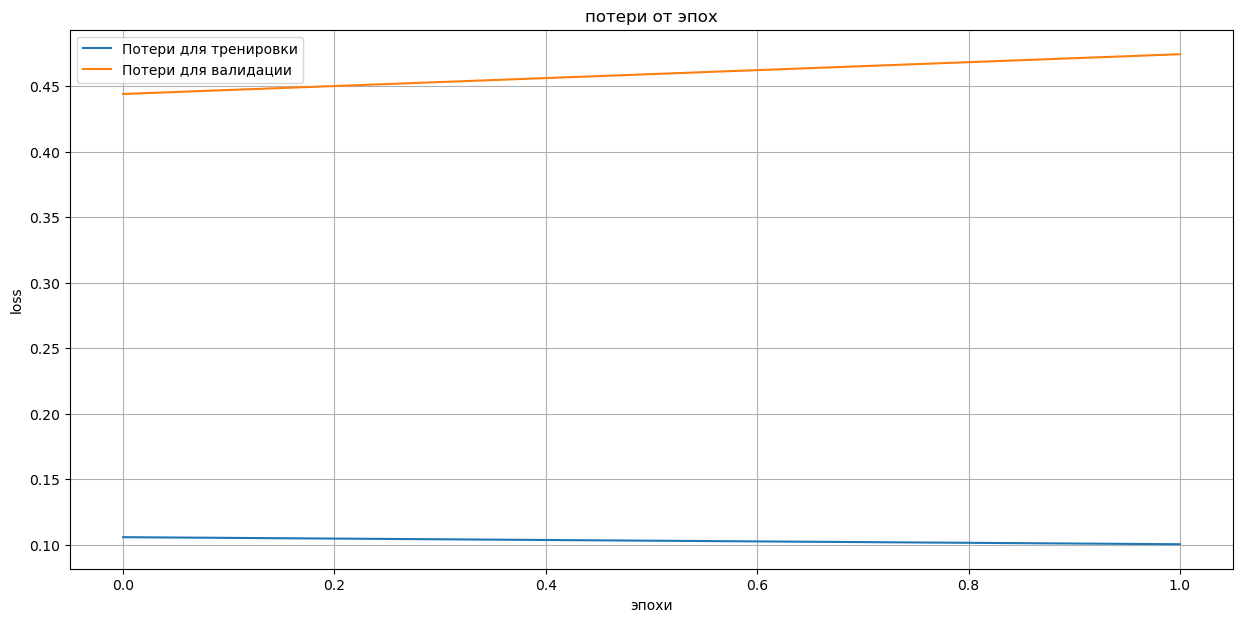

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 42)                32970     
                                                                 
 dense_87 (Dense)            (None, 42)                1806      
                                                                 
Total params: 34,776
Trainable params: 34,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1025 - accuracy: 0.9622 - val_loss: 0.4792 - val_accuracy: 0.8828
Epoch 2/2
313/313 [==============================] - 0s 765us/step - loss: 0.5191 - accuracy: 0.8768


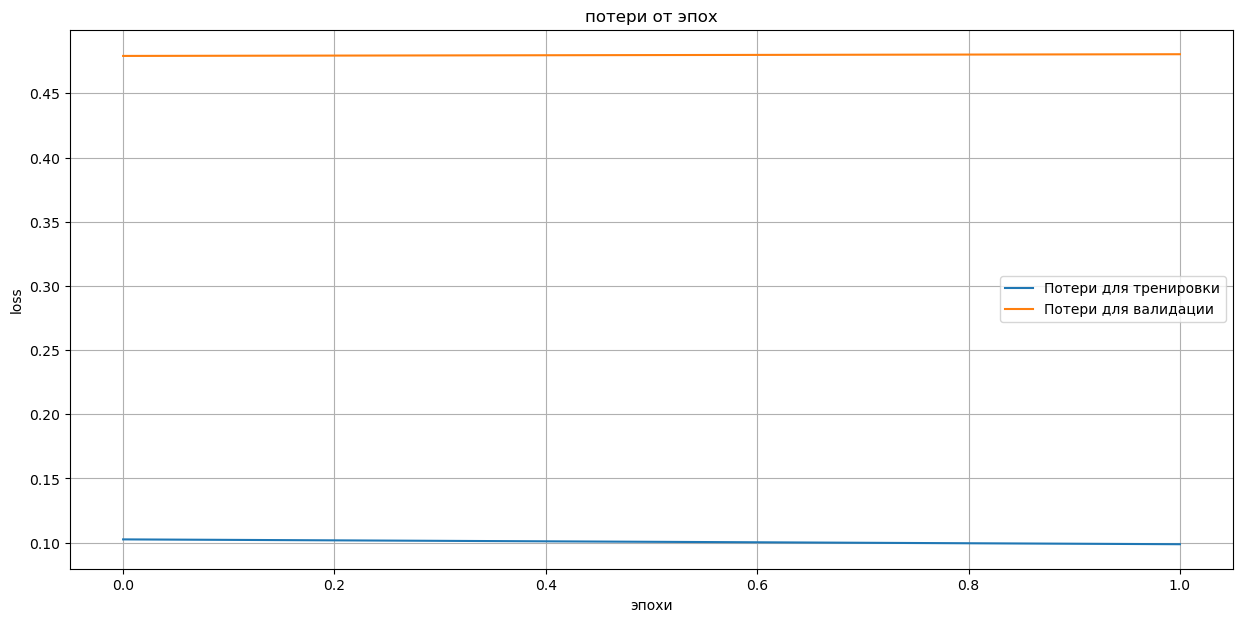

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 43)                33755     
                                                                 
 dense_89 (Dense)            (None, 43)                1892      
                                                                 
Total params: 35,647
Trainable params: 35,647
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1049 - accuracy: 0.9604 - val_loss: 0.4618 - val_accuracy: 0.8820
Epoch 2/2
313/313 [==============================] - 0s 821us/step - loss: 0.4929 - accuracy: 0.8799


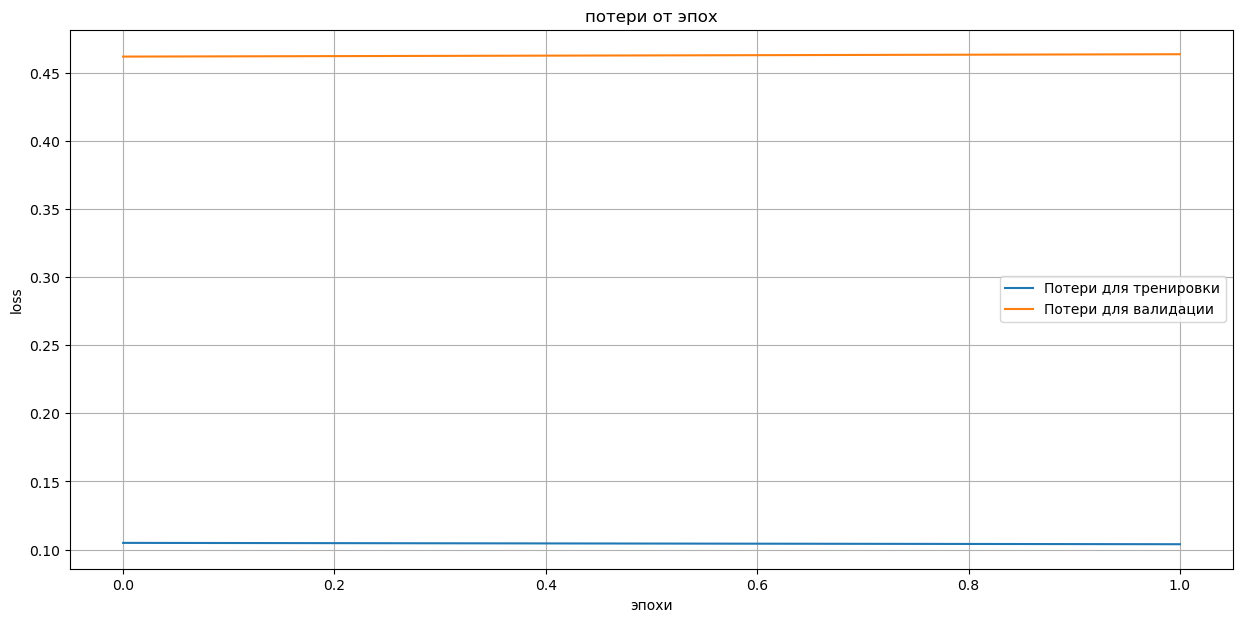

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 44)                34540     
                                                                 
 dense_91 (Dense)            (None, 44)                1980      
                                                                 
Total params: 36,520
Trainable params: 36,520
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0990 - accuracy: 0.9633 - val_loss: 0.4640 - val_accuracy: 0.8860
Epoch 2/2
313/313 [==============================] - 0s 792us/step - loss: 0.4888 - accuracy: 0.8788


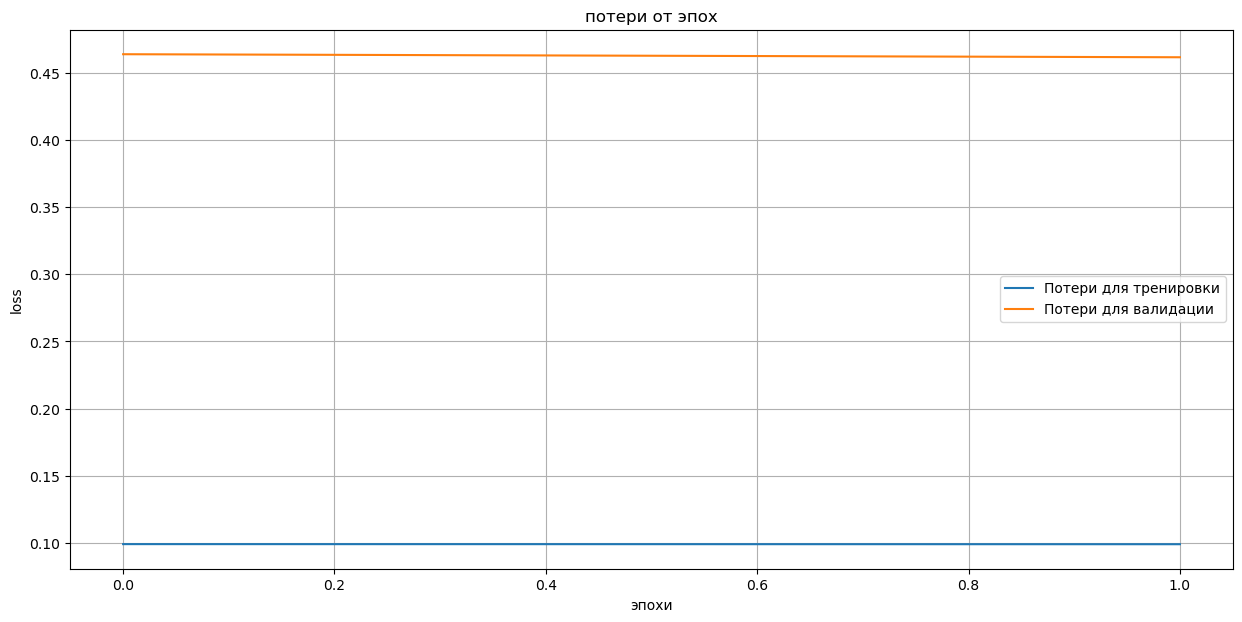

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 45)                35325     
                                                                 
 dense_93 (Dense)            (None, 45)                2070      
                                                                 
Total params: 37,395
Trainable params: 37,395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1003 - accuracy: 0.9623 - val_loss: 0.4676 - val_accuracy: 0.8842
Epoch 2/2
313/313 [==============================] - 0s 804us/step - loss: 0.5157 - accuracy: 0.8784


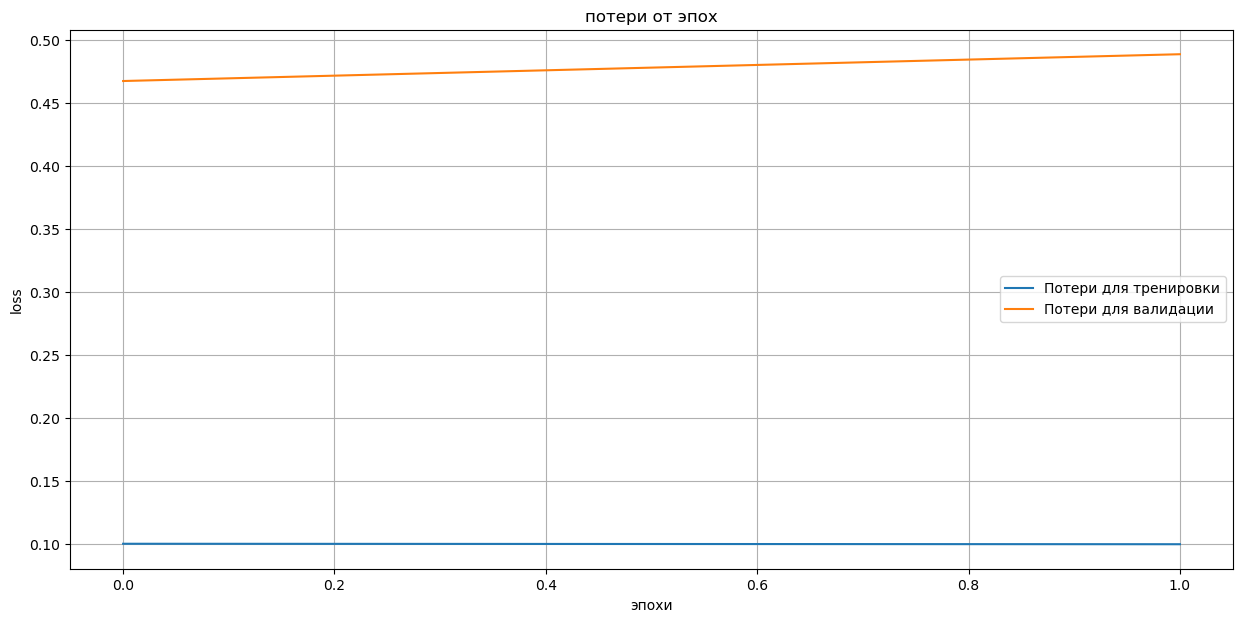

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 46)                36110     
                                                                 
 dense_95 (Dense)            (None, 46)                2162      
                                                                 
Total params: 38,272
Trainable params: 38,272
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0995 - accuracy: 0.9631 - val_loss: 0.4850 - val_accuracy: 0.8809
Epoch 2/2
313/313 [==============================] - 0s 788us/step - loss: 0.5007 - accuracy: 0.8764


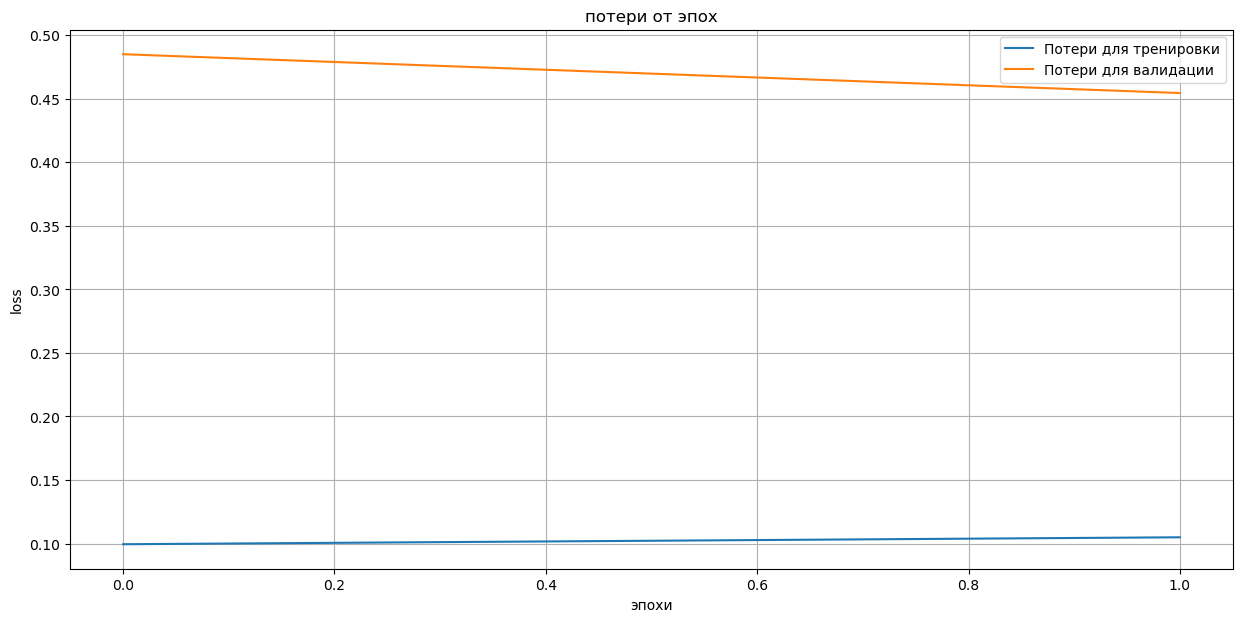

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 47)                36895     
                                                                 
 dense_97 (Dense)            (None, 47)                2256      
                                                                 
Total params: 39,151
Trainable params: 39,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1034 - accuracy: 0.9615 - val_loss: 0.4489 - val_accuracy: 0.8846
Epoch 2/2
313/313 [==============================] - 0s 799us/step - loss: 0.4995 - accuracy: 0.8800


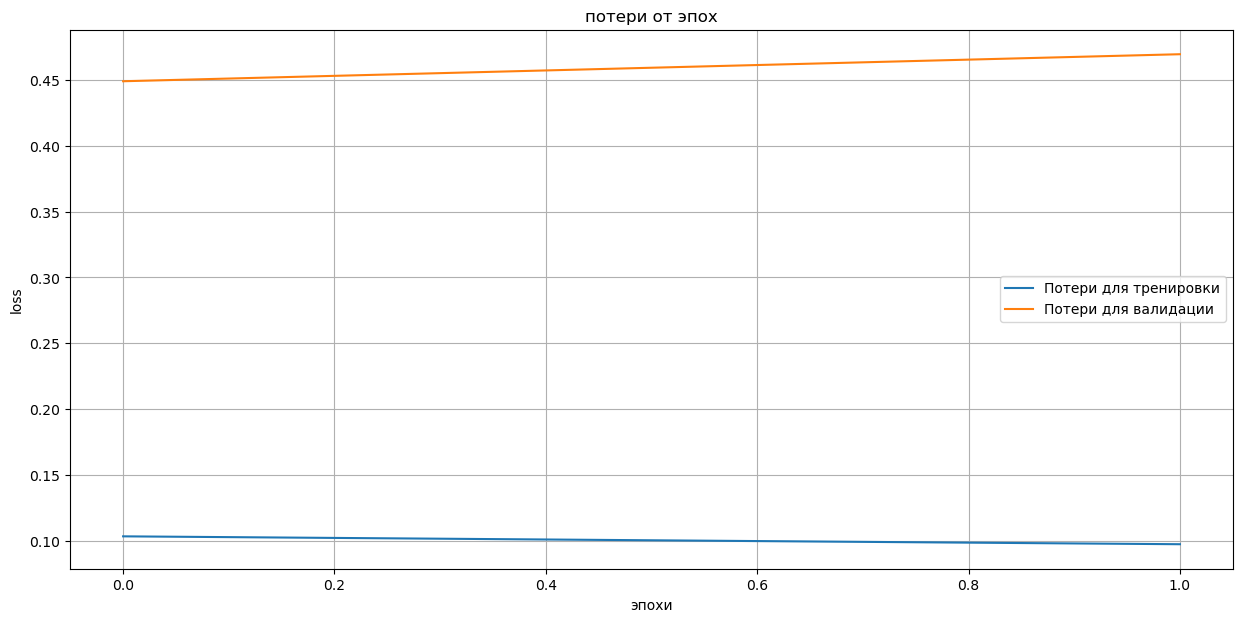

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 48)                37680     
                                                                 
 dense_99 (Dense)            (None, 48)                2352      
                                                                 
Total params: 40,032
Trainable params: 40,032
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0937 - accuracy: 0.9652 - val_loss: 0.4749 - val_accuracy: 0.8823
Epoch 2/2
313/313 [==============================] - 0s 820us/step - loss: 0.5046 - accuracy: 0.8751


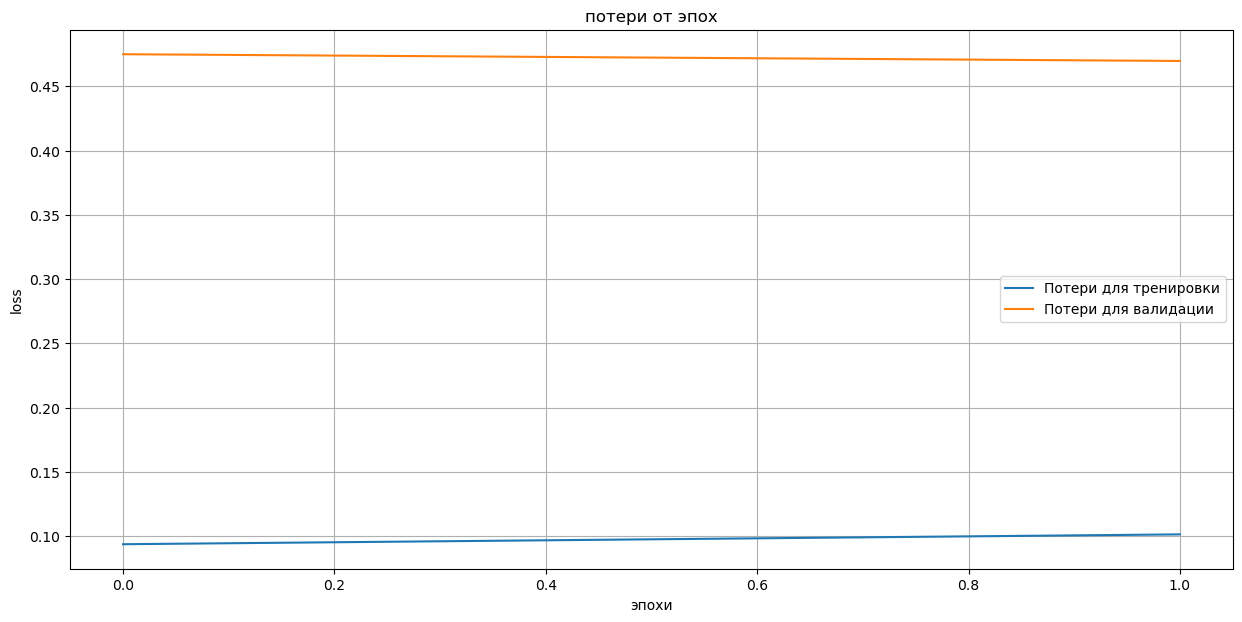

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 49)                38465     
                                                                 
 dense_101 (Dense)           (None, 49)                2450      
                                                                 
Total params: 40,915
Trainable params: 40,915
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0964 - accuracy: 0.9642 - val_loss: 0.4785 - val_accuracy: 0.8825
Epoch 2/2
313/313 [==============================] - 0s 777us/step - loss: 0.4990 - accuracy: 0.8790


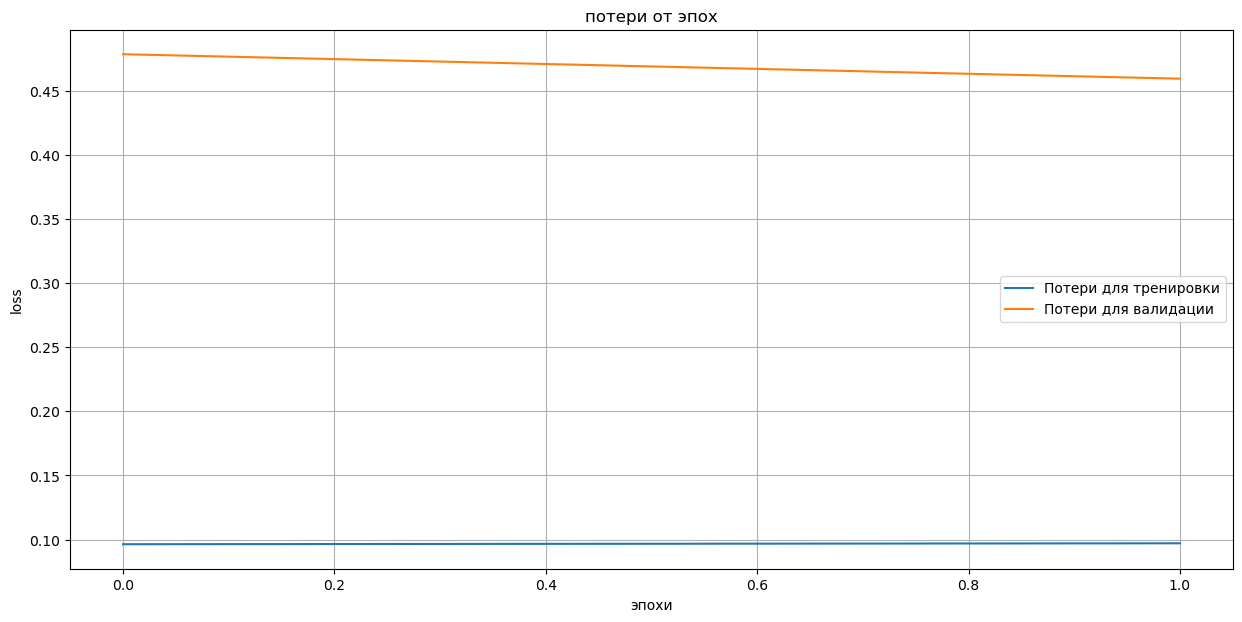

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 50)                39250     
                                                                 
 dense_103 (Dense)           (None, 50)                2550      
                                                                 
Total params: 41,800
Trainable params: 41,800
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0951 - accuracy: 0.9652 - val_loss: 0.4911 - val_accuracy: 0.8822
Epoch 2/2
313/313 [==============================] - 0s 800us/step - loss: 0.4948 - accuracy: 0.8784


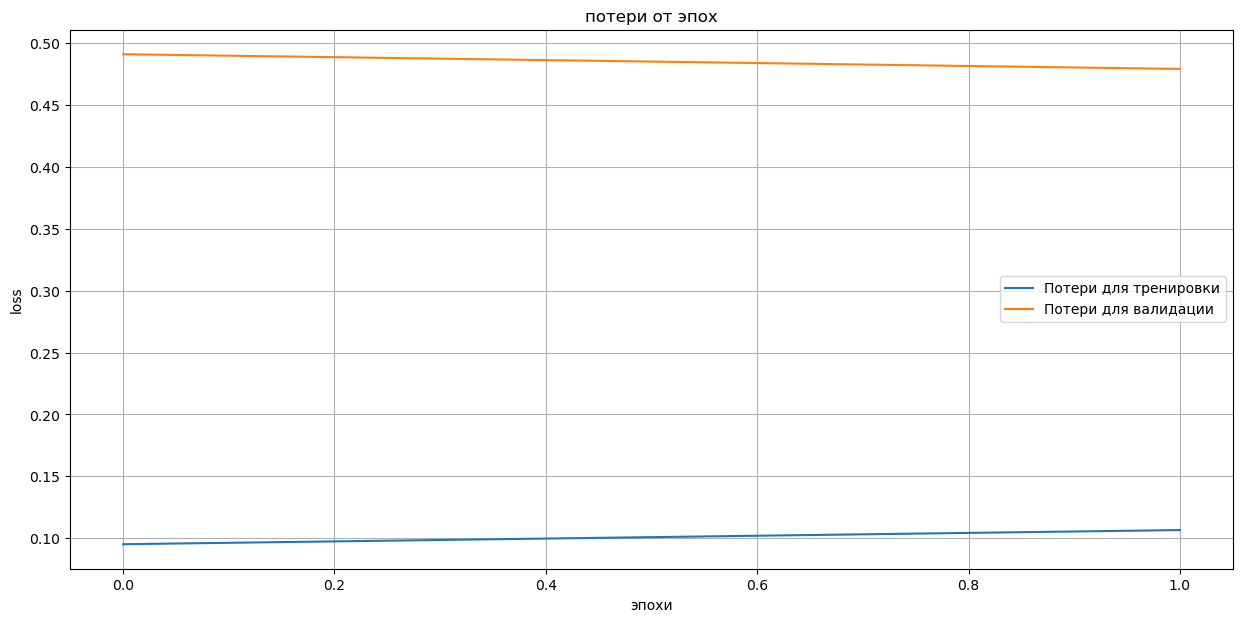

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 51)                40035     
                                                                 
 dense_105 (Dense)           (None, 51)                2652      
                                                                 
Total params: 42,687
Trainable params: 42,687
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0973 - accuracy: 0.9633 - val_loss: 0.4770 - val_accuracy: 0.8856
Epoch 2/2
313/313 [==============================] - 0s 791us/step - loss: 0.4976 - accuracy: 0.8801


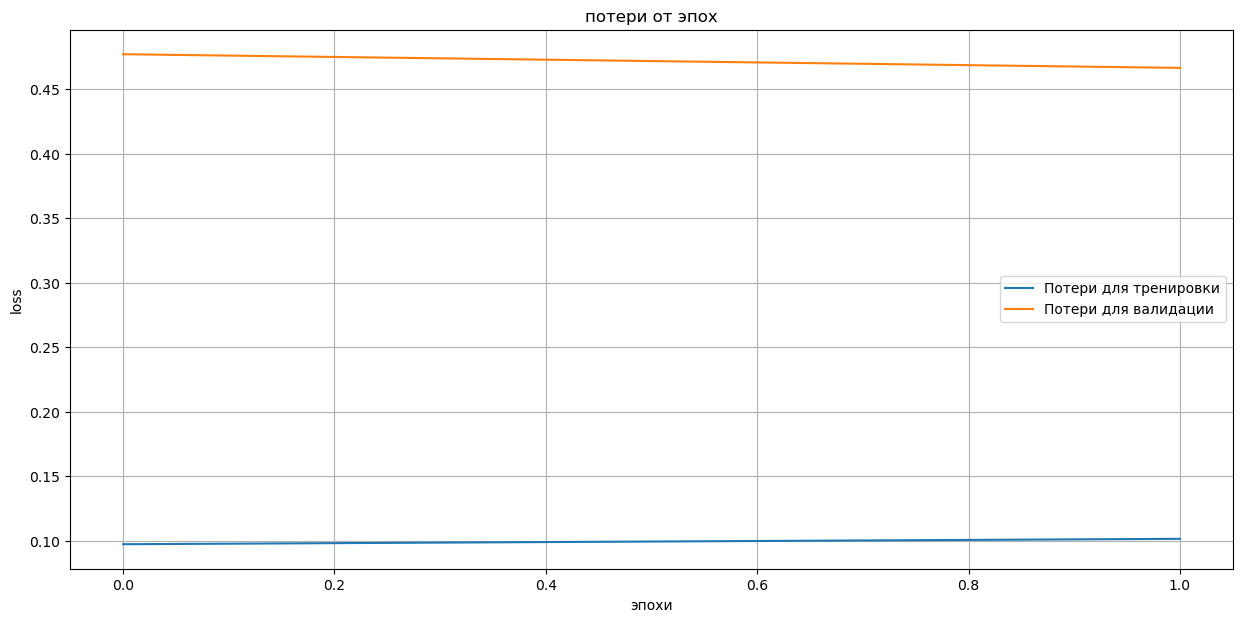

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 52)                40820     
                                                                 
 dense_107 (Dense)           (None, 52)                2756      
                                                                 
Total params: 43,576
Trainable params: 43,576
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0993 - accuracy: 0.9639 - val_loss: 0.4721 - val_accuracy: 0.8832
Epoch 2/2
313/313 [==============================] - 0s 798us/step - loss: 0.5770 - accuracy: 0.8682


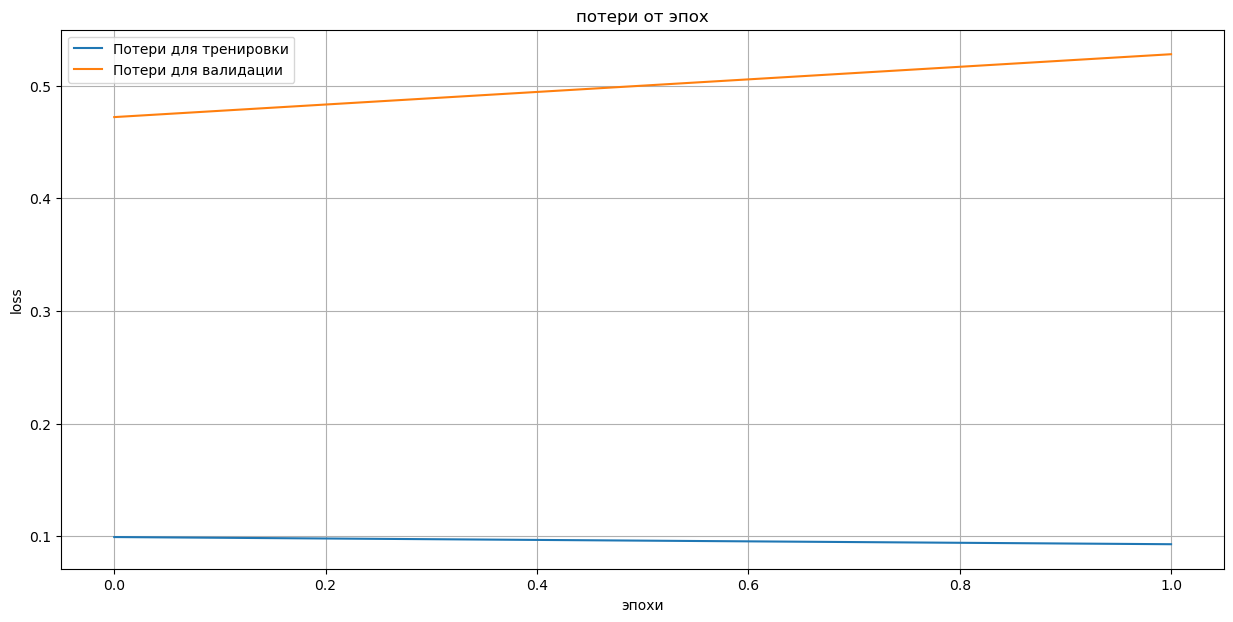

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 53)                41605     
                                                                 
 dense_109 (Dense)           (None, 53)                2862      
                                                                 
Total params: 44,467
Trainable params: 44,467
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1013 - accuracy: 0.9626 - val_loss: 0.4568 - val_accuracy: 0.8888
Epoch 2/2
313/313 [==============================] - 0s 771us/step - loss: 0.5367 - accuracy: 0.8732


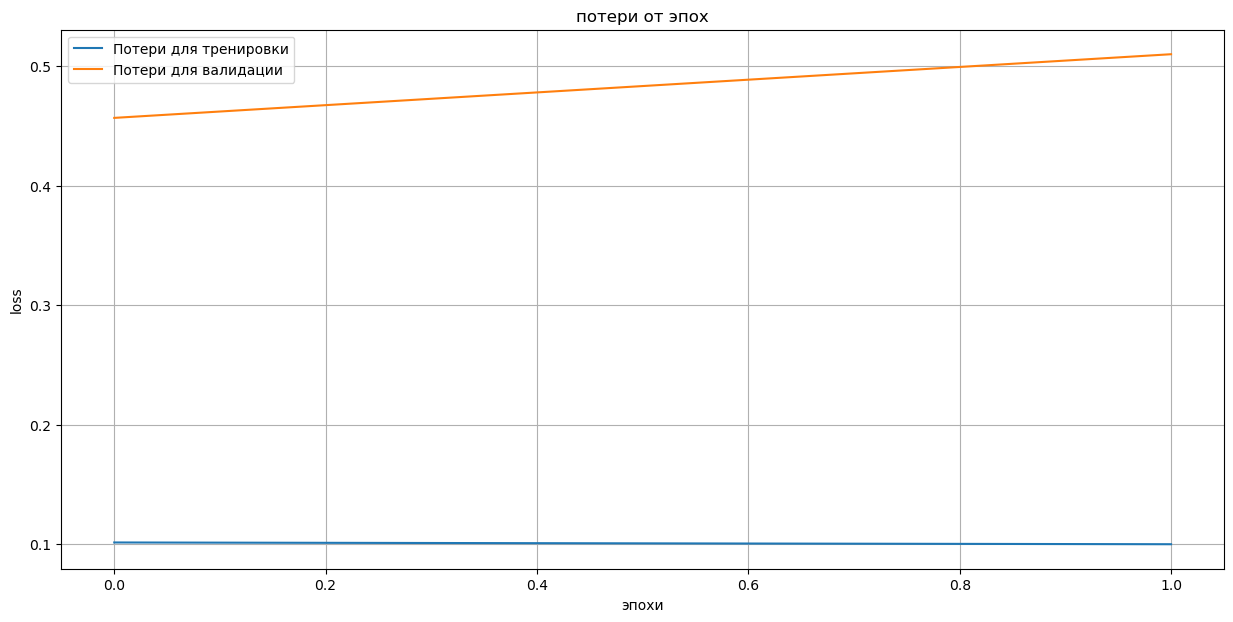

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 54)                42390     
                                                                 
 dense_111 (Dense)           (None, 54)                2970      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0918 - accuracy: 0.9659 - val_loss: 0.4800 - val_accuracy: 0.8879
Epoch 2/2
313/313 [==============================] - 0s 823us/step - loss: 0.5411 - accuracy: 0.8788


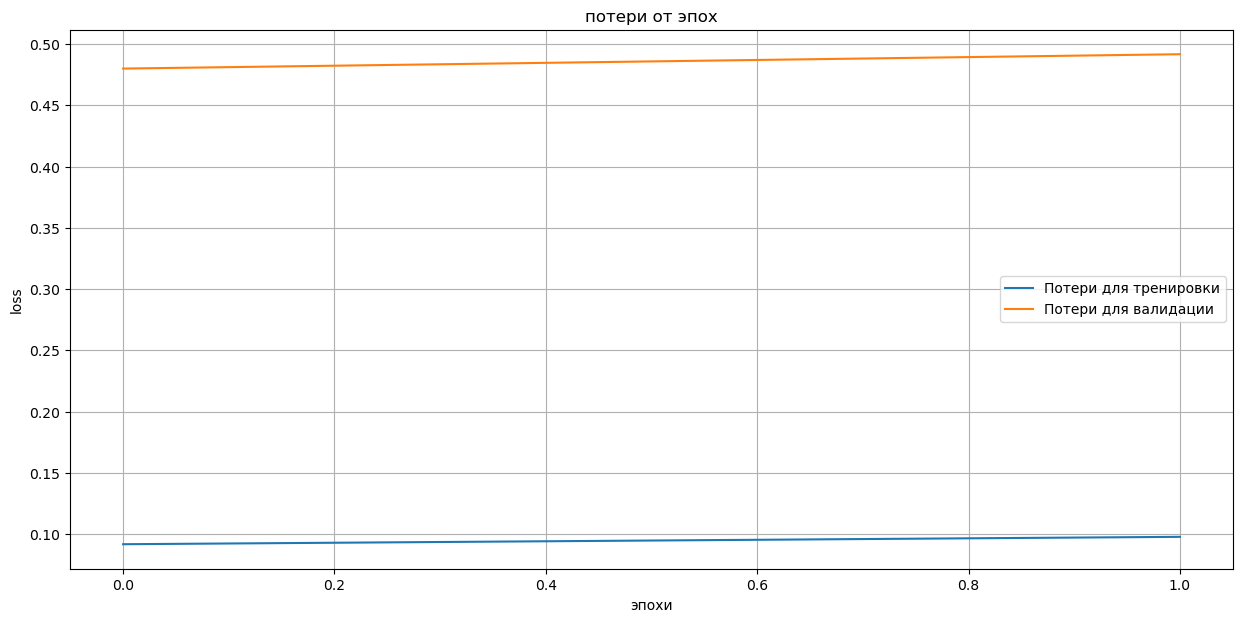

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 55)                43175     
                                                                 
 dense_113 (Dense)           (None, 55)                3080      
                                                                 
Total params: 46,255
Trainable params: 46,255
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0994 - accuracy: 0.9633 - val_loss: 0.4832 - val_accuracy: 0.8829
Epoch 2/2
313/313 [==============================] - 0s 795us/step - loss: 0.5241 - accuracy: 0.8742


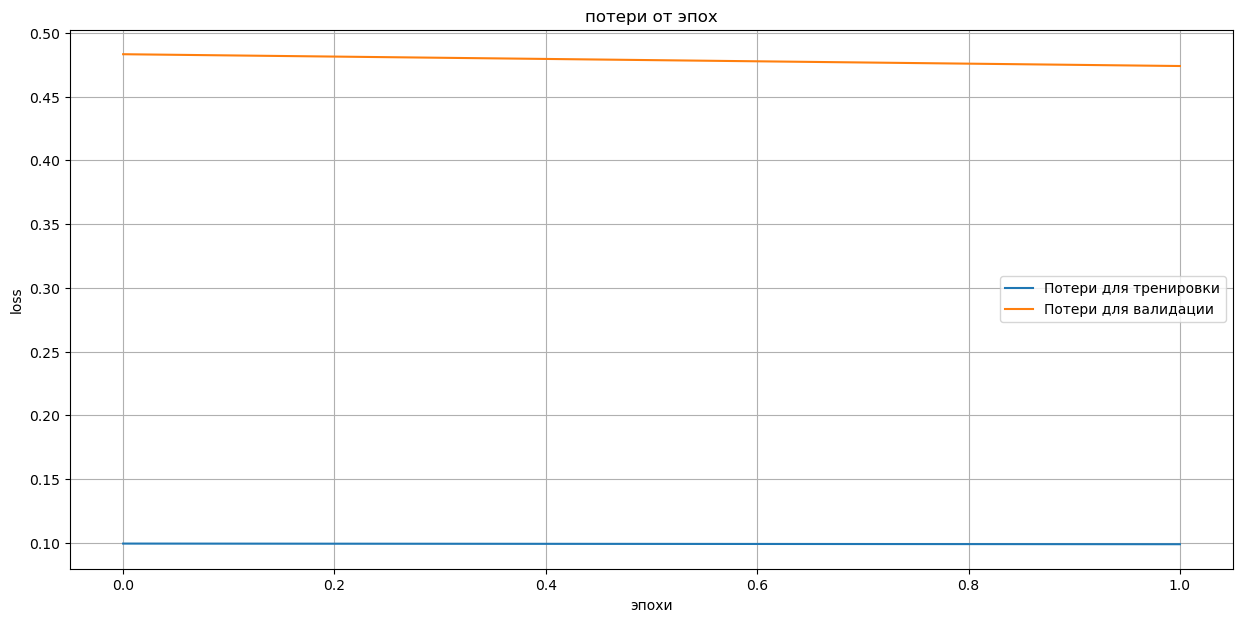

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 56)                43960     
                                                                 
 dense_115 (Dense)           (None, 56)                3192      
                                                                 
Total params: 47,152
Trainable params: 47,152
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1017 - accuracy: 0.9629 - val_loss: 0.4738 - val_accuracy: 0.8848
Epoch 2/2
313/313 [==============================] - 0s 775us/step - loss: 0.5114 - accuracy: 0.8789


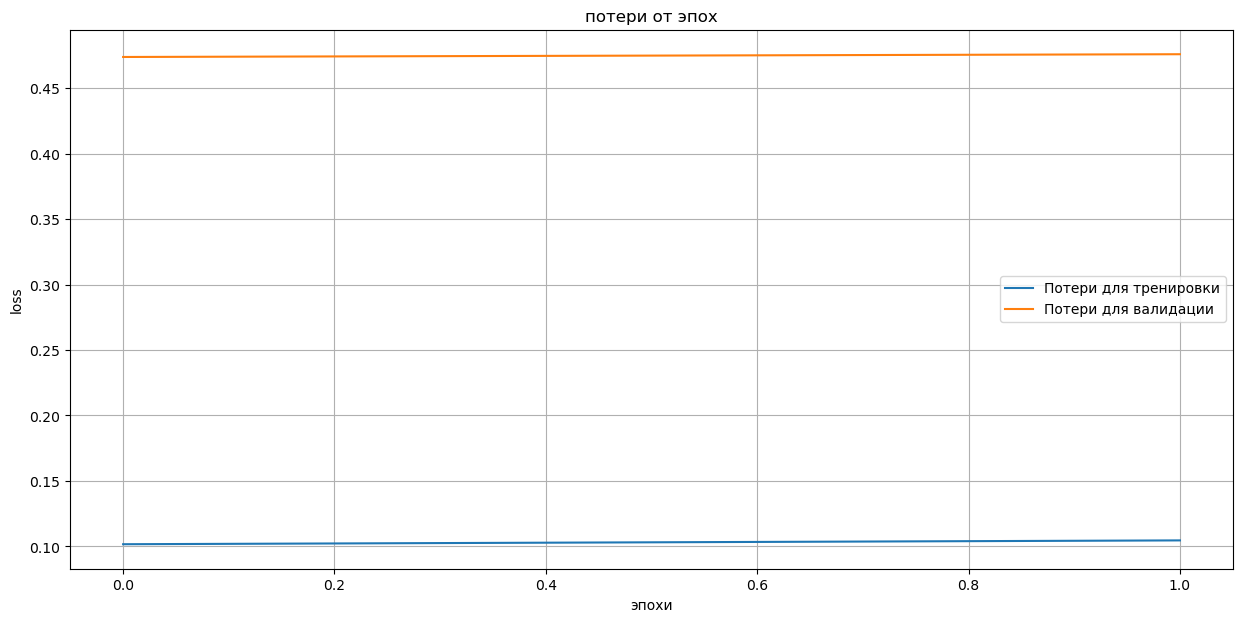

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 57)                44745     
                                                                 
 dense_117 (Dense)           (None, 57)                3306      
                                                                 
Total params: 48,051
Trainable params: 48,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0919 - accuracy: 0.9661 - val_loss: 0.4849 - val_accuracy: 0.8801
Epoch 2/2
313/313 [==============================] - 0s 803us/step - loss: 0.5199 - accuracy: 0.8760


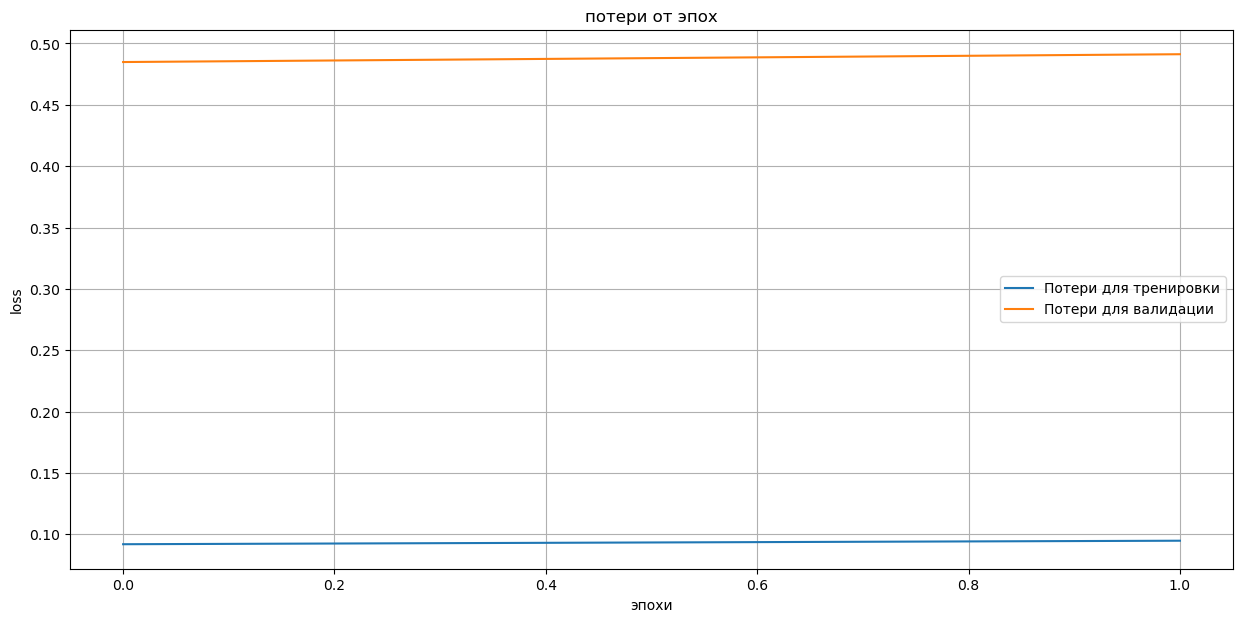

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 58)                45530     
                                                                 
 dense_119 (Dense)           (None, 58)                3422      
                                                                 
Total params: 48,952
Trainable params: 48,952
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0988 - accuracy: 0.9626 - val_loss: 0.4833 - val_accuracy: 0.8790
Epoch 2/2
313/313 [==============================] - 0s 794us/step - loss: 0.5028 - accuracy: 0.8821


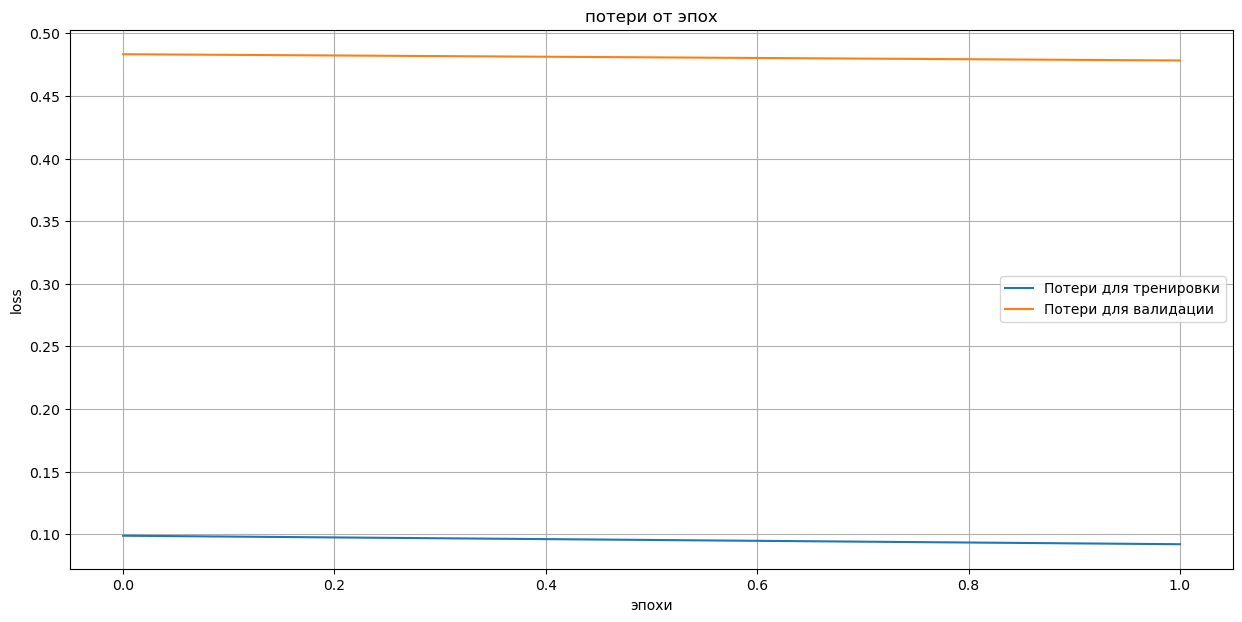

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 59)                46315     
                                                                 
 dense_121 (Dense)           (None, 59)                3540      
                                                                 
Total params: 49,855
Trainable params: 49,855
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0885 - accuracy: 0.9672 - val_loss: 0.5090 - val_accuracy: 0.8848
Epoch 2/2
313/313 [==============================] - 0s 792us/step - loss: 0.5069 - accuracy: 0.8774


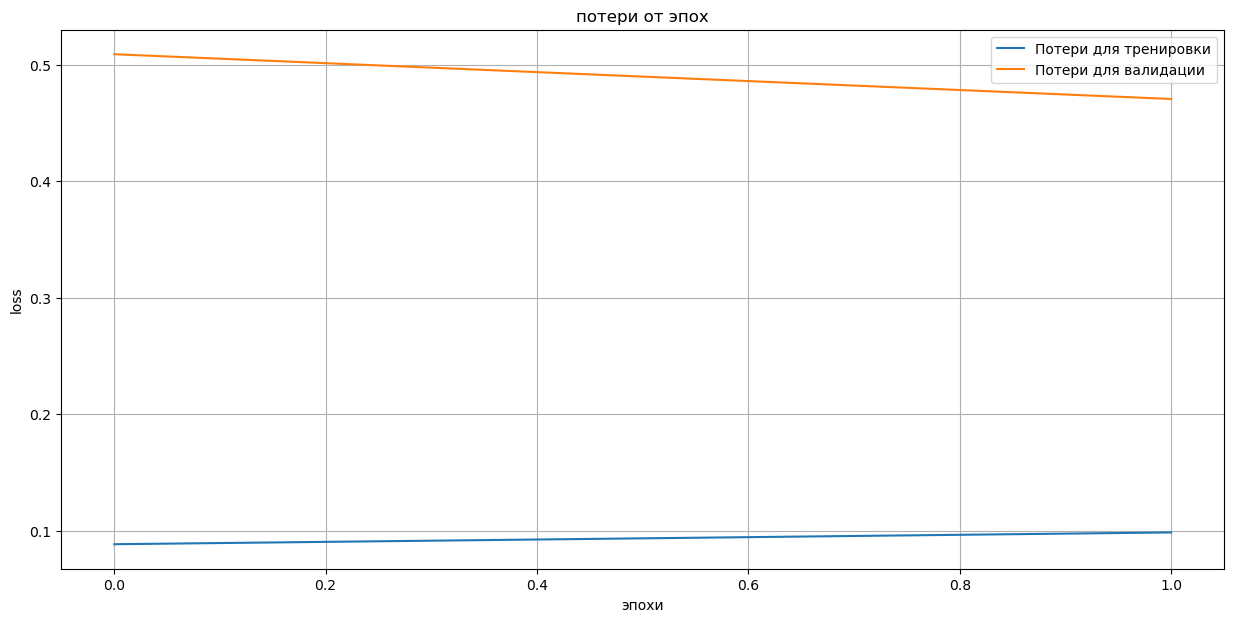

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 60)                47100     
                                                                 
 dense_123 (Dense)           (None, 60)                3660      
                                                                 
Total params: 50,760
Trainable params: 50,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0945 - accuracy: 0.9655 - val_loss: 0.4964 - val_accuracy: 0.8814
Epoch 2/2
313/313 [==============================] - 0s 760us/step - loss: 0.5016 - accuracy: 0.8810


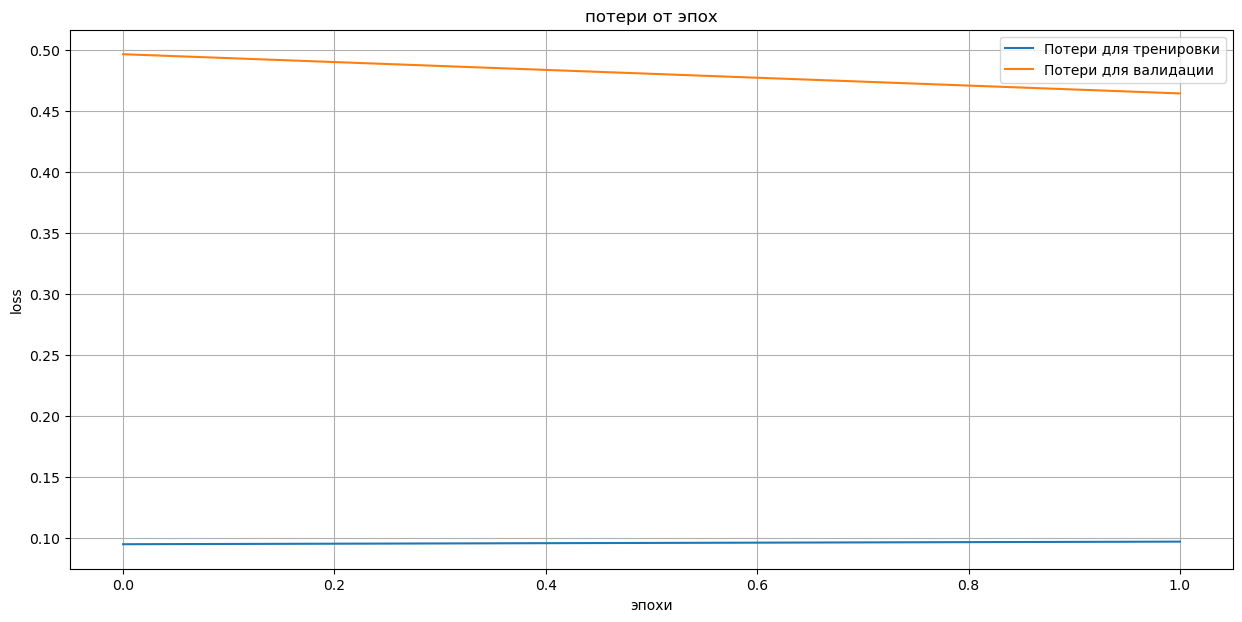

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 61)                47885     
                                                                 
 dense_125 (Dense)           (None, 61)                3782      
                                                                 
Total params: 51,667
Trainable params: 51,667
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0922 - accuracy: 0.9661 - val_loss: 0.4841 - val_accuracy: 0.8811
Epoch 2/2
313/313 [==============================] - 0s 792us/step - loss: 0.5210 - accuracy: 0.8778


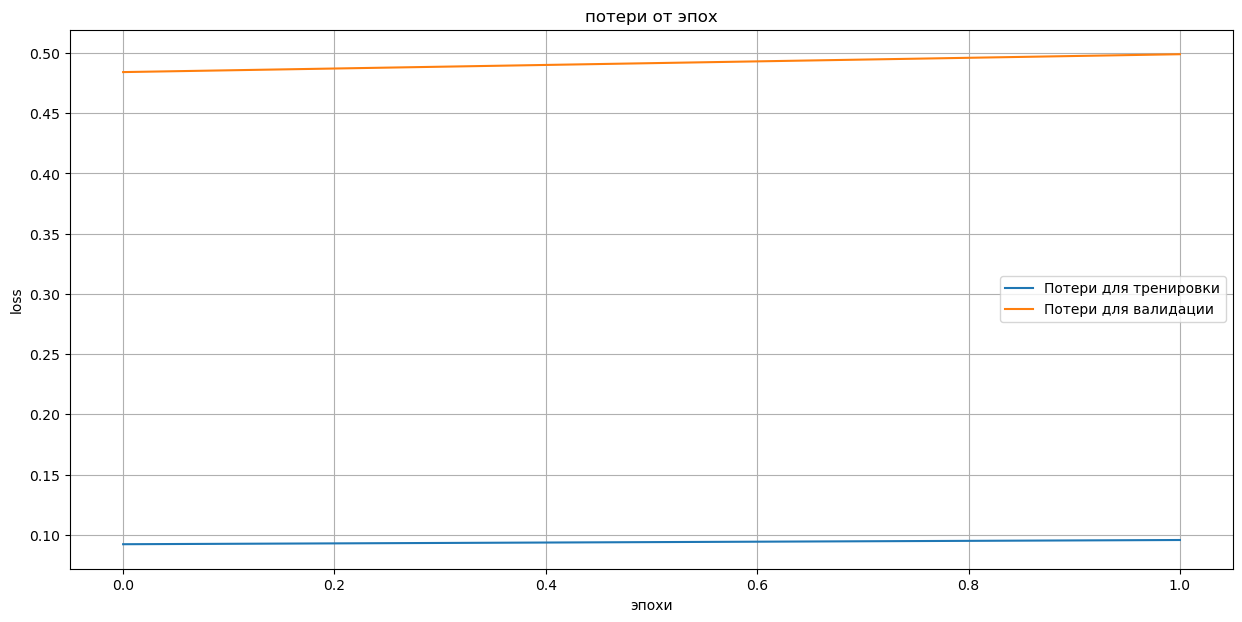

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 62)                48670     
                                                                 
 dense_127 (Dense)           (None, 62)                3906      
                                                                 
Total params: 52,576
Trainable params: 52,576
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0870 - accuracy: 0.9679 - val_loss: 0.4840 - val_accuracy: 0.8852
Epoch 2/2
313/313 [==============================] - 0s 793us/step - loss: 0.5252 - accuracy: 0.8803


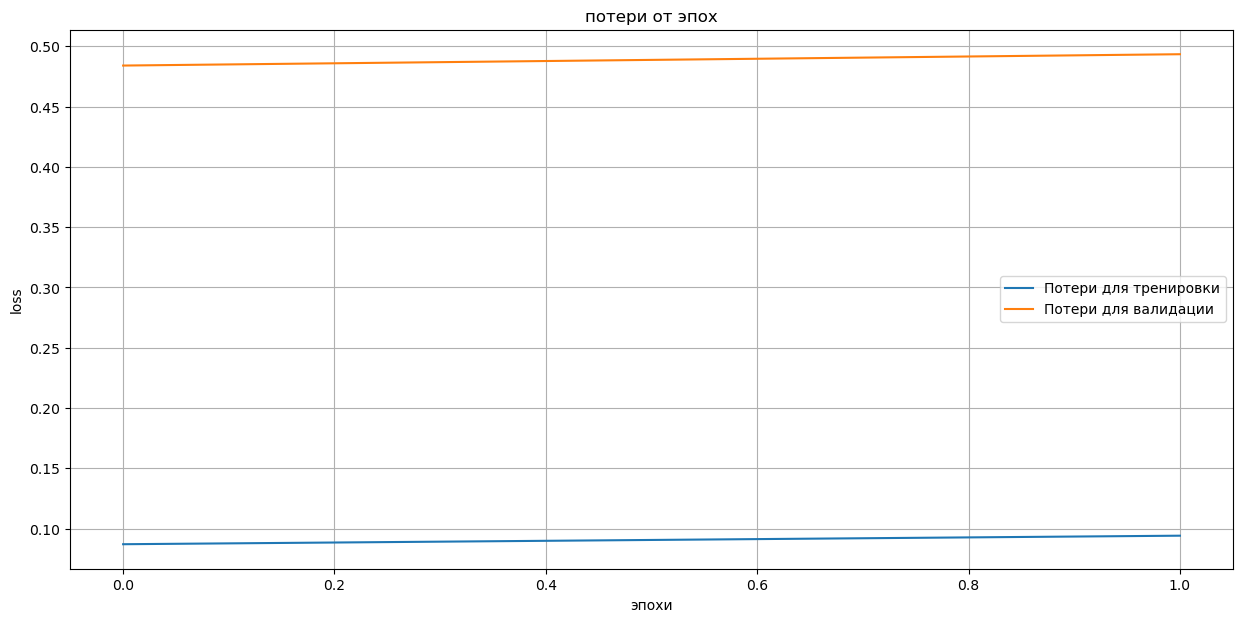

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 63)                49455     
                                                                 
 dense_129 (Dense)           (None, 63)                4032      
                                                                 
Total params: 53,487
Trainable params: 53,487
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0962 - accuracy: 0.9642 - val_loss: 0.4915 - val_accuracy: 0.8838
Epoch 2/2
313/313 [==============================] - 0s 824us/step - loss: 0.5146 - accuracy: 0.8796


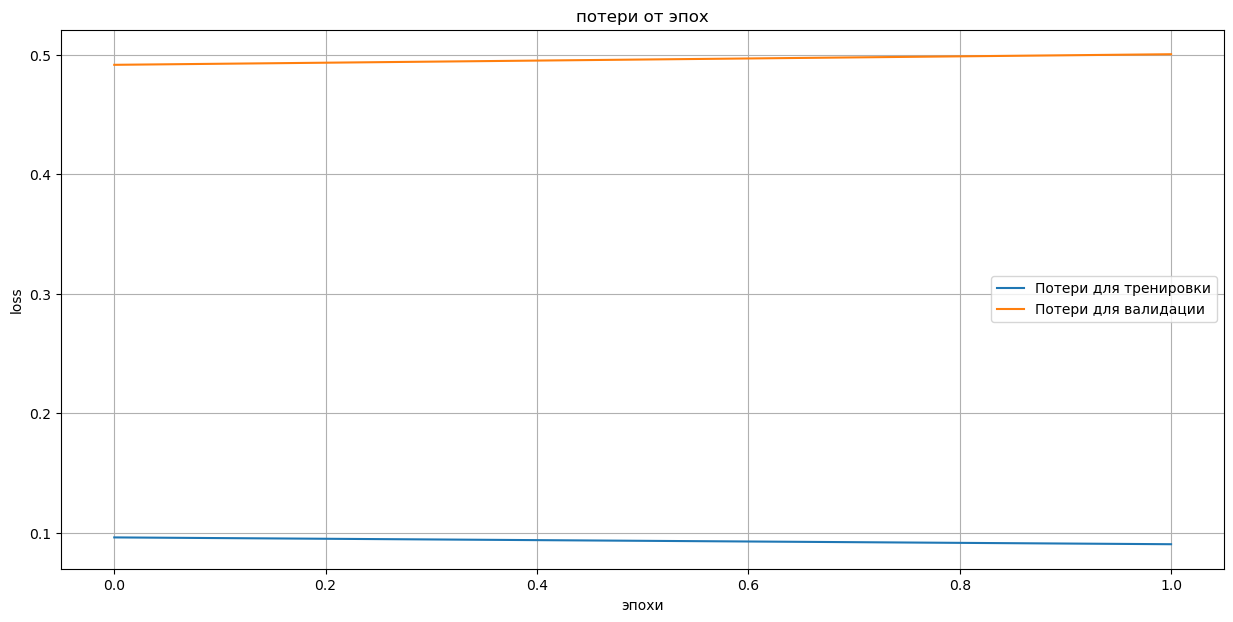

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 64)                50240     
                                                                 
 dense_131 (Dense)           (None, 64)                4160      
                                                                 
Total params: 54,400
Trainable params: 54,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0915 - accuracy: 0.9657 - val_loss: 0.4874 - val_accuracy: 0.8852
Epoch 2/2
313/313 [==============================] - 0s 786us/step - loss: 0.5049 - accuracy: 0.8790


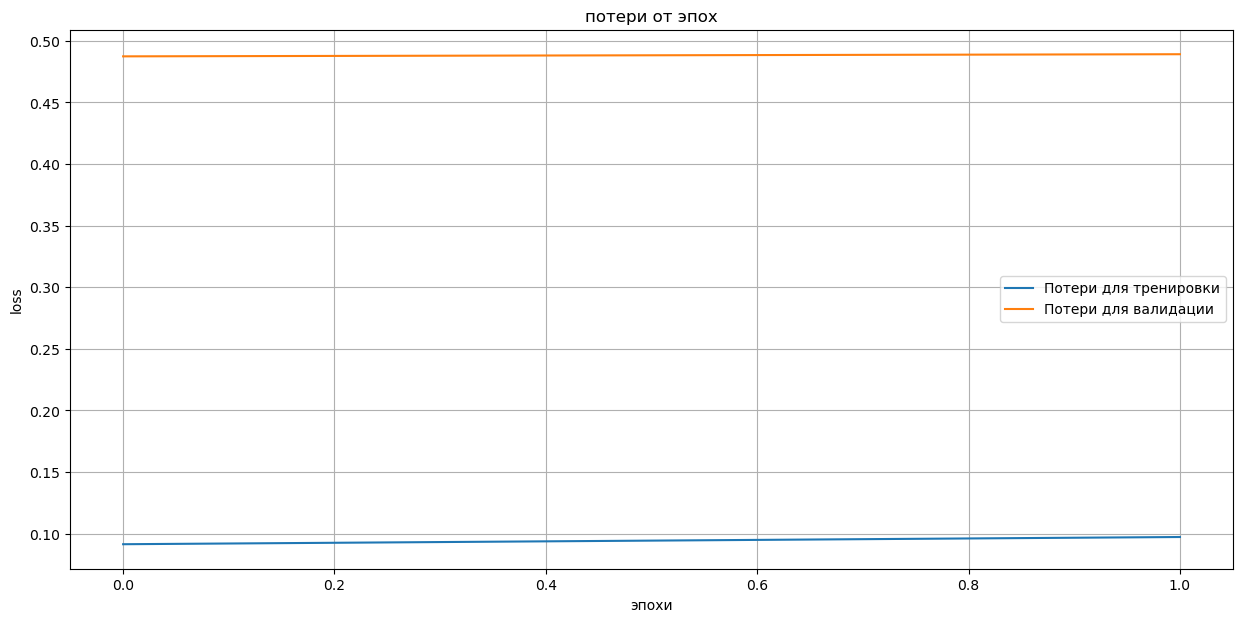

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 65)                51025     
                                                                 
 dense_133 (Dense)           (None, 65)                4290      
                                                                 
Total params: 55,315
Trainable params: 55,315
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0968 - accuracy: 0.9645 - val_loss: 0.4740 - val_accuracy: 0.8847
Epoch 2/2
313/313 [==============================] - 0s 786us/step - loss: 0.5323 - accuracy: 0.8747


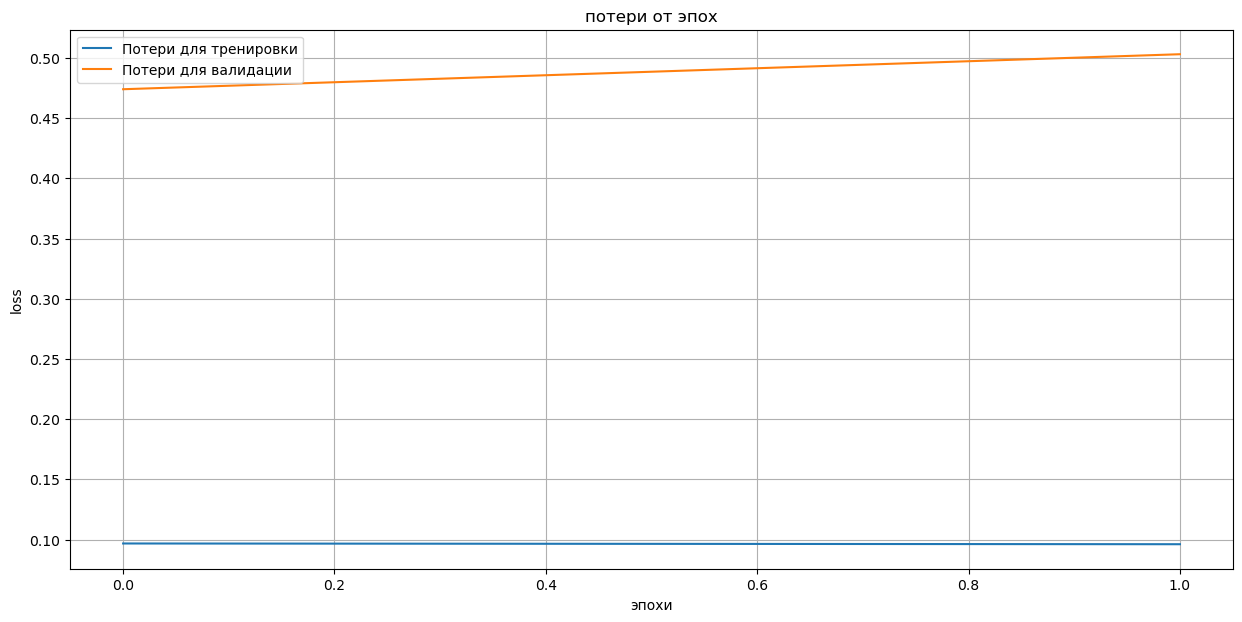

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 66)                51810     
                                                                 
 dense_135 (Dense)           (None, 66)                4422      
                                                                 
Total params: 56,232
Trainable params: 56,232
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1003 - accuracy: 0.9623 - val_loss: 0.4843 - val_accuracy: 0.8827
Epoch 2/2
313/313 [==============================] - 0s 794us/step - loss: 0.5093 - accuracy: 0.8789


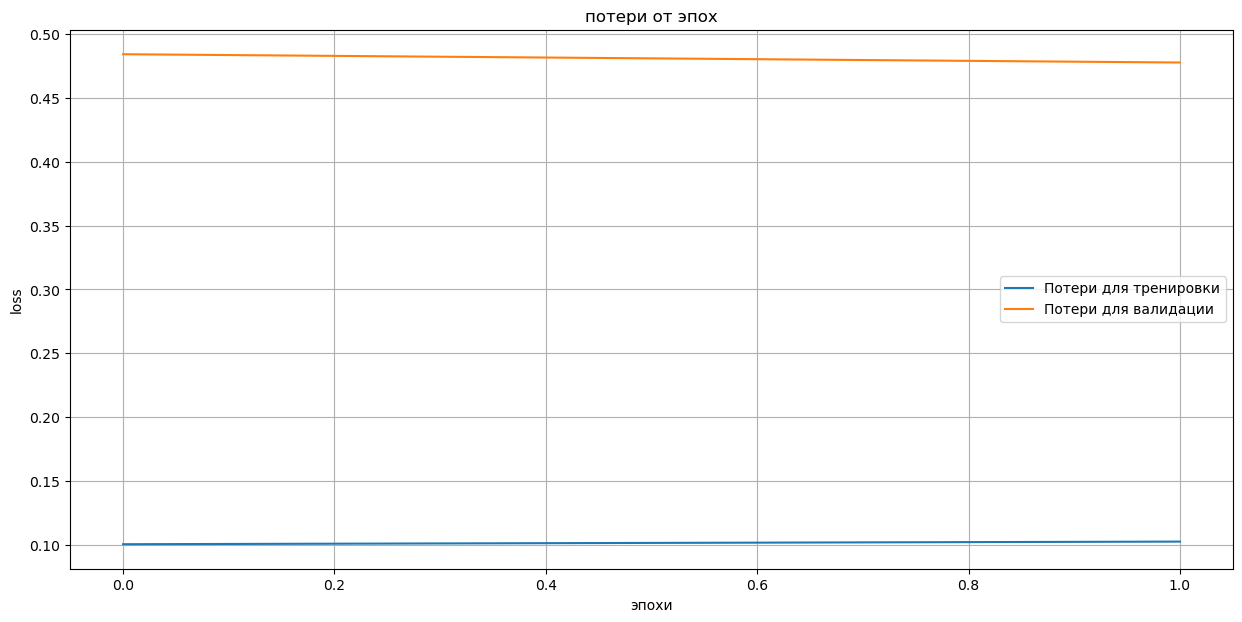

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 67)                52595     
                                                                 
 dense_137 (Dense)           (None, 67)                4556      
                                                                 
Total params: 57,151
Trainable params: 57,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0981 - accuracy: 0.9644 - val_loss: 0.4925 - val_accuracy: 0.8828
Epoch 2/2
313/313 [==============================] - 0s 771us/step - loss: 0.5250 - accuracy: 0.8794


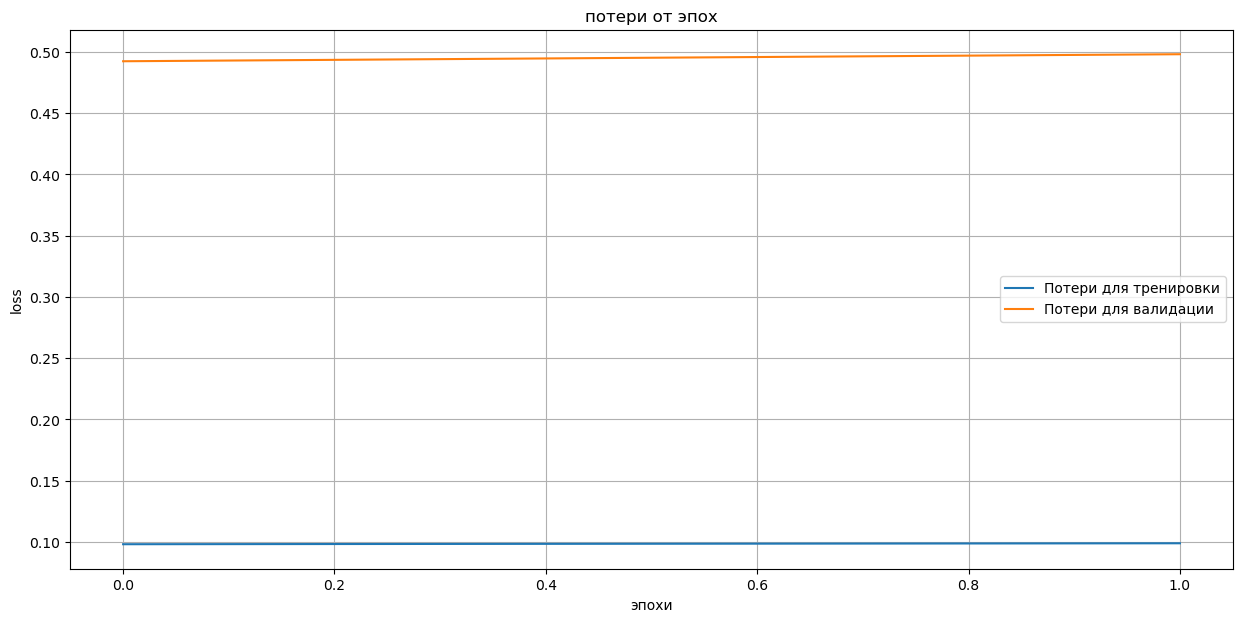

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 68)                53380     
                                                                 
 dense_139 (Dense)           (None, 68)                4692      
                                                                 
Total params: 58,072
Trainable params: 58,072
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0931 - accuracy: 0.9654 - val_loss: 0.4944 - val_accuracy: 0.8823
Epoch 2/2
313/313 [==============================] - 0s 794us/step - loss: 0.5111 - accuracy: 0.8768


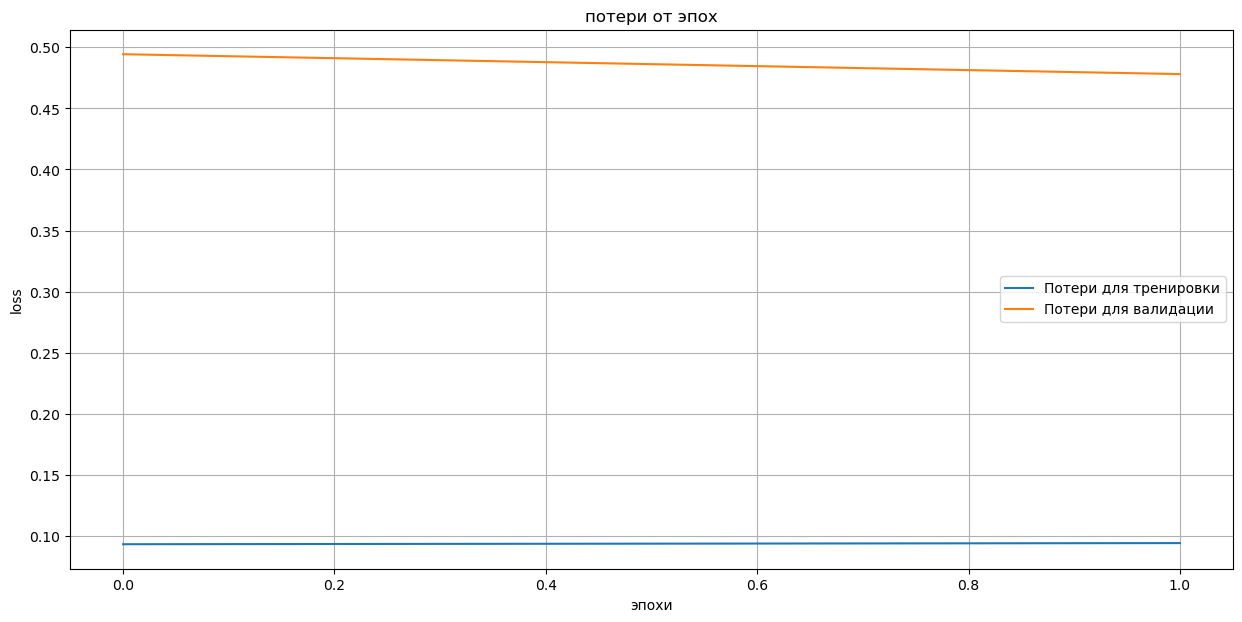

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 69)                54165     
                                                                 
 dense_141 (Dense)           (None, 69)                4830      
                                                                 
Total params: 58,995
Trainable params: 58,995
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0924 - accuracy: 0.9662 - val_loss: 0.4849 - val_accuracy: 0.8847
Epoch 2/2
313/313 [==============================] - 0s 776us/step - loss: 0.5088 - accuracy: 0.8786


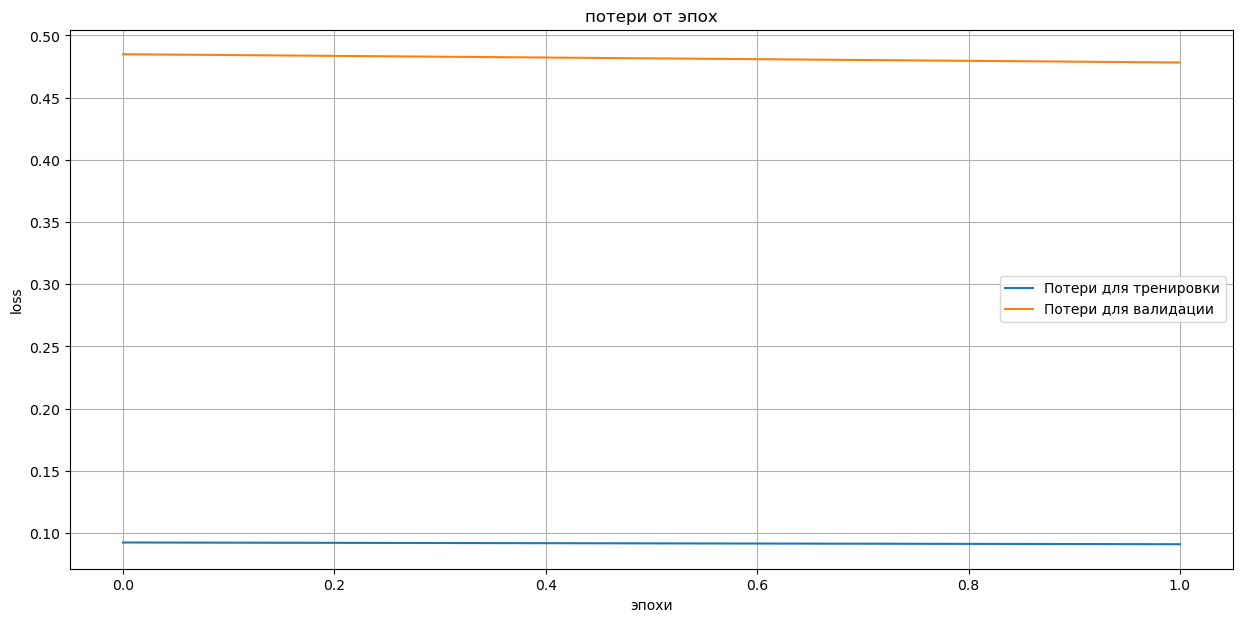

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 70)                54950     
                                                                 
 dense_143 (Dense)           (None, 70)                4970      
                                                                 
Total params: 59,920
Trainable params: 59,920
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0911 - accuracy: 0.9654 - val_loss: 0.4859 - val_accuracy: 0.8852
Epoch 2/2
313/313 [==============================] - 0s 765us/step - loss: 0.5430 - accuracy: 0.8748


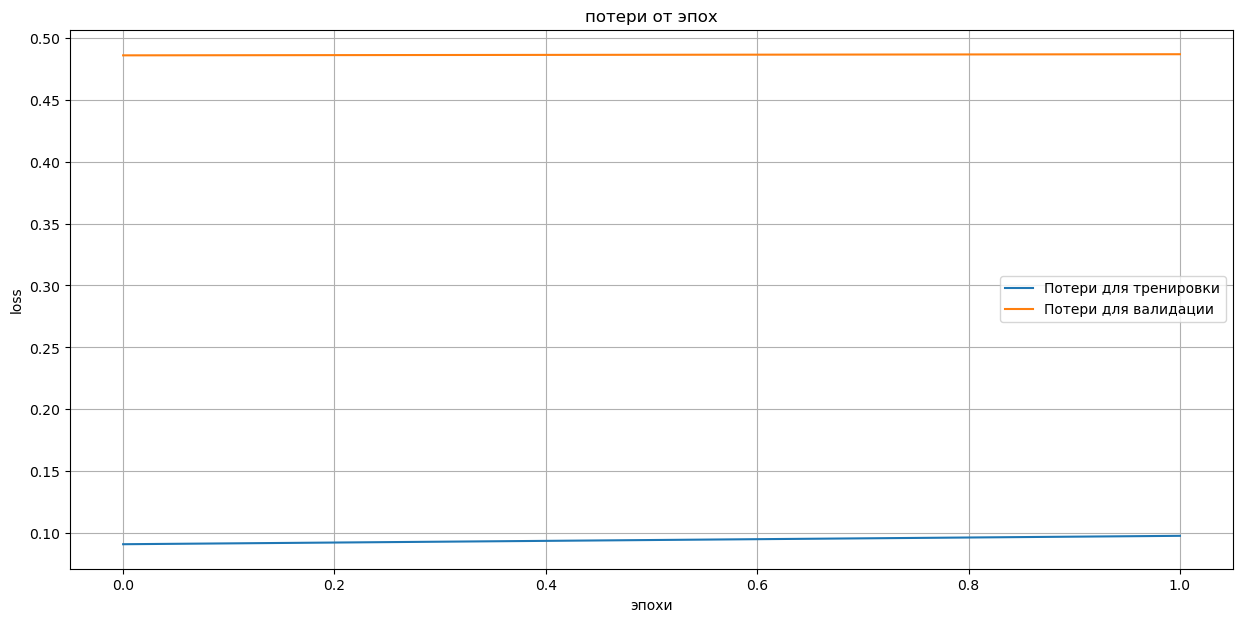

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 71)                55735     
                                                                 
 dense_145 (Dense)           (None, 71)                5112      
                                                                 
Total params: 60,847
Trainable params: 60,847
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0912 - accuracy: 0.9673 - val_loss: 0.5029 - val_accuracy: 0.8815
Epoch 2/2
313/313 [==============================] - 0s 794us/step - loss: 0.5270 - accuracy: 0.8788


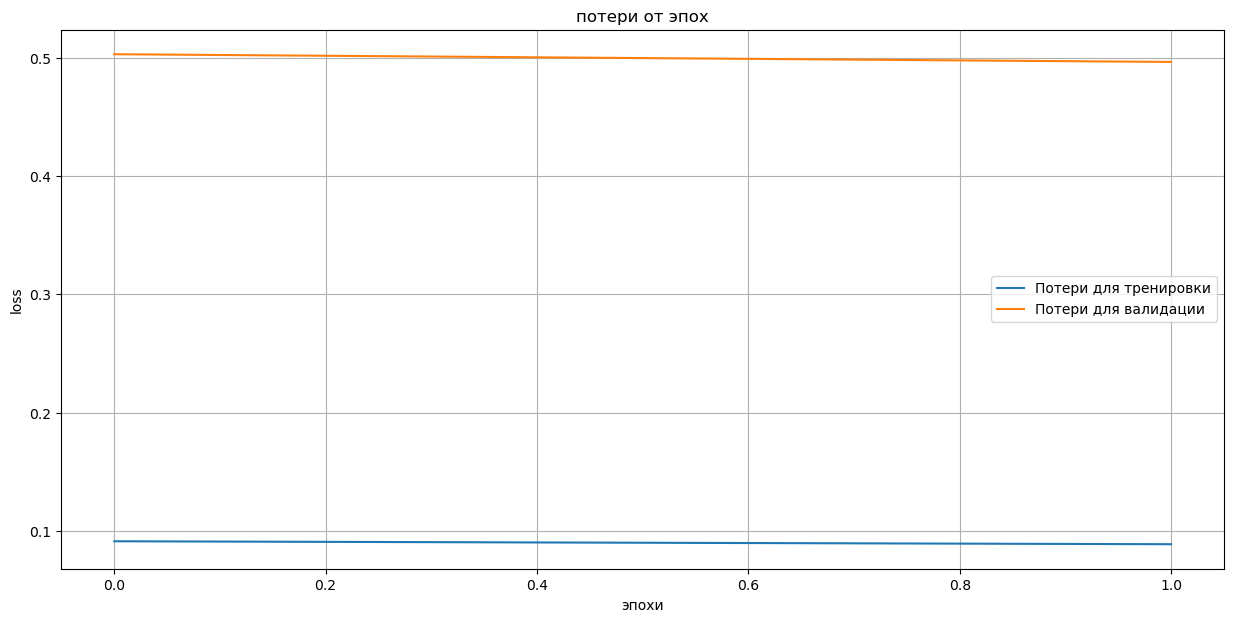

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 72)                56520     
                                                                 
 dense_147 (Dense)           (None, 72)                5256      
                                                                 
Total params: 61,776
Trainable params: 61,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0958 - accuracy: 0.9640 - val_loss: 0.4973 - val_accuracy: 0.8841
Epoch 2/2
313/313 [==============================] - 0s 794us/step - loss: 0.5402 - accuracy: 0.8765


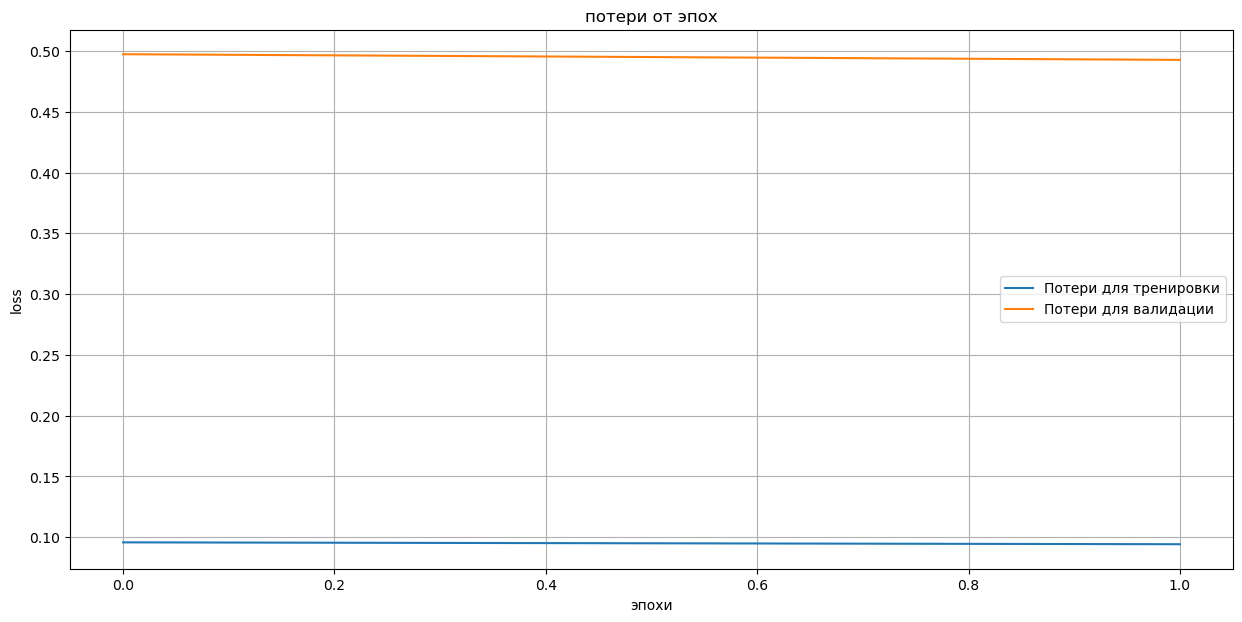

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 73)                57305     
                                                                 
 dense_149 (Dense)           (None, 73)                5402      
                                                                 
Total params: 62,707
Trainable params: 62,707
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0852 - accuracy: 0.9680 - val_loss: 0.5158 - val_accuracy: 0.8810
Epoch 2/2
313/313 [==============================] - 0s 782us/step - loss: 0.5443 - accuracy: 0.8765


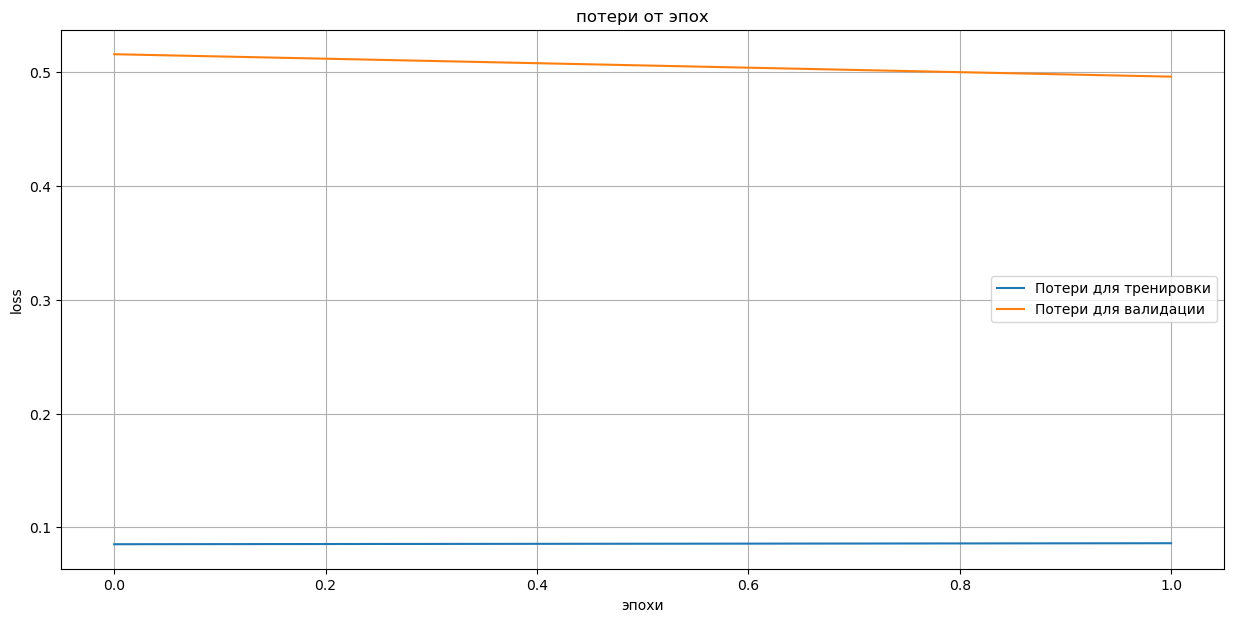

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 74)                58090     
                                                                 
 dense_151 (Dense)           (None, 74)                5550      
                                                                 
Total params: 63,640
Trainable params: 63,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0916 - accuracy: 0.9663 - val_loss: 0.5138 - val_accuracy: 0.8749
Epoch 2/2
313/313 [==============================] - 0s 783us/step - loss: 0.5293 - accuracy: 0.8775


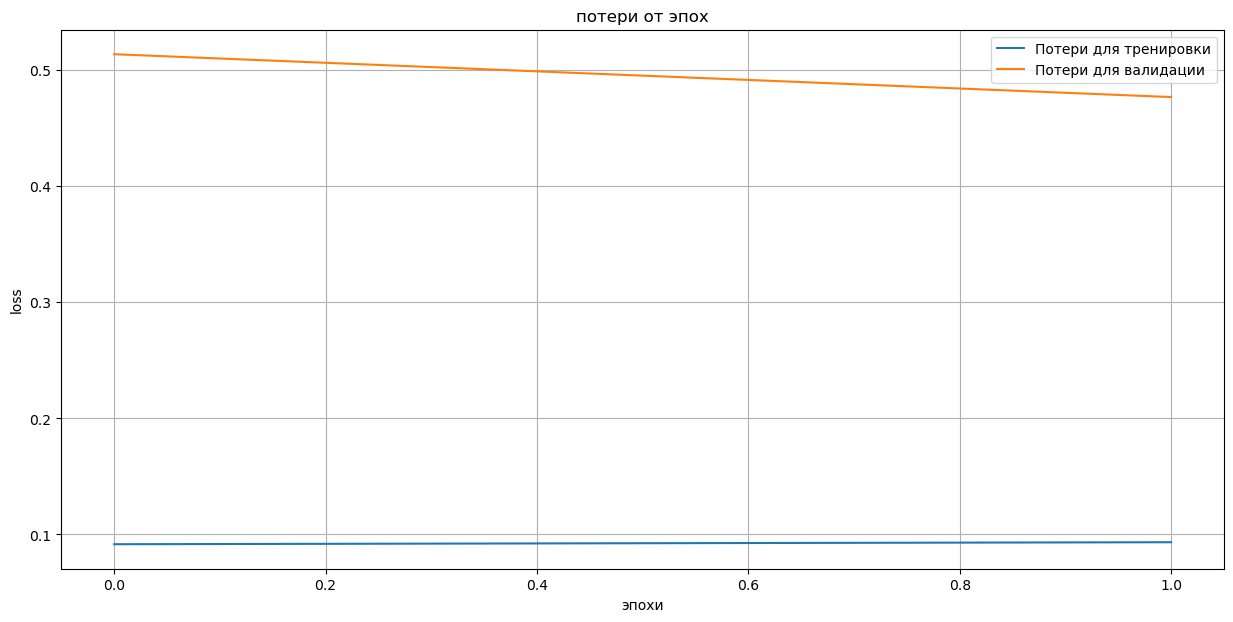

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 75)                58875     
                                                                 
 dense_153 (Dense)           (None, 75)                5700      
                                                                 
Total params: 64,575
Trainable params: 64,575
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0898 - accuracy: 0.9675 - val_loss: 0.4671 - val_accuracy: 0.8877
Epoch 2/2
313/313 [==============================] - 0s 798us/step - loss: 0.5526 - accuracy: 0.8746


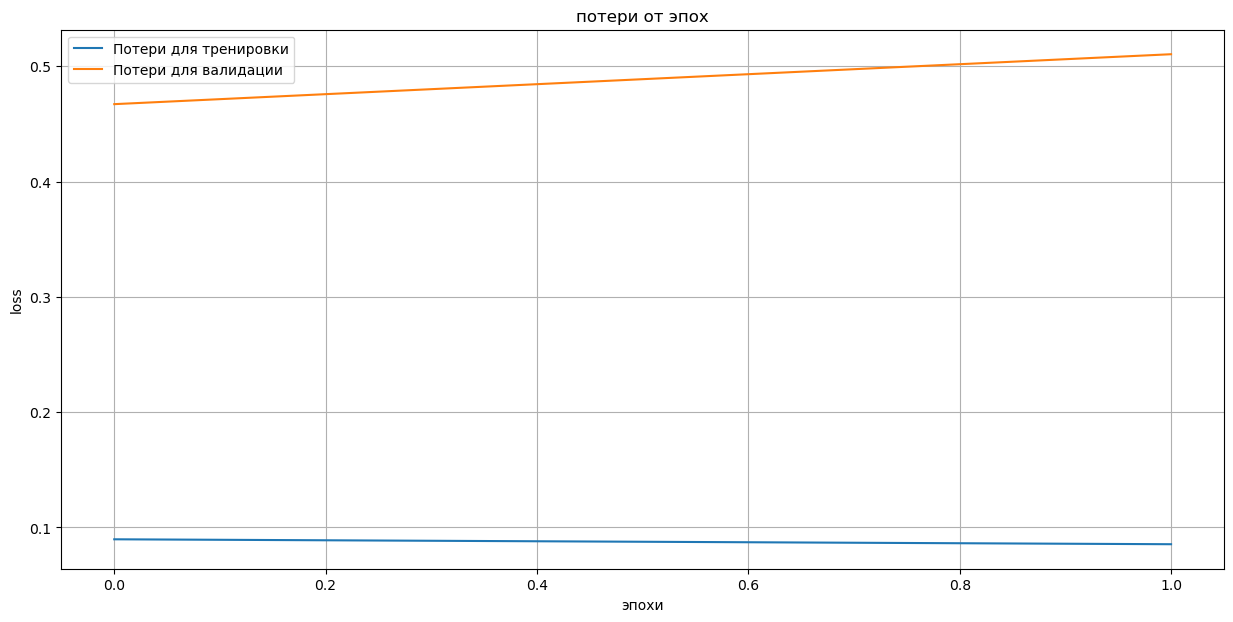

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 76)                59660     
                                                                 
 dense_155 (Dense)           (None, 76)                5852      
                                                                 
Total params: 65,512
Trainable params: 65,512
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9684 - val_loss: 0.4951 - val_accuracy: 0.8862
Epoch 2/2
313/313 [==============================] - 0s 820us/step - loss: 0.5309 - accuracy: 0.8763


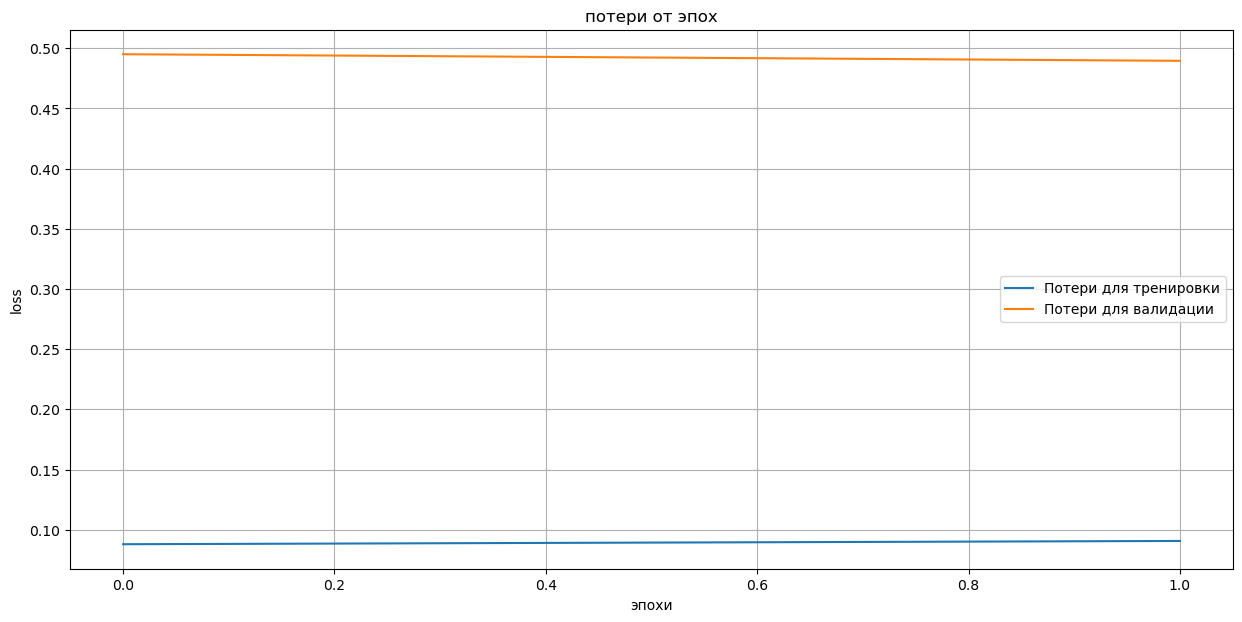

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 77)                60445     
                                                                 
 dense_157 (Dense)           (None, 77)                6006      
                                                                 
Total params: 66,451
Trainable params: 66,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0946 - accuracy: 0.9648 - val_loss: 0.4900 - val_accuracy: 0.8828
Epoch 2/2
313/313 [==============================] - 0s 815us/step - loss: 0.5372 - accuracy: 0.8751


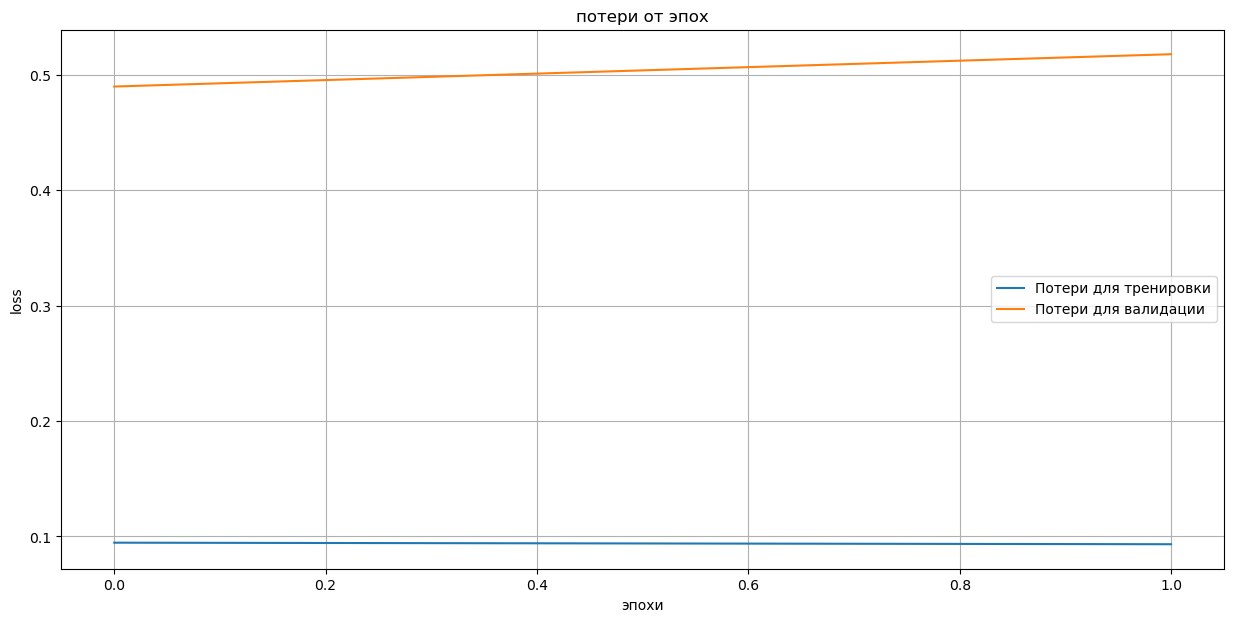

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_158 (Dense)           (None, 78)                61230     
                                                                 
 dense_159 (Dense)           (None, 78)                6162      
                                                                 
Total params: 67,392
Trainable params: 67,392
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0887 - accuracy: 0.9676 - val_loss: 0.5165 - val_accuracy: 0.8786
Epoch 2/2
313/313 [==============================] - 0s 782us/step - loss: 0.5304 - accuracy: 0.8788


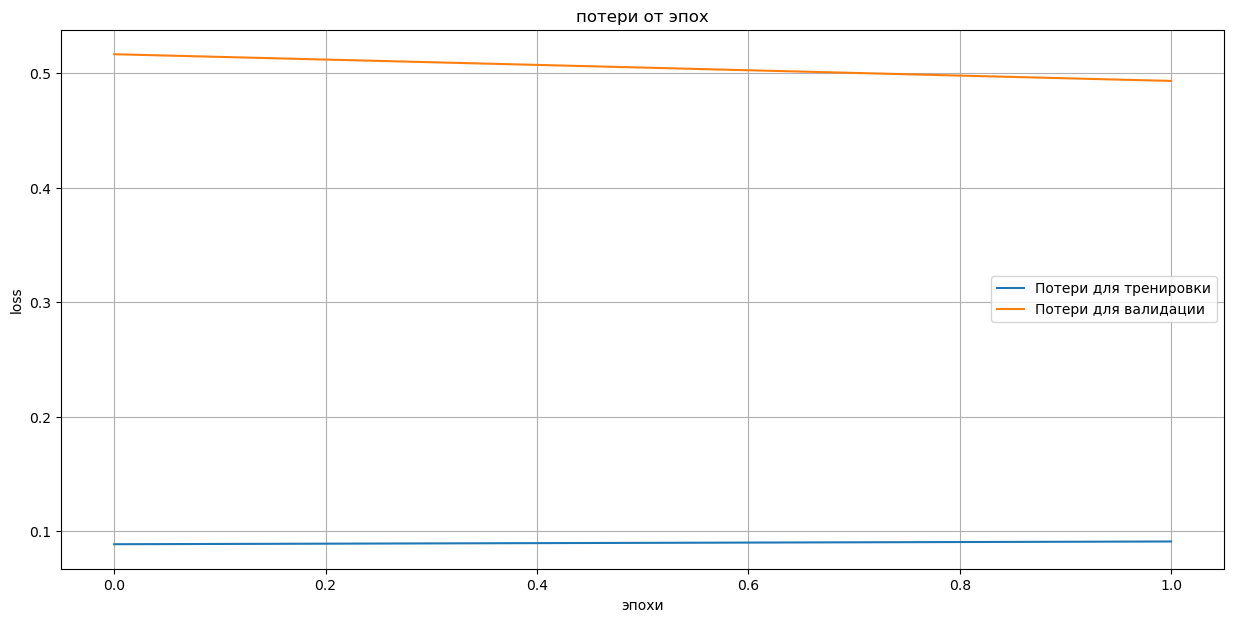

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 79)                62015     
                                                                 
 dense_161 (Dense)           (None, 79)                6320      
                                                                 
Total params: 68,335
Trainable params: 68,335
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0943 - accuracy: 0.9651 - val_loss: 0.5128 - val_accuracy: 0.8802
Epoch 2/2
313/313 [==============================] - 0s 781us/step - loss: 0.5459 - accuracy: 0.8763


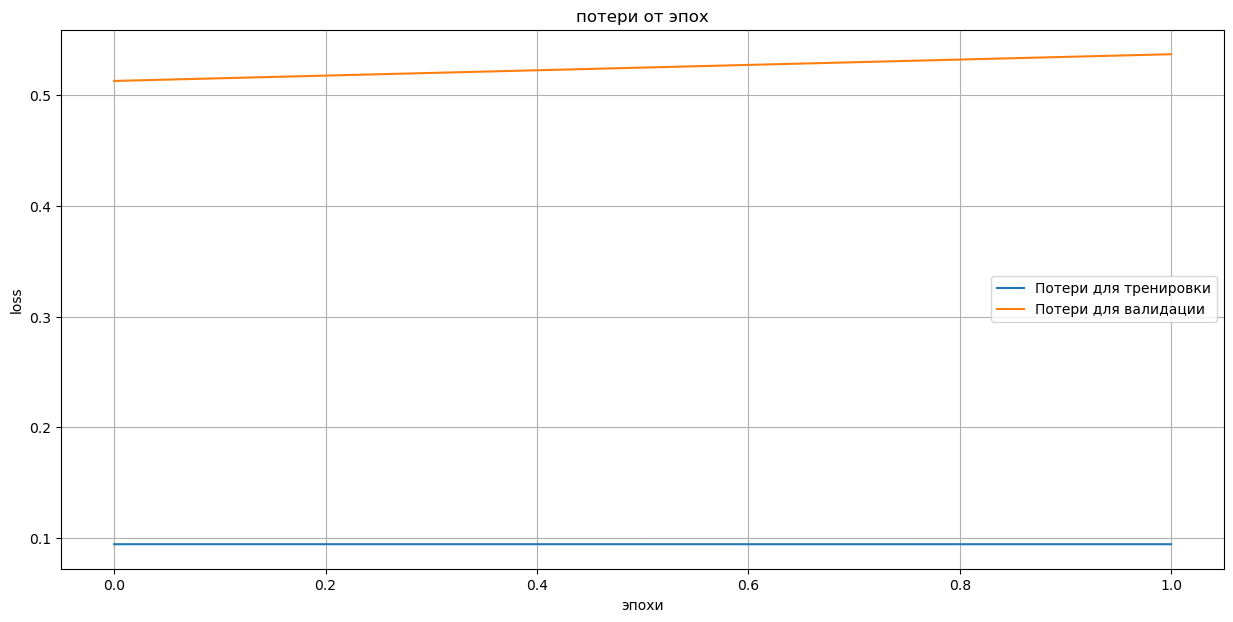

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 80)                62800     
                                                                 
 dense_163 (Dense)           (None, 80)                6480      
                                                                 
Total params: 69,280
Trainable params: 69,280
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0993 - accuracy: 0.9630 - val_loss: 0.4772 - val_accuracy: 0.8842
Epoch 2/2
313/313 [==============================] - 0s 816us/step - loss: 0.5255 - accuracy: 0.8776


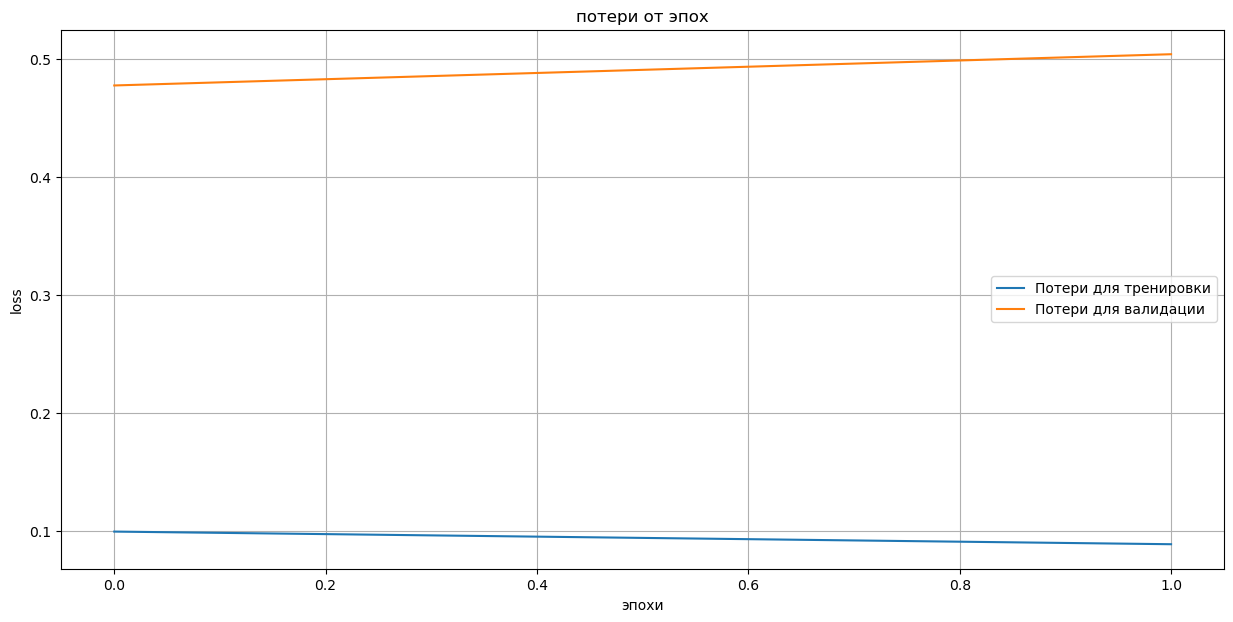

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 81)                63585     
                                                                 
 dense_165 (Dense)           (None, 81)                6642      
                                                                 
Total params: 70,227
Trainable params: 70,227
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0955 - accuracy: 0.9647 - val_loss: 0.5103 - val_accuracy: 0.8806
Epoch 2/2
313/313 [==============================] - 0s 766us/step - loss: 0.5389 - accuracy: 0.8730


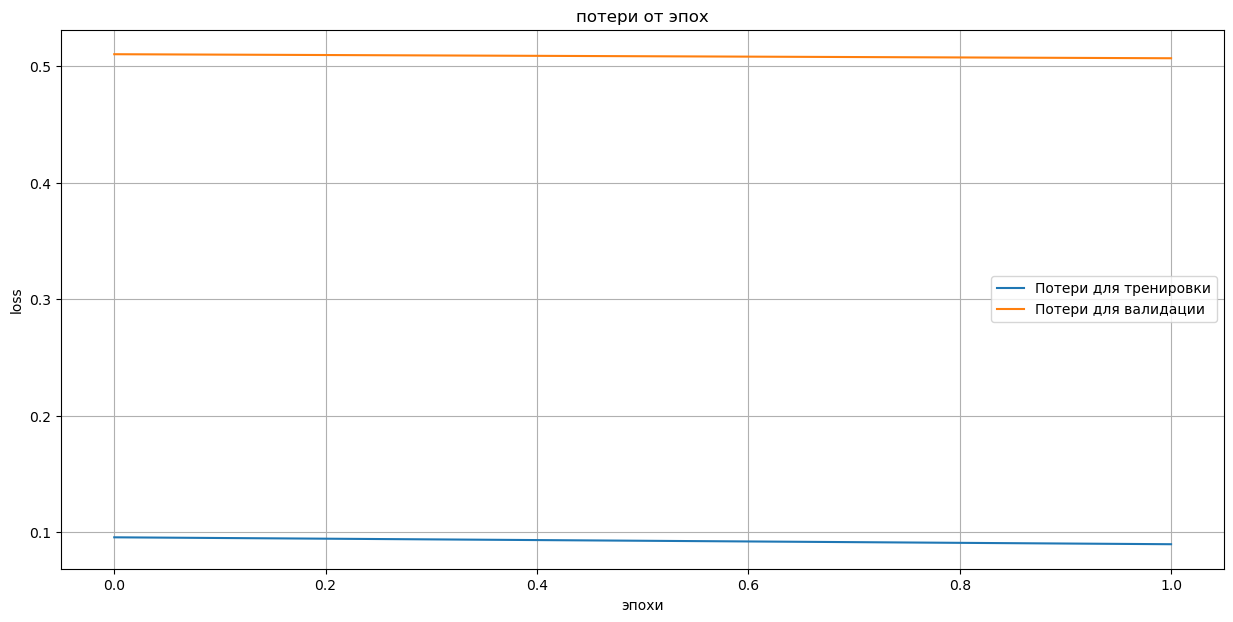

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 82)                64370     
                                                                 
 dense_167 (Dense)           (None, 82)                6806      
                                                                 
Total params: 71,176
Trainable params: 71,176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0884 - accuracy: 0.9663 - val_loss: 0.4989 - val_accuracy: 0.8829
Epoch 2/2
313/313 [==============================] - 0s 805us/step - loss: 0.5297 - accuracy: 0.8731


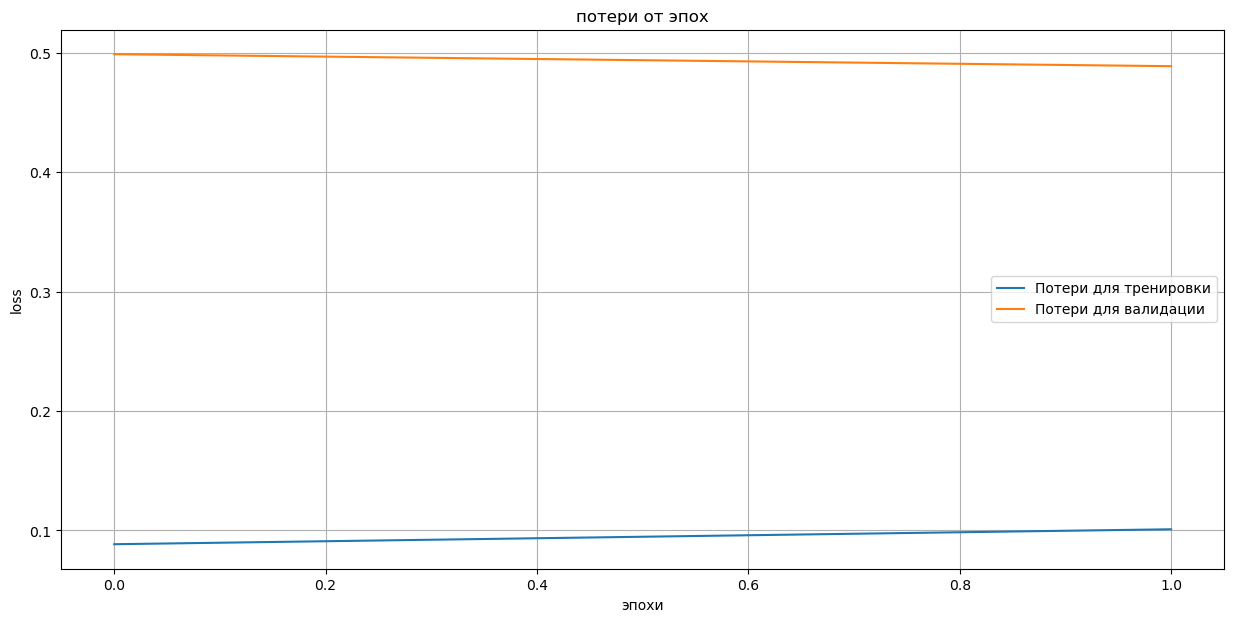

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 83)                65155     
                                                                 
 dense_169 (Dense)           (None, 83)                6972      
                                                                 
Total params: 72,127
Trainable params: 72,127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0967 - accuracy: 0.9638 - val_loss: 0.4846 - val_accuracy: 0.8871
Epoch 2/2
313/313 [==============================] - 0s 799us/step - loss: 0.5271 - accuracy: 0.8748


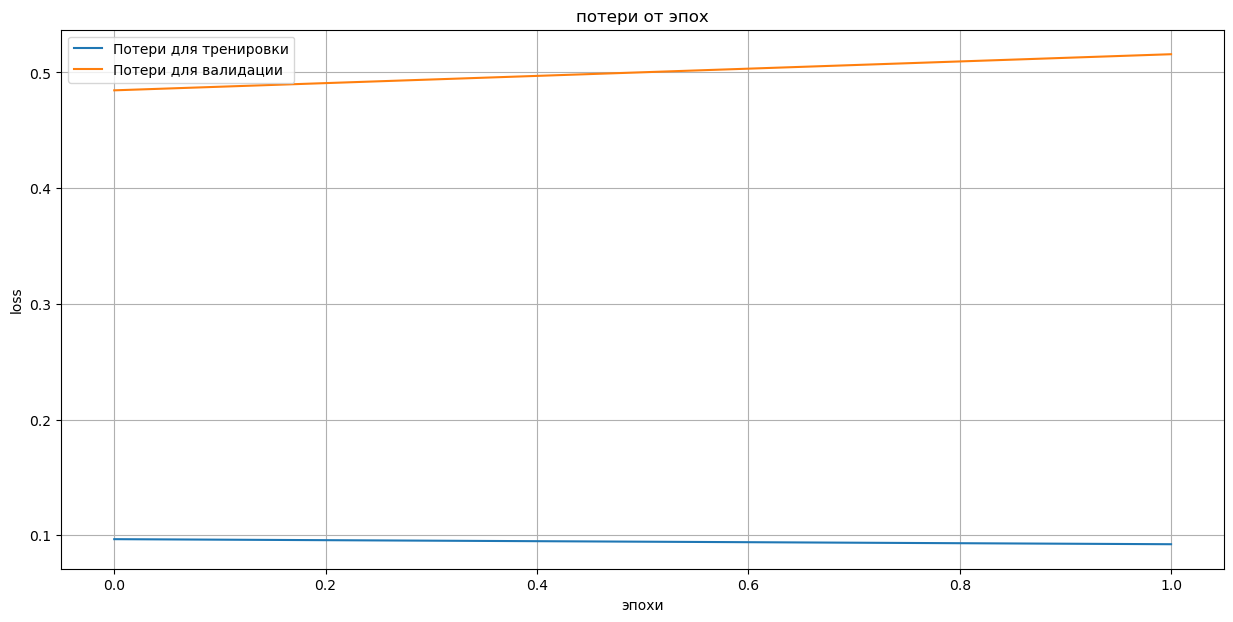

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 84)                65940     
                                                                 
 dense_171 (Dense)           (None, 84)                7140      
                                                                 
Total params: 73,080
Trainable params: 73,080
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0883 - accuracy: 0.9672 - val_loss: 0.4943 - val_accuracy: 0.8841
Epoch 2/2
313/313 [==============================] - 0s 816us/step - loss: 0.5415 - accuracy: 0.8766


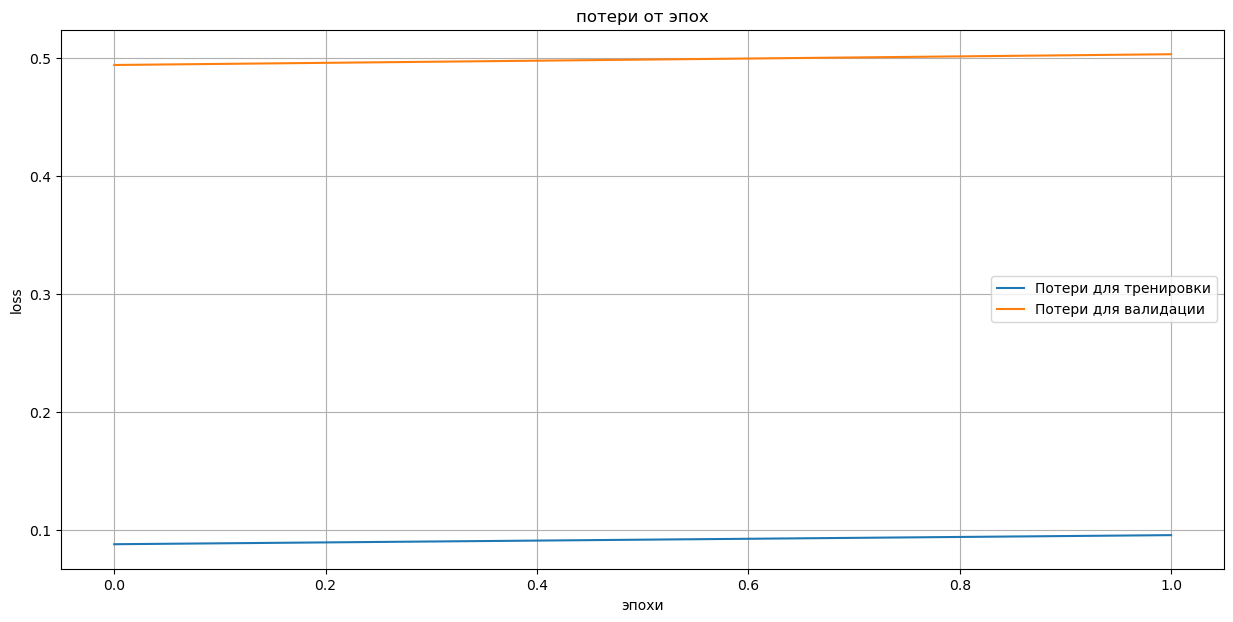

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 85)                66725     
                                                                 
 dense_173 (Dense)           (None, 85)                7310      
                                                                 
Total params: 74,035
Trainable params: 74,035
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0981 - accuracy: 0.9644 - val_loss: 0.4803 - val_accuracy: 0.8826
Epoch 2/2
313/313 [==============================] - 0s 761us/step - loss: 0.5311 - accuracy: 0.8770


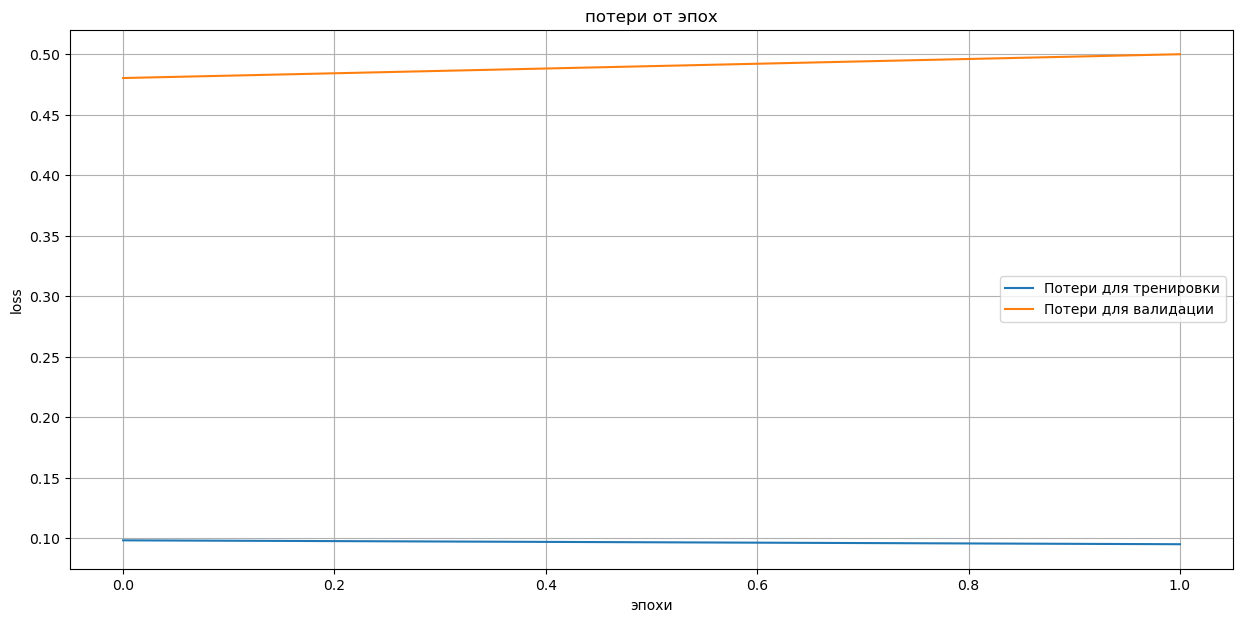

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 86)                67510     
                                                                 
 dense_175 (Dense)           (None, 86)                7482      
                                                                 
Total params: 74,992
Trainable params: 74,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9686 - val_loss: 0.4835 - val_accuracy: 0.8878
Epoch 2/2
313/313 [==============================] - 0s 789us/step - loss: 0.5345 - accuracy: 0.8768


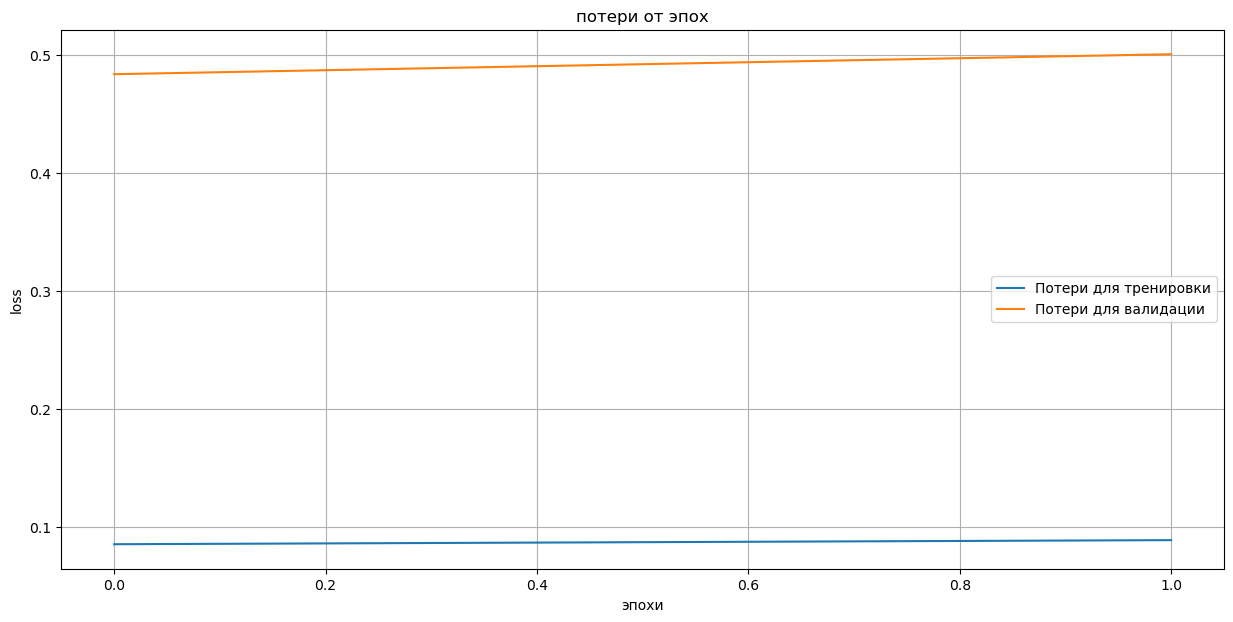

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 87)                68295     
                                                                 
 dense_177 (Dense)           (None, 87)                7656      
                                                                 
Total params: 75,951
Trainable params: 75,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0948 - accuracy: 0.9650 - val_loss: 0.4841 - val_accuracy: 0.8843
Epoch 2/2
313/313 [==============================] - 0s 778us/step - loss: 0.5164 - accuracy: 0.8754


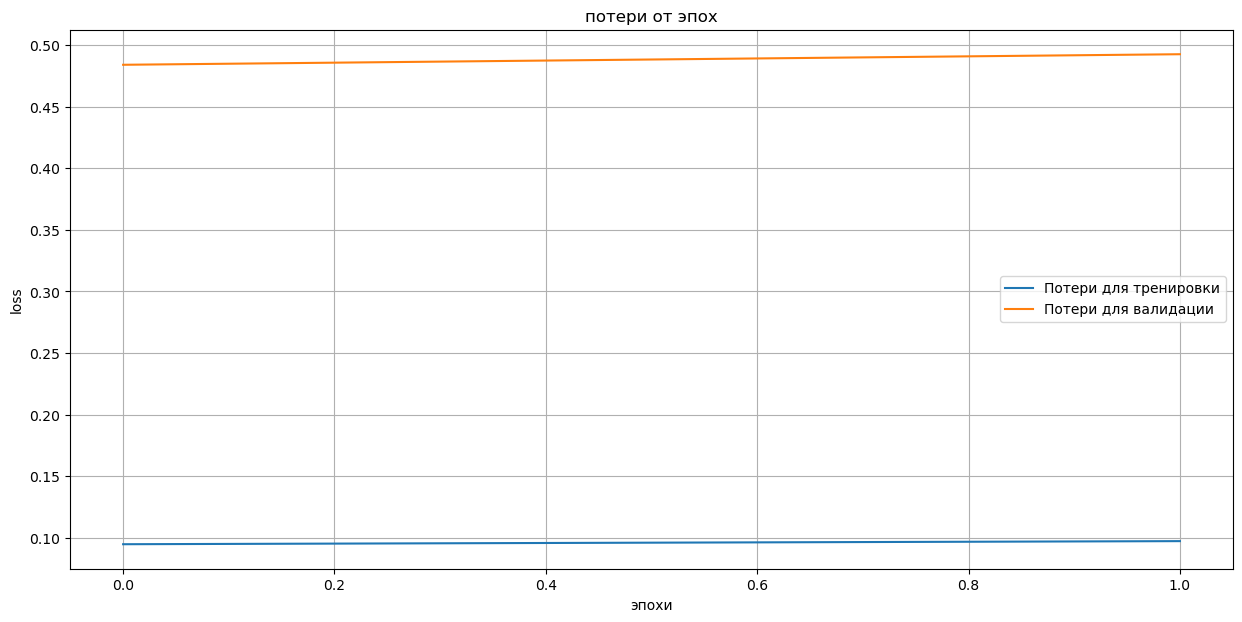

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 88)                69080     
                                                                 
 dense_179 (Dense)           (None, 88)                7832      
                                                                 
Total params: 76,912
Trainable params: 76,912
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0881 - accuracy: 0.9673 - val_loss: 0.4926 - val_accuracy: 0.8846
Epoch 2/2
313/313 [==============================] - 0s 771us/step - loss: 0.5256 - accuracy: 0.8800


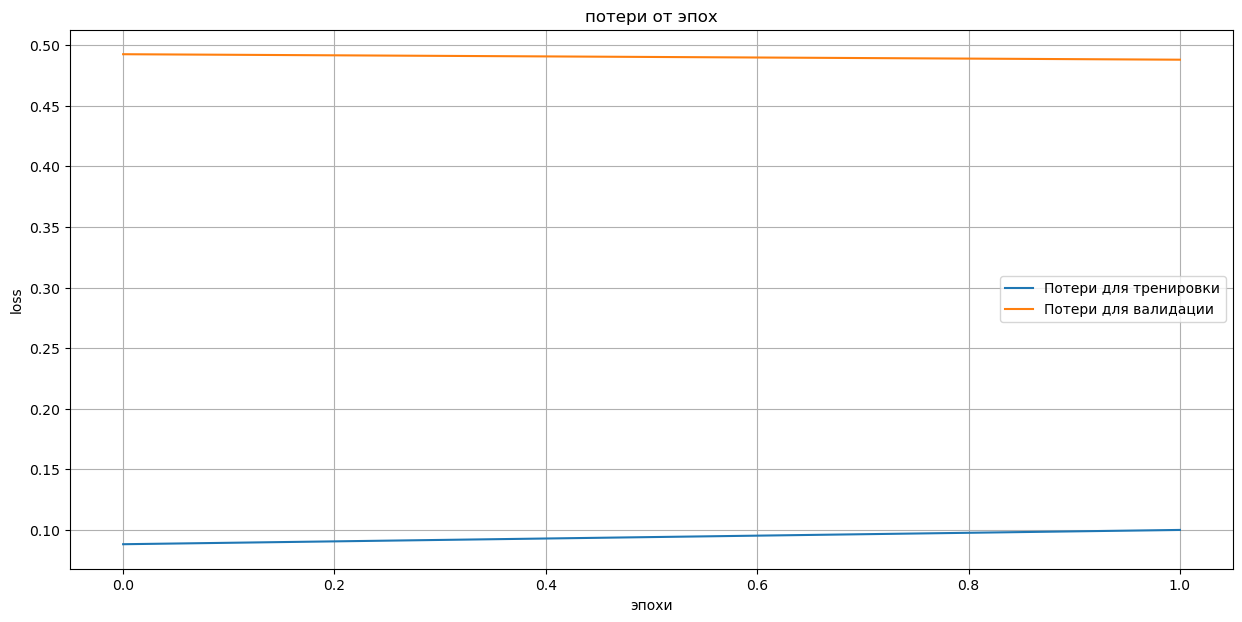

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 89)                69865     
                                                                 
 dense_181 (Dense)           (None, 89)                8010      
                                                                 
Total params: 77,875
Trainable params: 77,875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0797 - accuracy: 0.9699 - val_loss: 0.5295 - val_accuracy: 0.8785
Epoch 2/2
313/313 [==============================] - 0s 775us/step - loss: 0.5447 - accuracy: 0.8746


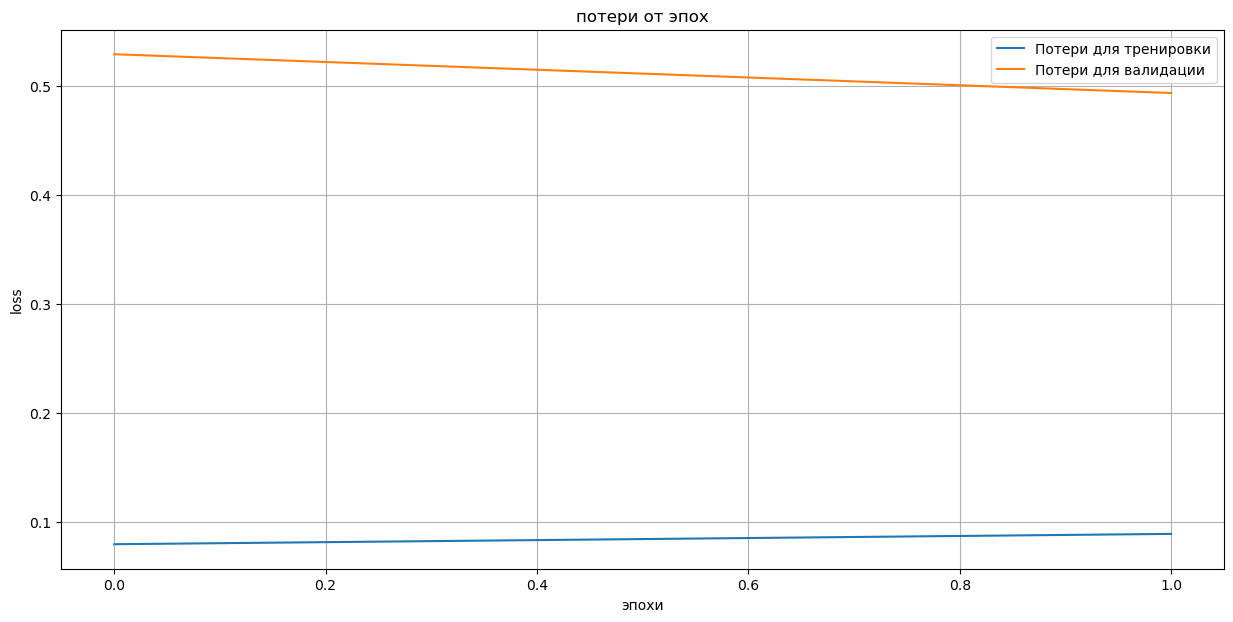

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_182 (Dense)           (None, 90)                70650     
                                                                 
 dense_183 (Dense)           (None, 90)                8190      
                                                                 
Total params: 78,840
Trainable params: 78,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0917 - accuracy: 0.9662 - val_loss: 0.5323 - val_accuracy: 0.8795
Epoch 2/2
313/313 [==============================] - 0s 817us/step - loss: 0.5173 - accuracy: 0.8775


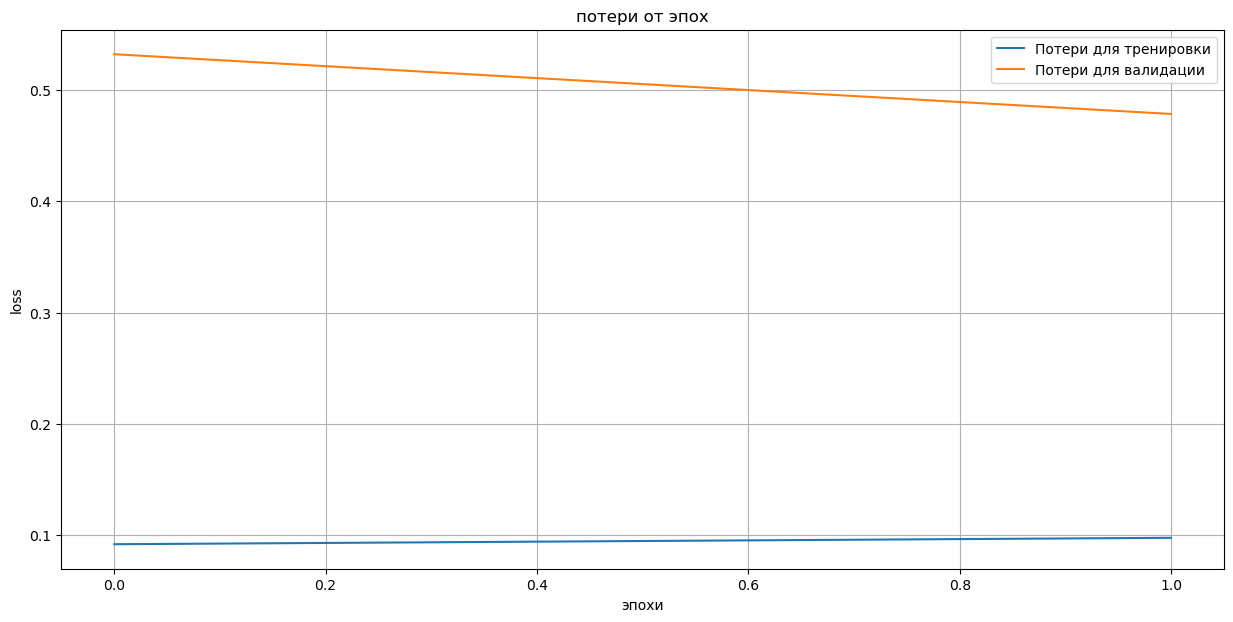

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 91)                71435     
                                                                 
 dense_185 (Dense)           (None, 91)                8372      
                                                                 
Total params: 79,807
Trainable params: 79,807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0895 - accuracy: 0.9672 - val_loss: 0.5092 - val_accuracy: 0.8839
Epoch 2/2
313/313 [==============================] - 0s 760us/step - loss: 0.5268 - accuracy: 0.8753


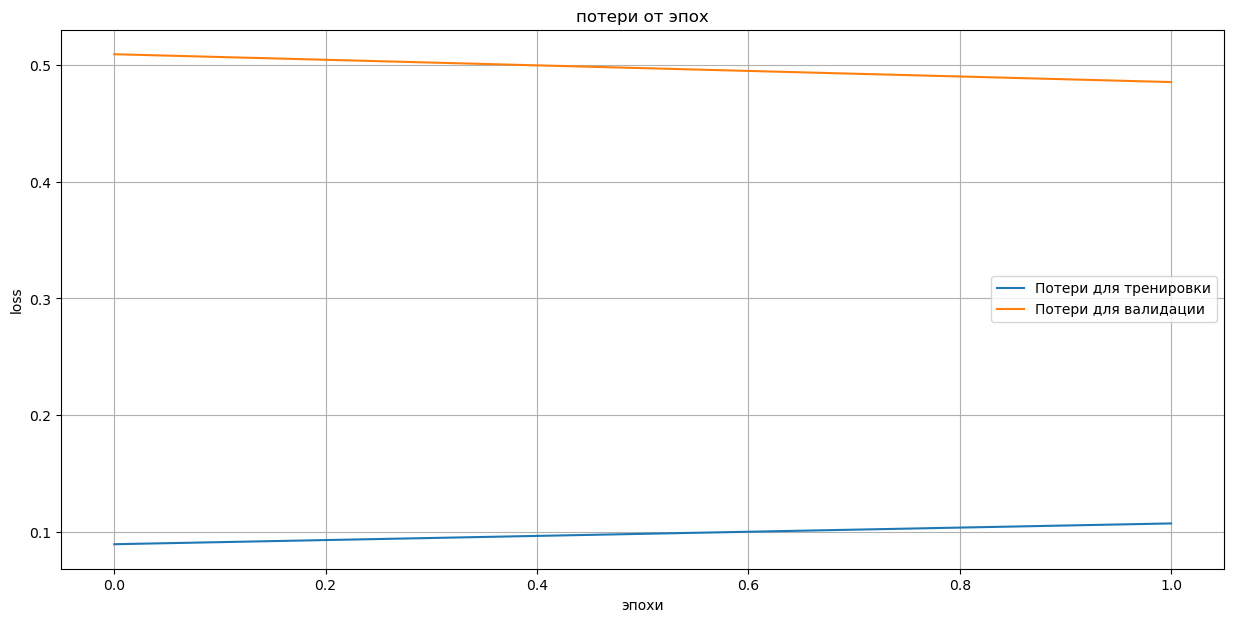

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 92)                72220     
                                                                 
 dense_187 (Dense)           (None, 92)                8556      
                                                                 
Total params: 80,776
Trainable params: 80,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0980 - accuracy: 0.9634 - val_loss: 0.4996 - val_accuracy: 0.8828
Epoch 2/2
313/313 [==============================] - 0s 781us/step - loss: 0.5487 - accuracy: 0.8736


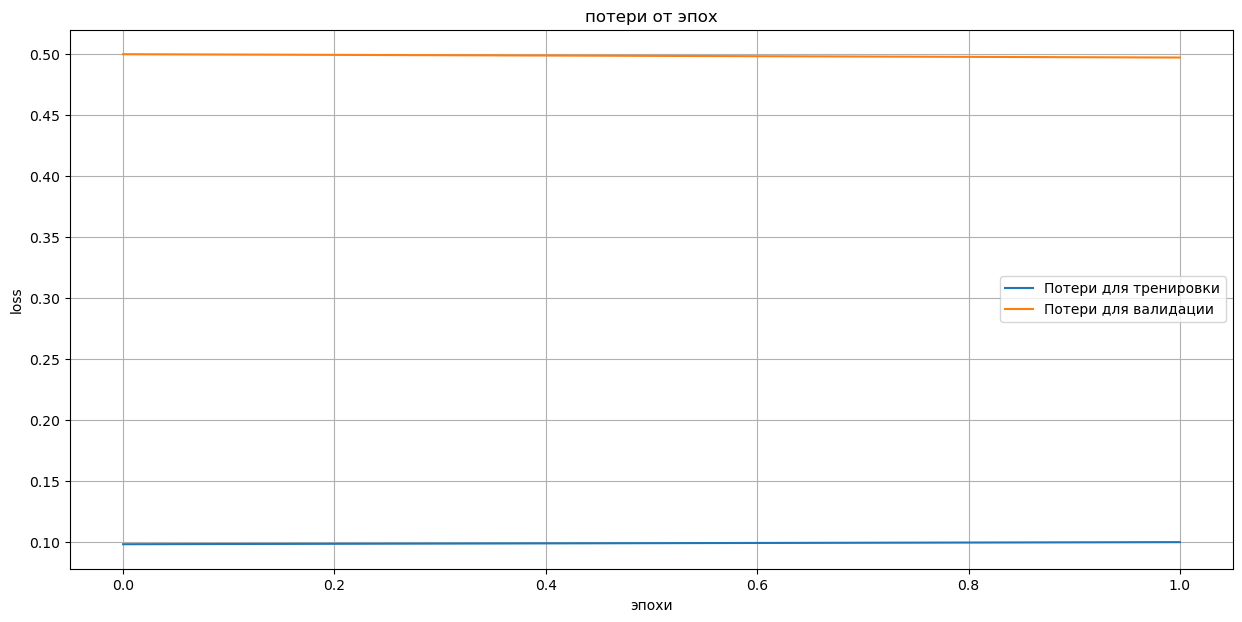

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 93)                73005     
                                                                 
 dense_189 (Dense)           (None, 93)                8742      
                                                                 
Total params: 81,747
Trainable params: 81,747
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0951 - accuracy: 0.9654 - val_loss: 0.5028 - val_accuracy: 0.8823
Epoch 2/2
313/313 [==============================] - 0s 816us/step - loss: 0.5496 - accuracy: 0.8717


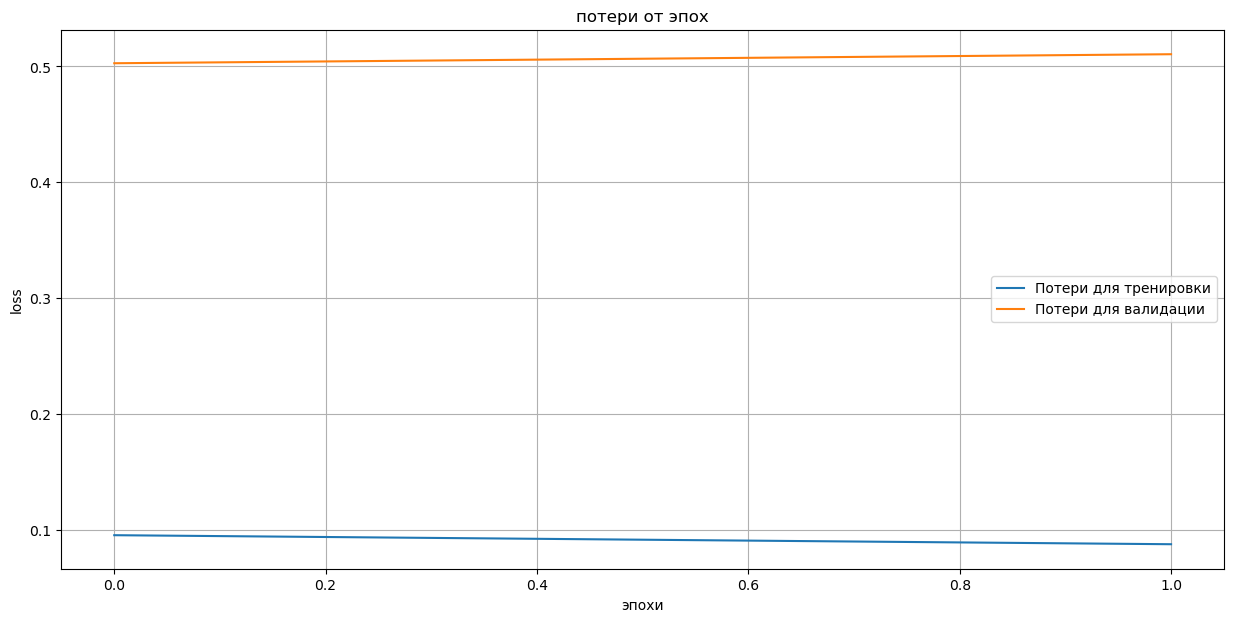

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 94)                73790     
                                                                 
 dense_191 (Dense)           (None, 94)                8930      
                                                                 
Total params: 82,720
Trainable params: 82,720
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1078 - accuracy: 0.9609 - val_loss: 0.5041 - val_accuracy: 0.8830
Epoch 2/2
313/313 [==============================] - 0s 871us/step - loss: 0.5148 - accuracy: 0.8757


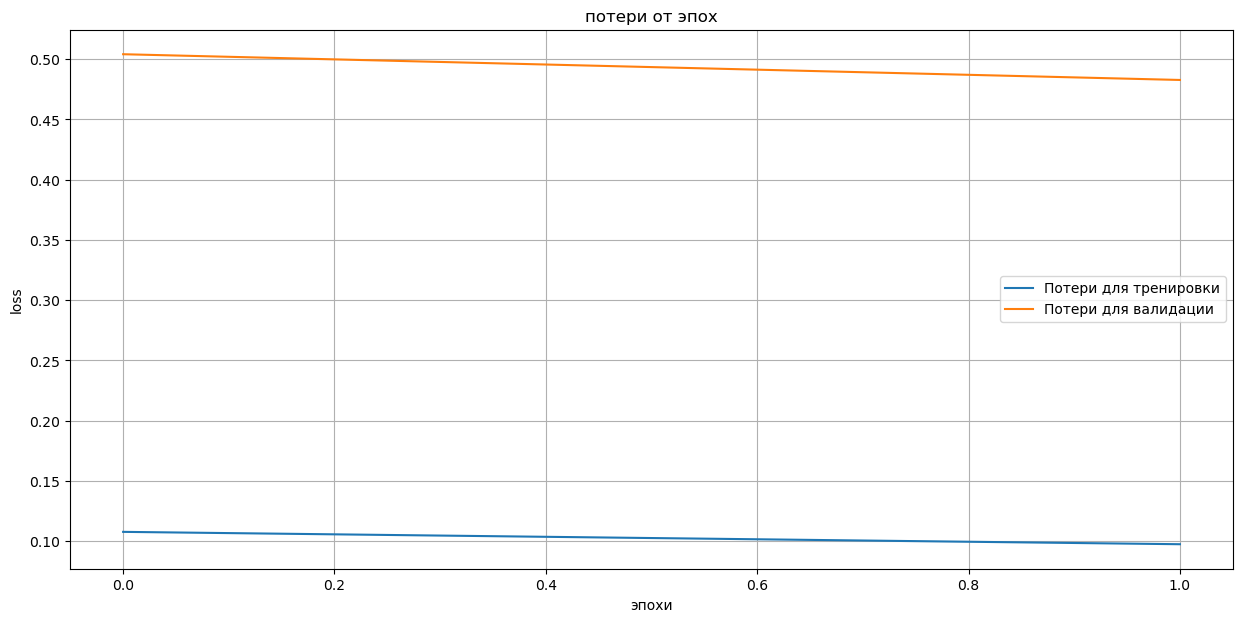

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 95)                74575     
                                                                 
 dense_193 (Dense)           (None, 95)                9120      
                                                                 
Total params: 83,695
Trainable params: 83,695
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1037 - accuracy: 0.9621 - val_loss: 0.4839 - val_accuracy: 0.8849
Epoch 2/2
313/313 [==============================] - 0s 784us/step - loss: 0.5353 - accuracy: 0.8756


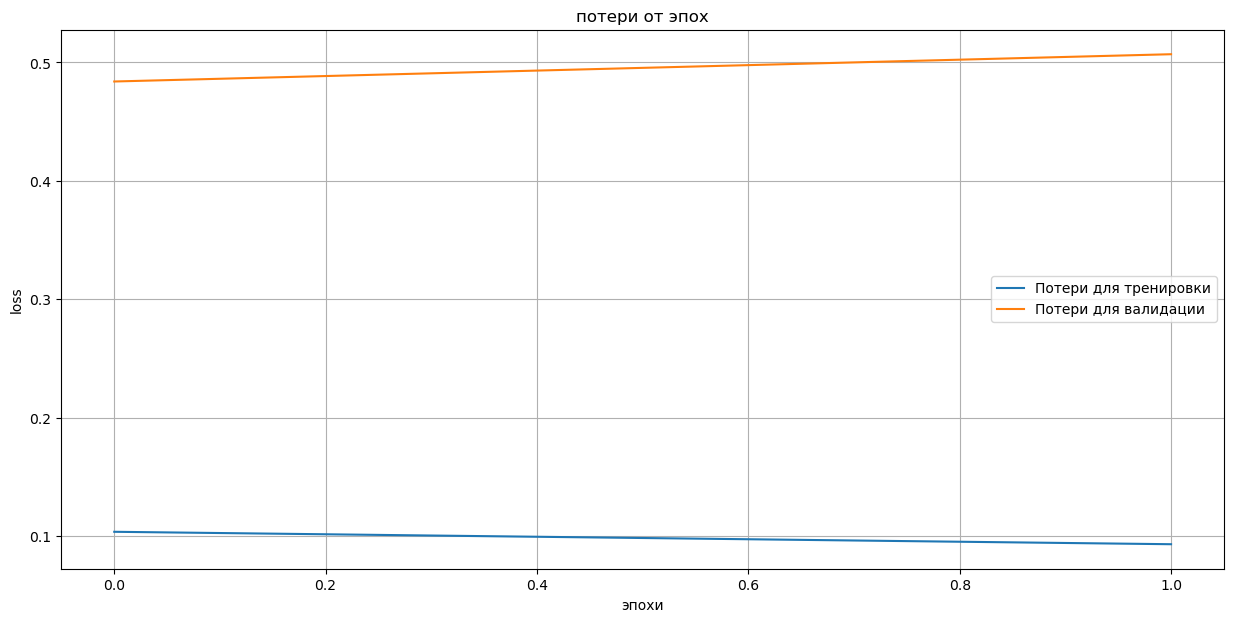

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 96)                75360     
                                                                 
 dense_195 (Dense)           (None, 96)                9312      
                                                                 
Total params: 84,672
Trainable params: 84,672
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.9651 - val_loss: 0.4972 - val_accuracy: 0.8802
Epoch 2/2
313/313 [==============================] - 0s 847us/step - loss: 0.5244 - accuracy: 0.8749


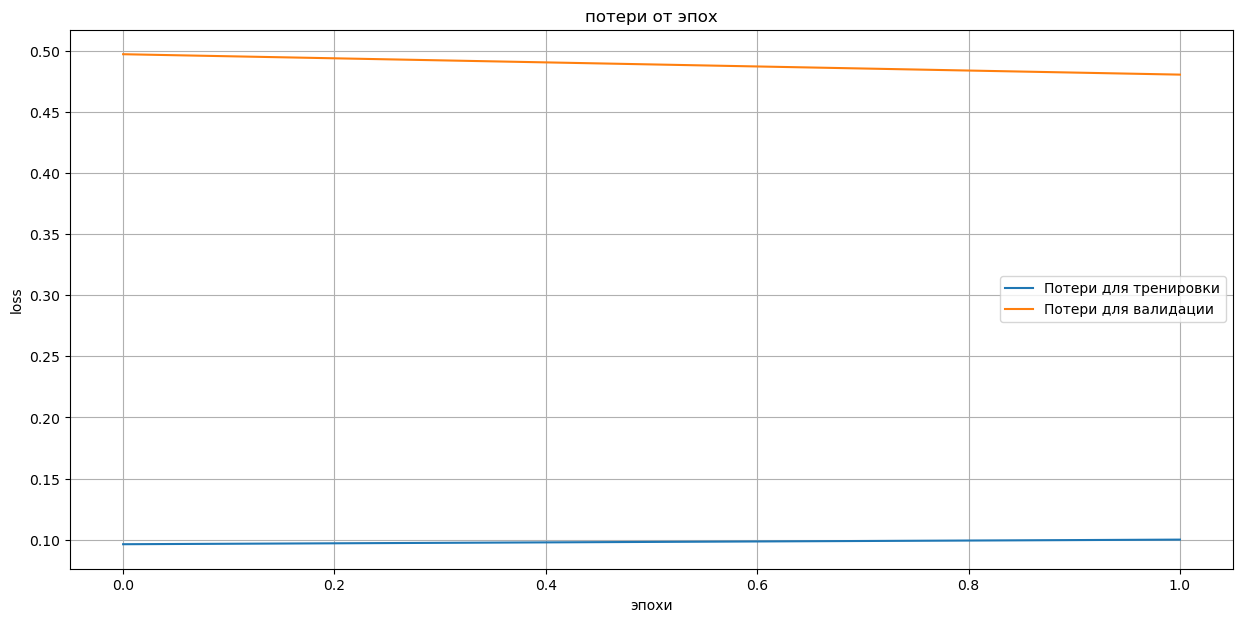

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 97)                76145     
                                                                 
 dense_197 (Dense)           (None, 97)                9506      
                                                                 
Total params: 85,651
Trainable params: 85,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0857 - accuracy: 0.9683 - val_loss: 0.4962 - val_accuracy: 0.8862
Epoch 2/2
313/313 [==============================] - 0s 770us/step - loss: 0.5214 - accuracy: 0.8786


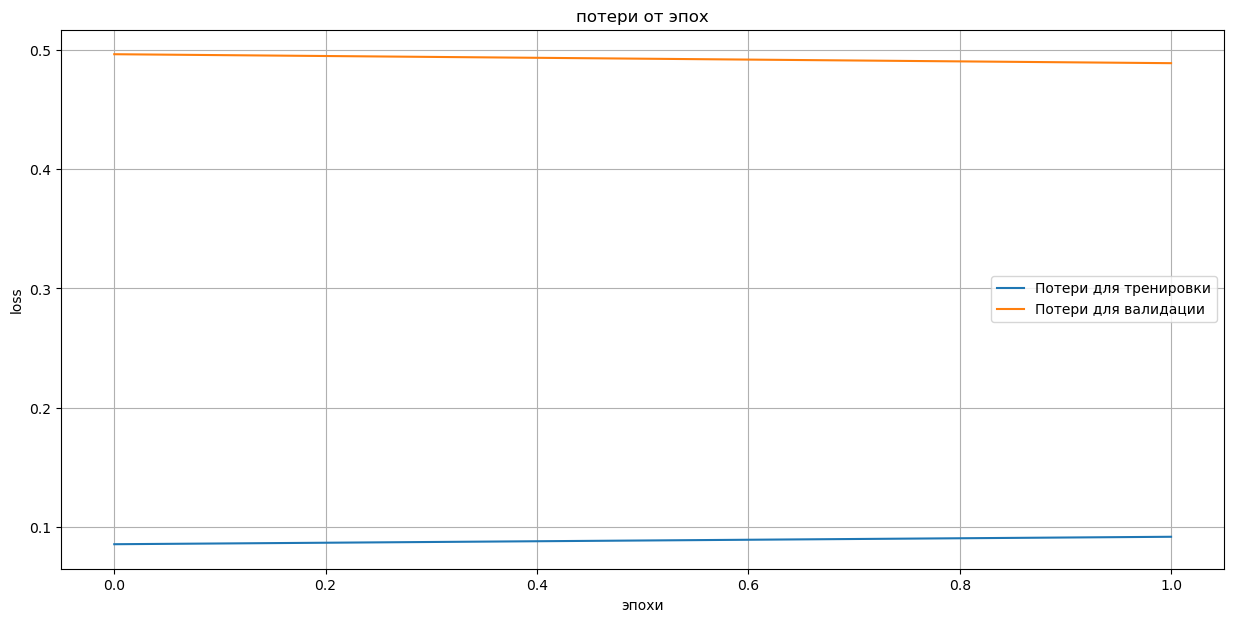

Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_198 (Dense)           (None, 98)                76930     
                                                                 
 dense_199 (Dense)           (None, 98)                9702      
                                                                 
Total params: 86,632
Trainable params: 86,632
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0897 - accuracy: 0.9673 - val_loss: 0.4848 - val_accuracy: 0.8883
Epoch 2/2
313/313 [==============================] - 0s 787us/step - loss: 0.5187 - accuracy: 0.8812


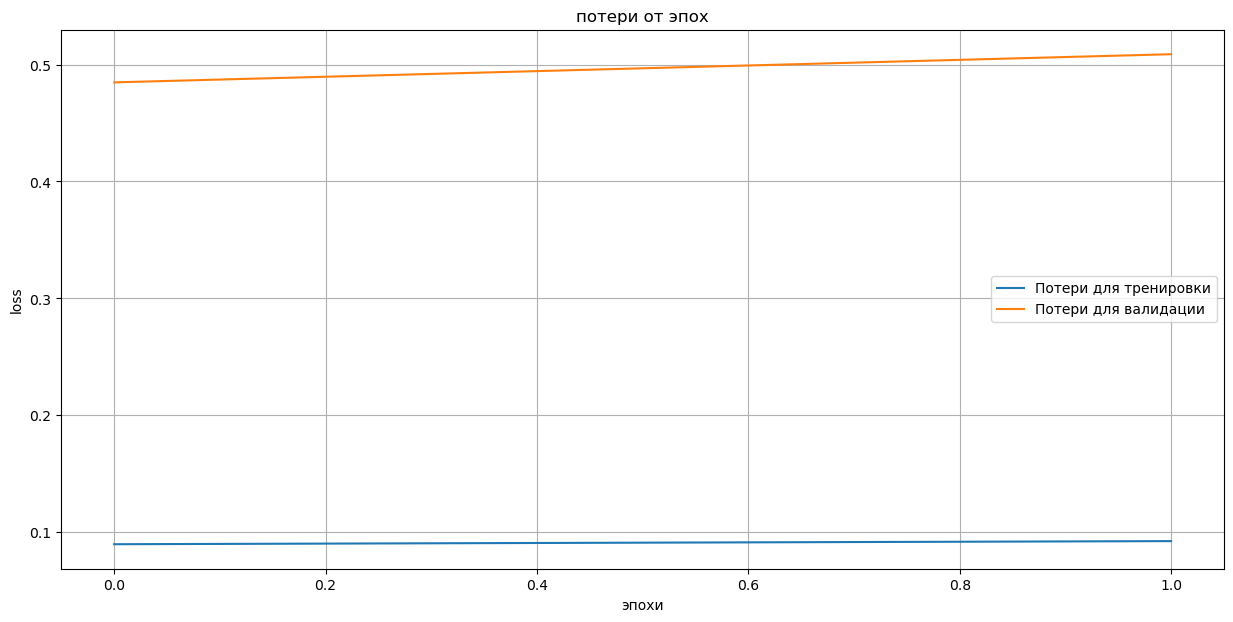

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 99)                77715     
                                                                 
 dense_201 (Dense)           (None, 99)                9900      
                                                                 
Total params: 87,615
Trainable params: 87,615
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0895 - accuracy: 0.9663 - val_loss: 0.5183 - val_accuracy: 0.8811
Epoch 2/2
313/313 [==============================] - 0s 772us/step - loss: 0.5362 - accuracy: 0.8767


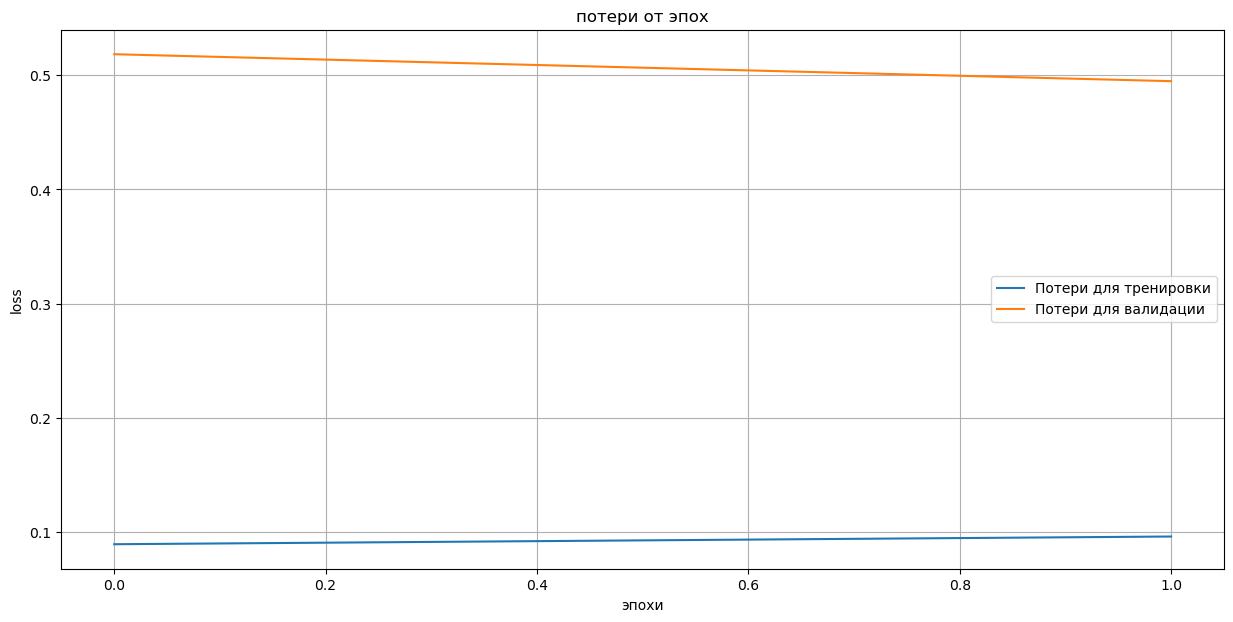

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_202 (Dense)           (None, 100)               78500     
                                                                 
 dense_203 (Dense)           (None, 100)               10100     
                                                                 
Total params: 88,600
Trainable params: 88,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0848 - accuracy: 0.9687 - val_loss: 0.5018 - val_accuracy: 0.8845
Epoch 2/2
313/313 [==============================] - 0s 915us/step - loss: 0.5257 - accuracy: 0.8770


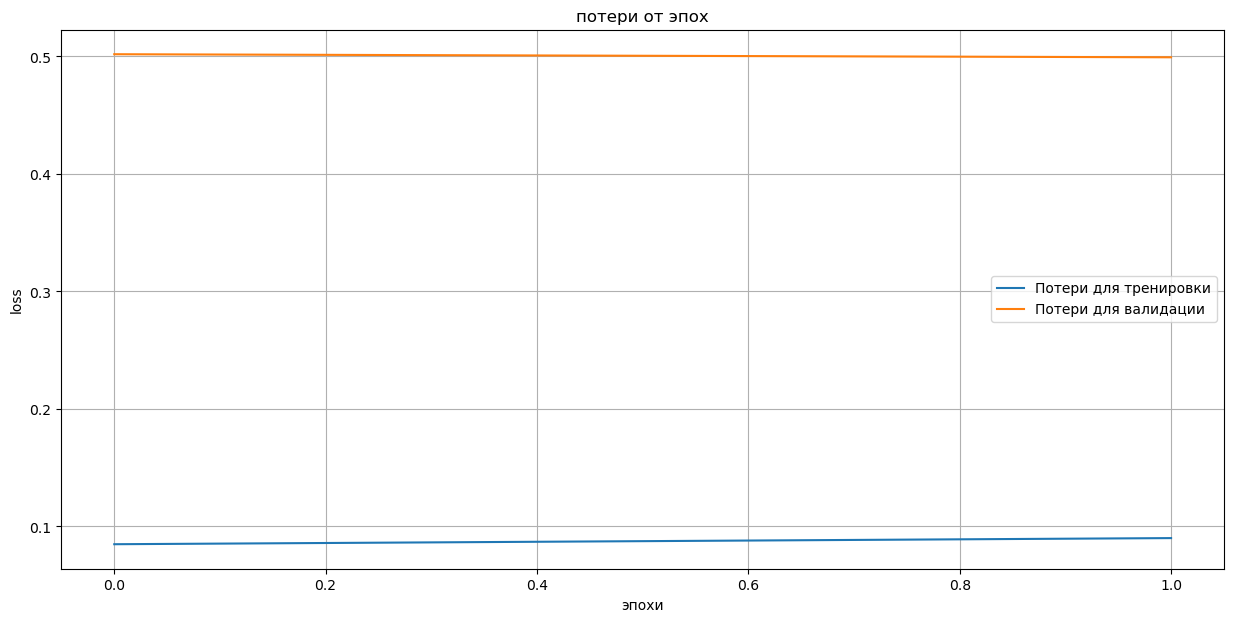

In [14]:
for n in neurons:
    make_model1(n)

In [15]:
def make_model2(layers, neurons=128):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(784,)),
    ])
    
    for layer in range(layers-2):
        model.add(Dense(10+np.abs(10-layer)*10, activation='tanh'))
        
    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        optimizer='adam',
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    model.summary()
    
    hh = model1.fit(
        train_images[:, :],
        y_t[:, :],
        epochs=2,
        batch_size=32,
        validation_split=0.2
    )
    model1.evaluate(
        test_images,
        y_tt
    )
    hh.history
    plt.figure(figsize=(15,7))
    plt.plot(hh.history['loss'], label = 'Потери для тренировки')
    plt.plot(hh.history['val_loss'], label = 'Потери для валидации')
    plt.xlabel('эпохи')
    plt.ylabel('loss')
    plt.legend()
    plt.grid('On')
    plt.title('потери от эпох')
    plt.show()
    return

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 128)               100480    
                                                                 
 dense_205 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1004 - accuracy: 0.9630 - val_loss: 0.5004 - val_accuracy: 0.8859
Epoch 2/2
313/313 [==============================] - 0s 796us/step - loss: 0.5227 - accuracy: 0.8748


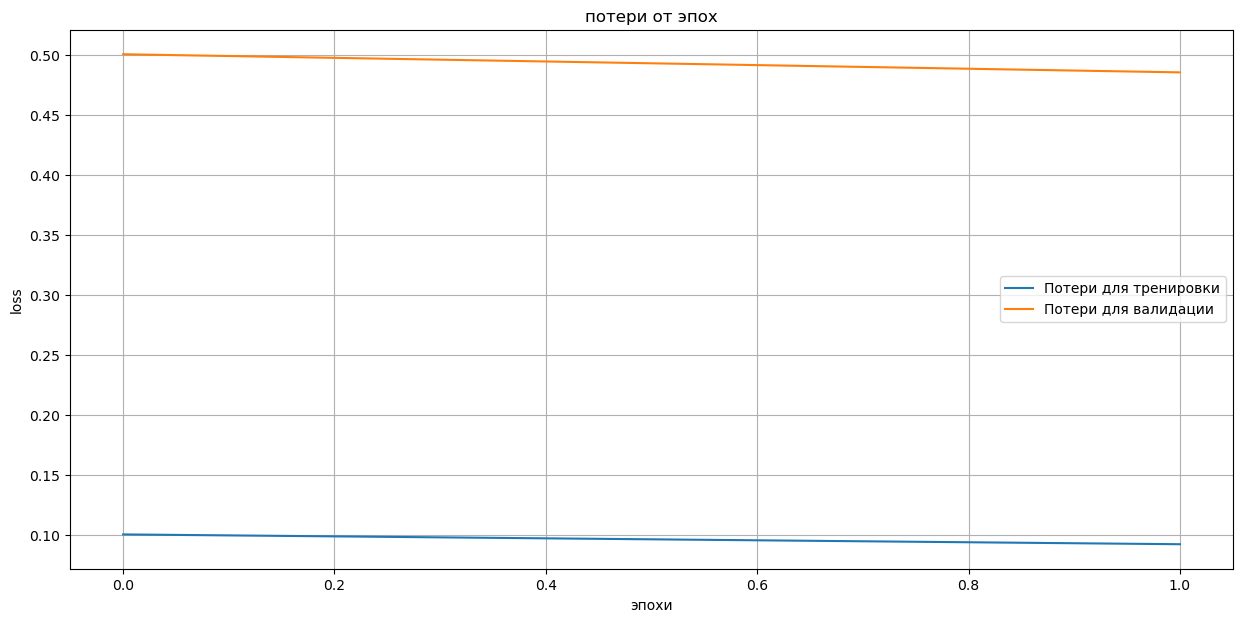

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_206 (Dense)           (None, 128)               100480    
                                                                 
 dense_207 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0932 - accuracy: 0.9661 - val_loss: 0.5026 - val_accuracy: 0.8843
Epoch 2/2
313/313 [==============================] - 0s 801us/step - loss: 0.5260 - accuracy: 0.8764


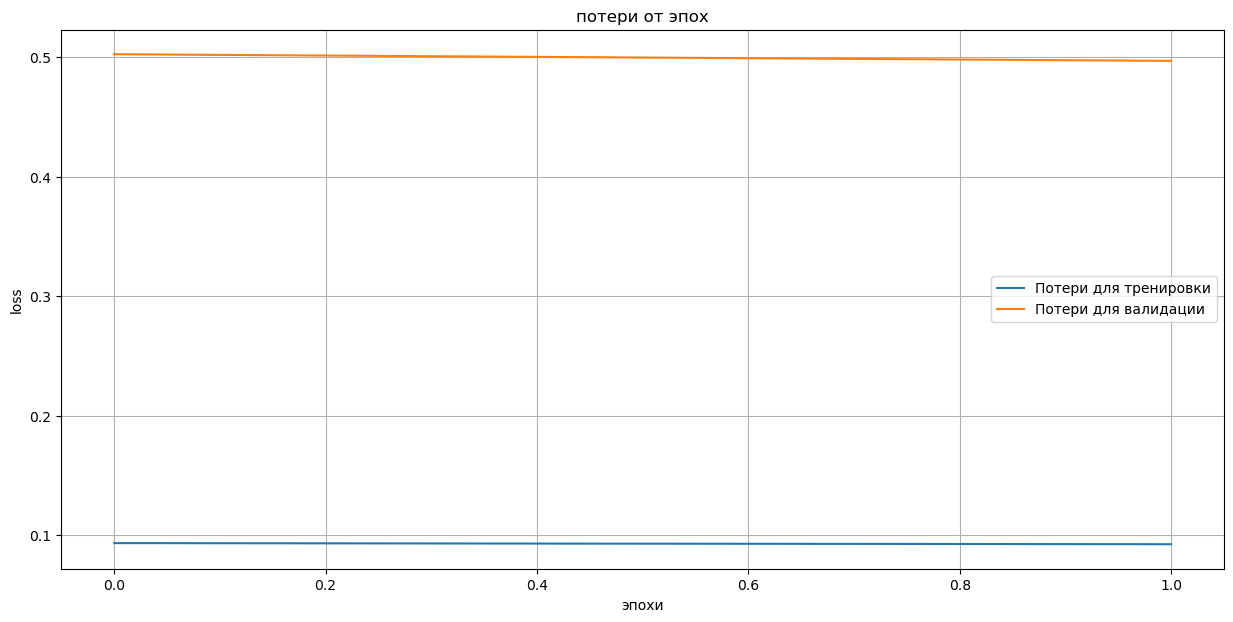

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_208 (Dense)           (None, 128)               100480    
                                                                 
 dense_209 (Dense)           (None, 110)               14190     
                                                                 
 dense_210 (Dense)           (None, 10)                1110      
                                                                 
Total params: 115,780
Trainable params: 115,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0950 - accuracy: 0.9659 - val_loss: 0.4841 - val_accuracy: 0.8831
Epoch 2/2
313/313 [==============================] - 0s 773us/step - loss: 0.5172 - accuracy: 0.8824


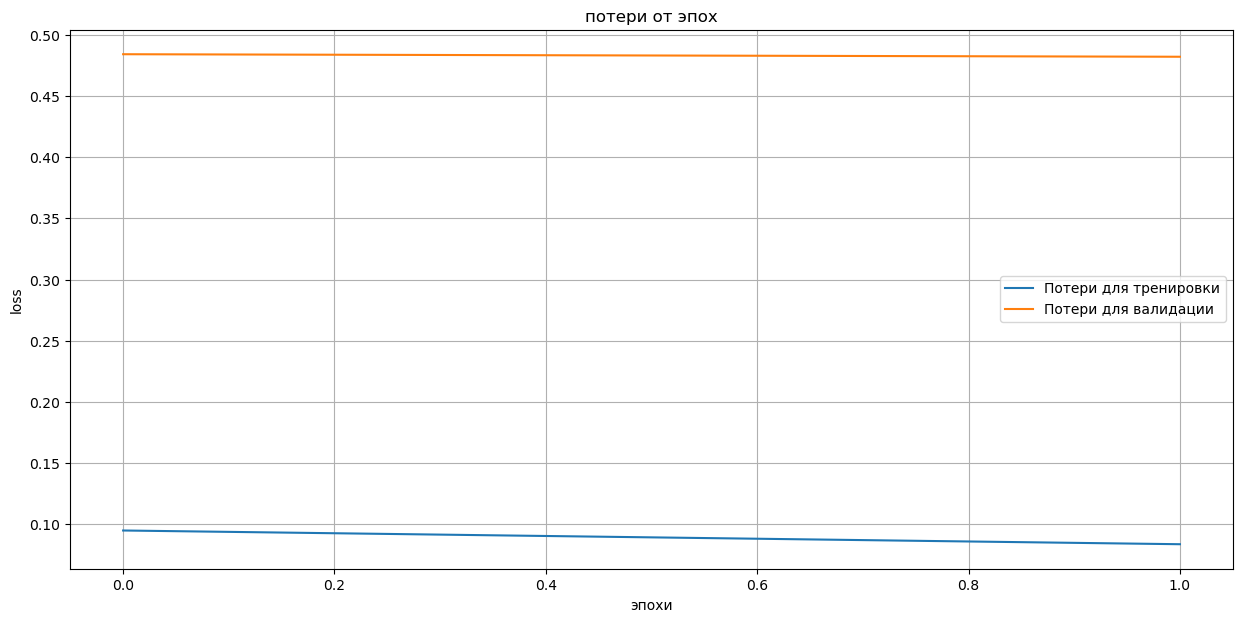

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 128)               100480    
                                                                 
 dense_212 (Dense)           (None, 110)               14190     
                                                                 
 dense_213 (Dense)           (None, 100)               11100     
                                                                 
 dense_214 (Dense)           (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0882 - accuracy: 0.9675 - val_loss: 0.4839 - val_accuracy: 0.8845
Epoch 2/2
313/313 [================

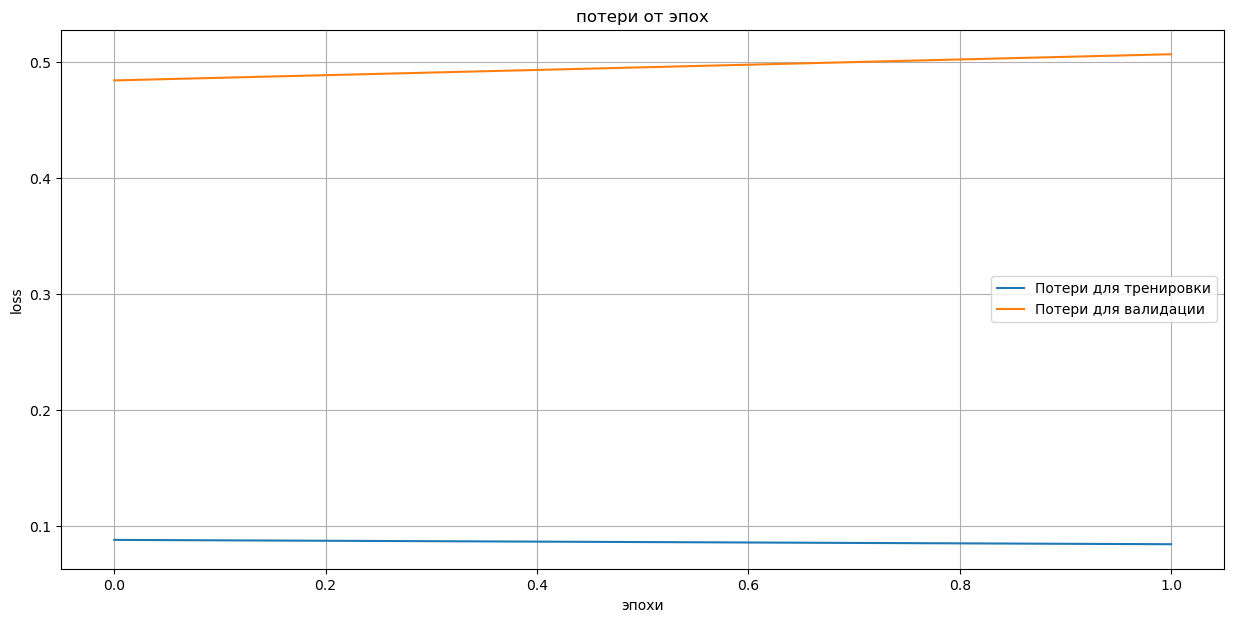

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_215 (Dense)           (None, 128)               100480    
                                                                 
 dense_216 (Dense)           (None, 110)               14190     
                                                                 
 dense_217 (Dense)           (None, 100)               11100     
                                                                 
 dense_218 (Dense)           (None, 90)                9090      
                                                                 
 dense_219 (Dense)           (None, 10)                910       
                                                                 
Total params: 135,770
Trainable params: 135,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1500/1500 [=========================

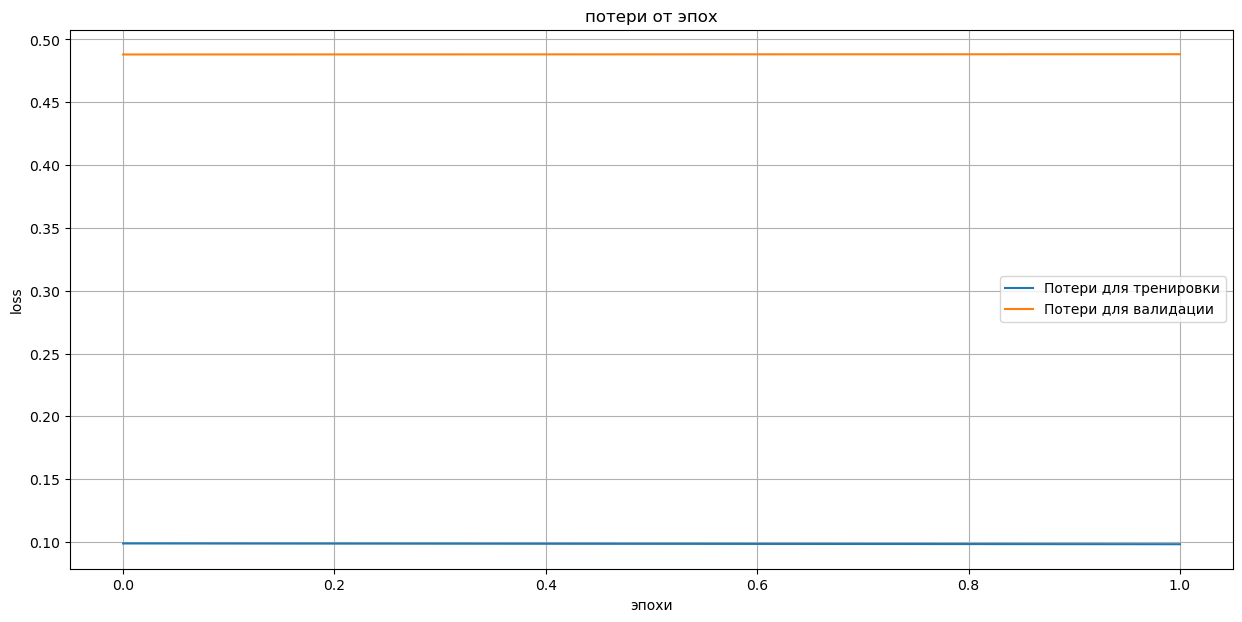

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 128)               100480    
                                                                 
 dense_221 (Dense)           (None, 110)               14190     
                                                                 
 dense_222 (Dense)           (None, 100)               11100     
                                                                 
 dense_223 (Dense)           (None, 90)                9090      
                                                                 
 dense_224 (Dense)           (None, 80)                7280      
                                                                 
 dense_225 (Dense)           (None, 10)                810       
                                                                 
Total params: 142,950
Trainable params: 142,950
Non-

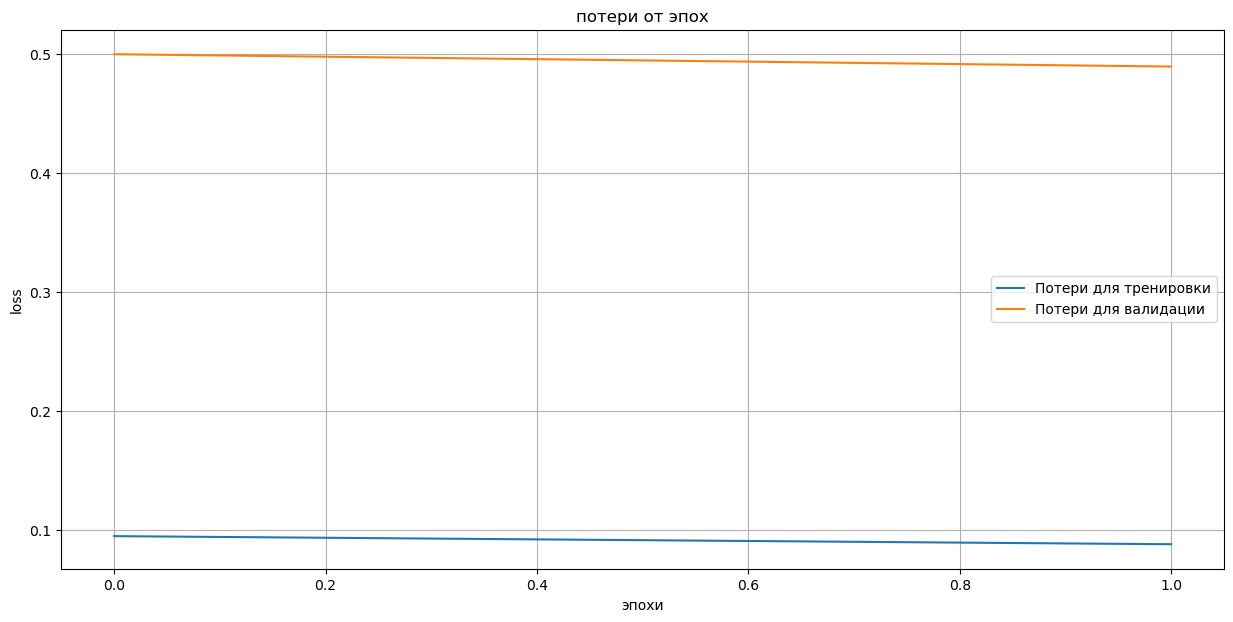

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_226 (Dense)           (None, 128)               100480    
                                                                 
 dense_227 (Dense)           (None, 110)               14190     
                                                                 
 dense_228 (Dense)           (None, 100)               11100     
                                                                 
 dense_229 (Dense)           (None, 90)                9090      
                                                                 
 dense_230 (Dense)           (None, 80)                7280      
                                                                 
 dense_231 (Dense)           (None, 70)                5670      
                                                                 
 dense_232 (Dense)           (None, 10)             

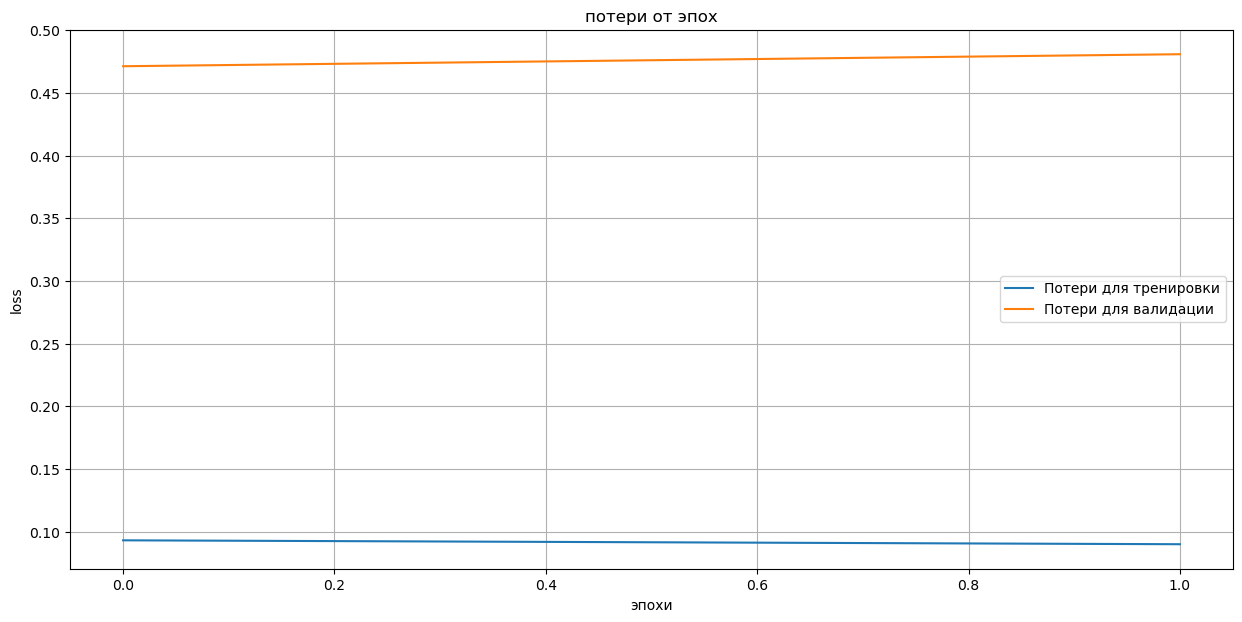

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_233 (Dense)           (None, 128)               100480    
                                                                 
 dense_234 (Dense)           (None, 110)               14190     
                                                                 
 dense_235 (Dense)           (None, 100)               11100     
                                                                 
 dense_236 (Dense)           (None, 90)                9090      
                                                                 
 dense_237 (Dense)           (None, 80)                7280      
                                                                 
 dense_238 (Dense)           (None, 70)                5670      
                                                                 
 dense_239 (Dense)           (None, 60)             

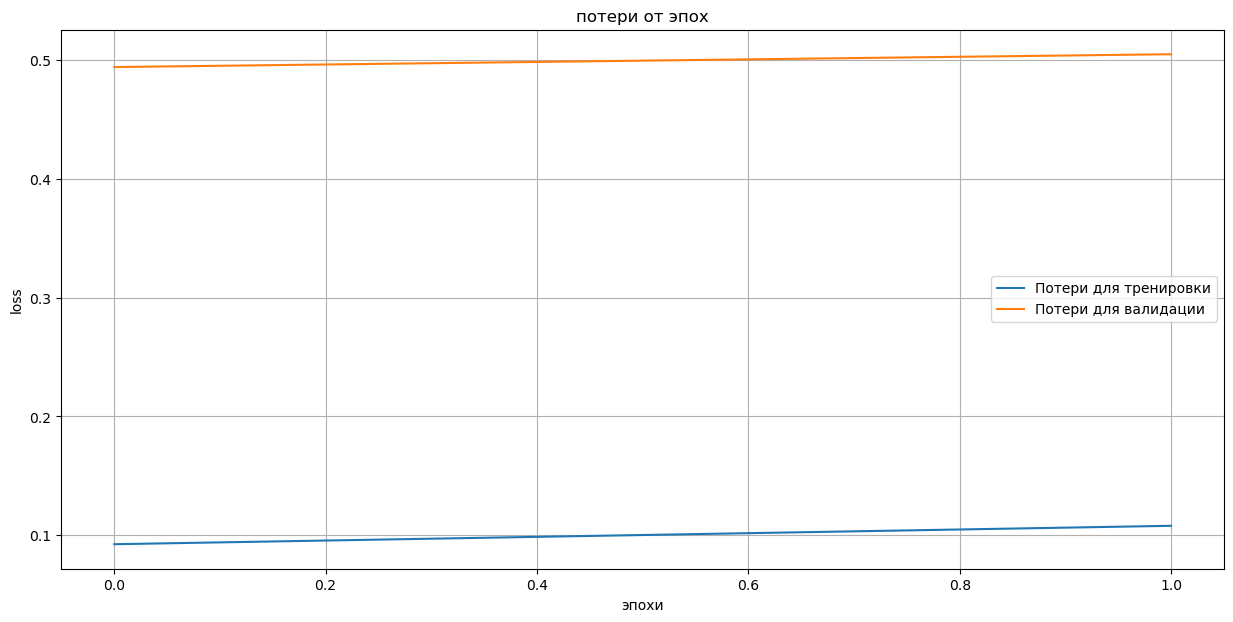

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_241 (Dense)           (None, 128)               100480    
                                                                 
 dense_242 (Dense)           (None, 110)               14190     
                                                                 
 dense_243 (Dense)           (None, 100)               11100     
                                                                 
 dense_244 (Dense)           (None, 90)                9090      
                                                                 
 dense_245 (Dense)           (None, 80)                7280      
                                                                 
 dense_246 (Dense)           (None, 70)                5670      
                                                                 
 dense_247 (Dense)           (None, 60)             

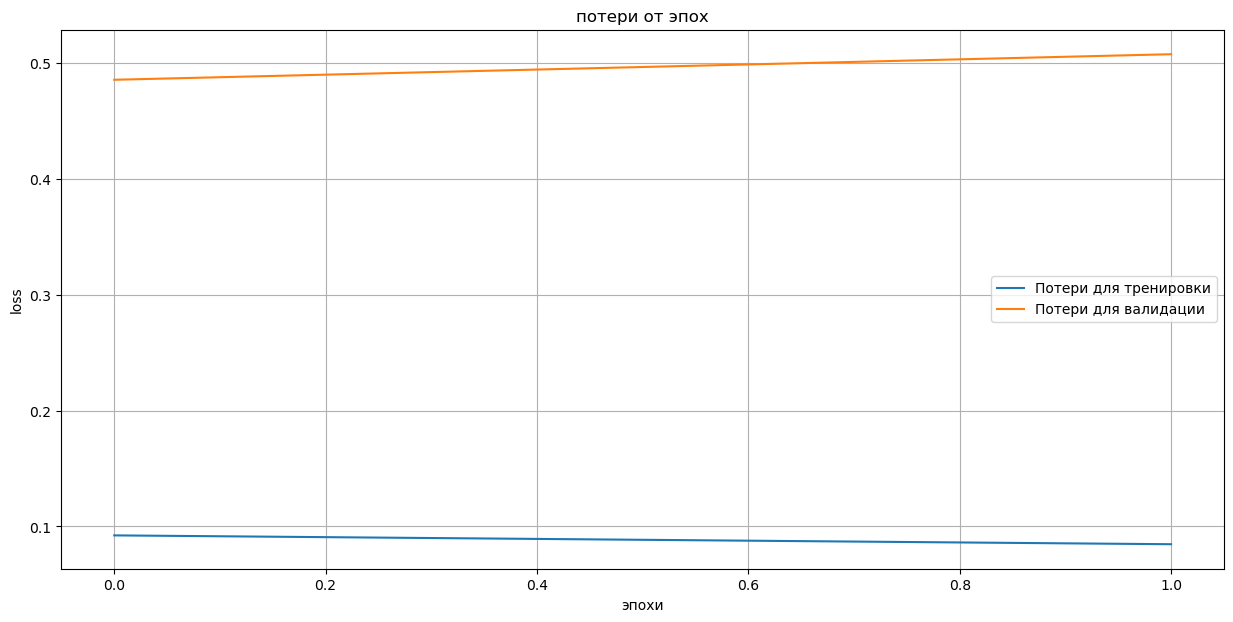

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_250 (Dense)           (None, 128)               100480    
                                                                 
 dense_251 (Dense)           (None, 110)               14190     
                                                                 
 dense_252 (Dense)           (None, 100)               11100     
                                                                 
 dense_253 (Dense)           (None, 90)                9090      
                                                                 
 dense_254 (Dense)           (None, 80)                7280      
                                                                 
 dense_255 (Dense)           (None, 70)                5670      
                                                                 
 dense_256 (Dense)           (None, 60)             

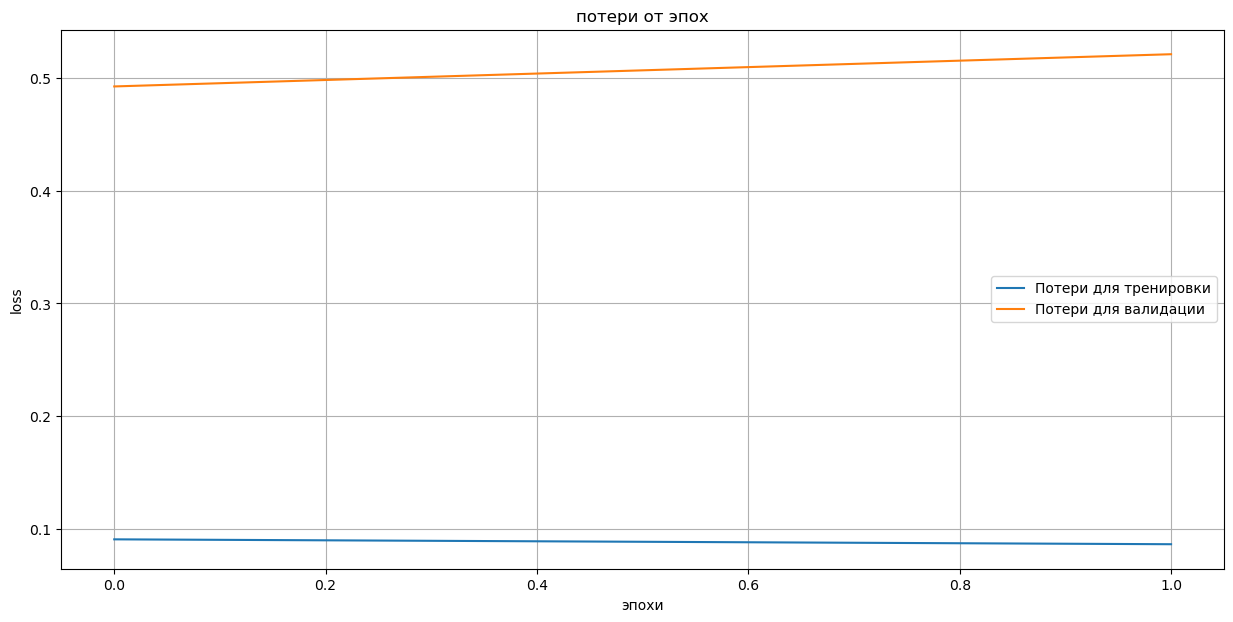

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 128)               100480    
                                                                 
 dense_261 (Dense)           (None, 110)               14190     
                                                                 
 dense_262 (Dense)           (None, 100)               11100     
                                                                 
 dense_263 (Dense)           (None, 90)                9090      
                                                                 
 dense_264 (Dense)           (None, 80)                7280      
                                                                 
 dense_265 (Dense)           (None, 70)                5670      
                                                                 
 dense_266 (Dense)           (None, 60)             

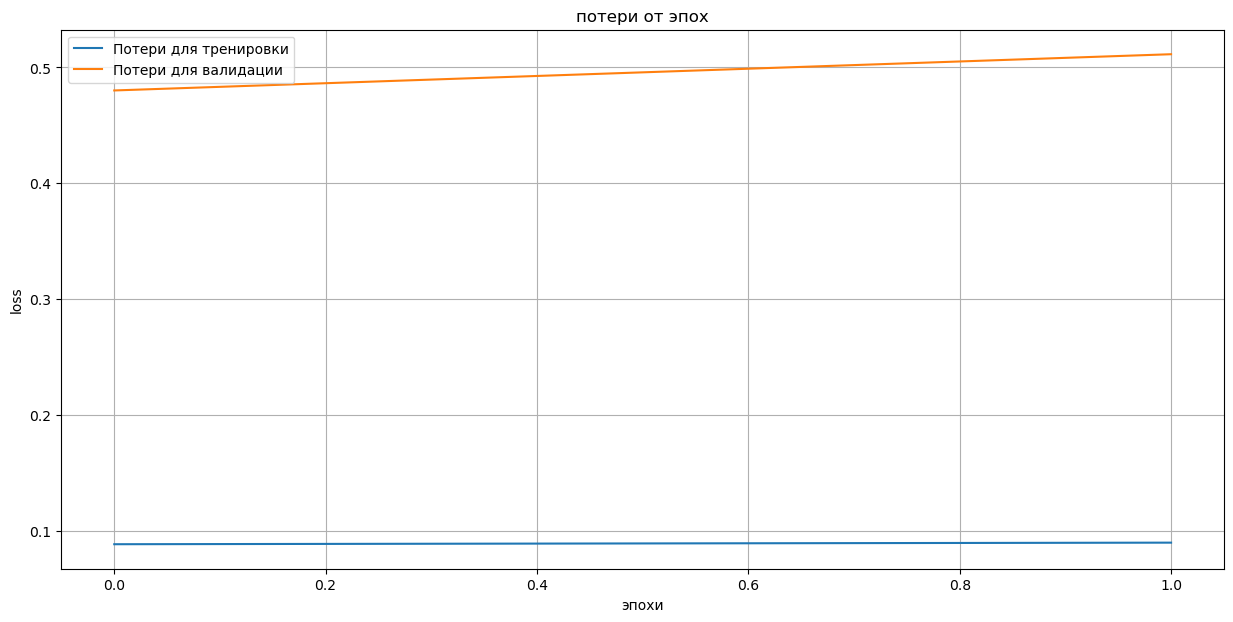

Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_271 (Dense)           (None, 128)               100480    
                                                                 
 dense_272 (Dense)           (None, 110)               14190     
                                                                 
 dense_273 (Dense)           (None, 100)               11100     
                                                                 
 dense_274 (Dense)           (None, 90)                9090      
                                                                 
 dense_275 (Dense)           (None, 80)                7280      
                                                                 
 dense_276 (Dense)           (None, 70)                5670      
                                                                 
 dense_277 (Dense)           (None, 60)             

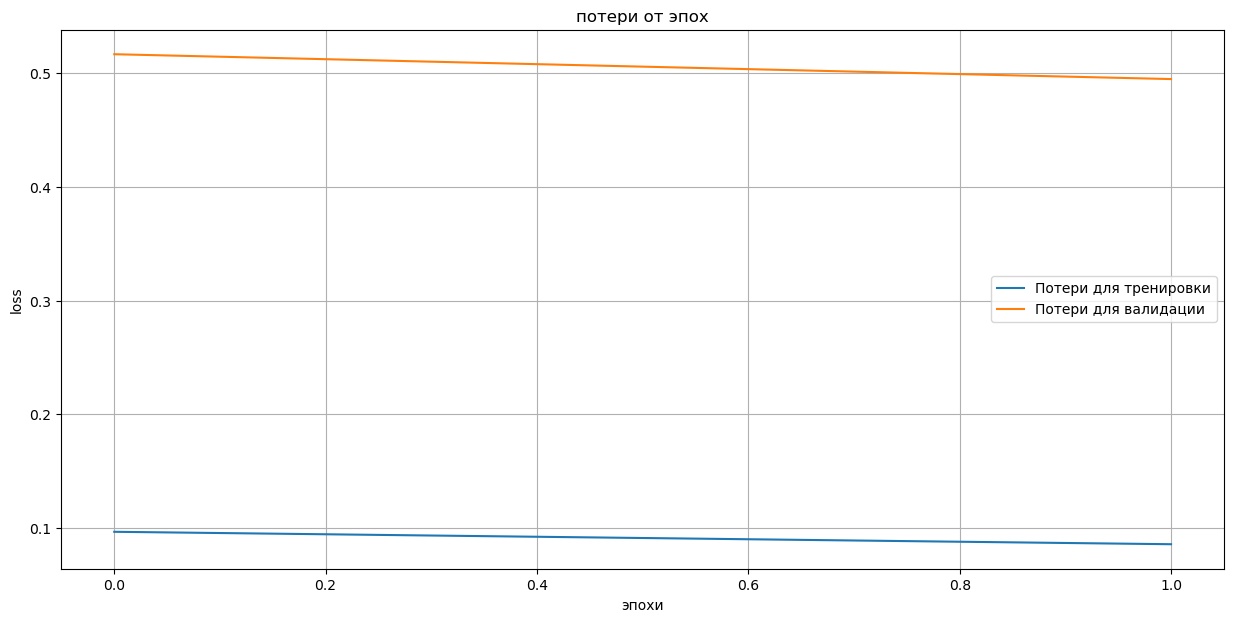

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_283 (Dense)           (None, 128)               100480    
                                                                 
 dense_284 (Dense)           (None, 110)               14190     
                                                                 
 dense_285 (Dense)           (None, 100)               11100     
                                                                 
 dense_286 (Dense)           (None, 90)                9090      
                                                                 
 dense_287 (Dense)           (None, 80)                7280      
                                                                 
 dense_288 (Dense)           (None, 70)                5670      
                                                                 
 dense_289 (Dense)           (None, 60)             

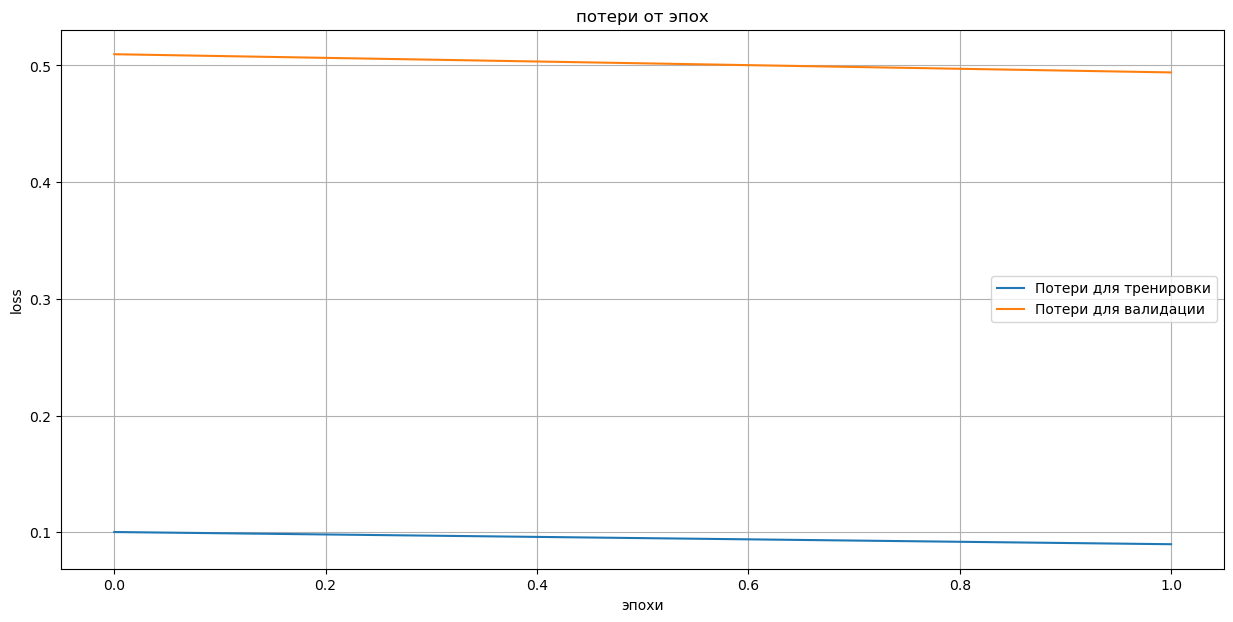

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_296 (Dense)           (None, 128)               100480    
                                                                 
 dense_297 (Dense)           (None, 110)               14190     
                                                                 
 dense_298 (Dense)           (None, 100)               11100     
                                                                 
 dense_299 (Dense)           (None, 90)                9090      
                                                                 
 dense_300 (Dense)           (None, 80)                7280      
                                                                 
 dense_301 (Dense)           (None, 70)                5670      
                                                                 
 dense_302 (Dense)           (None, 60)             

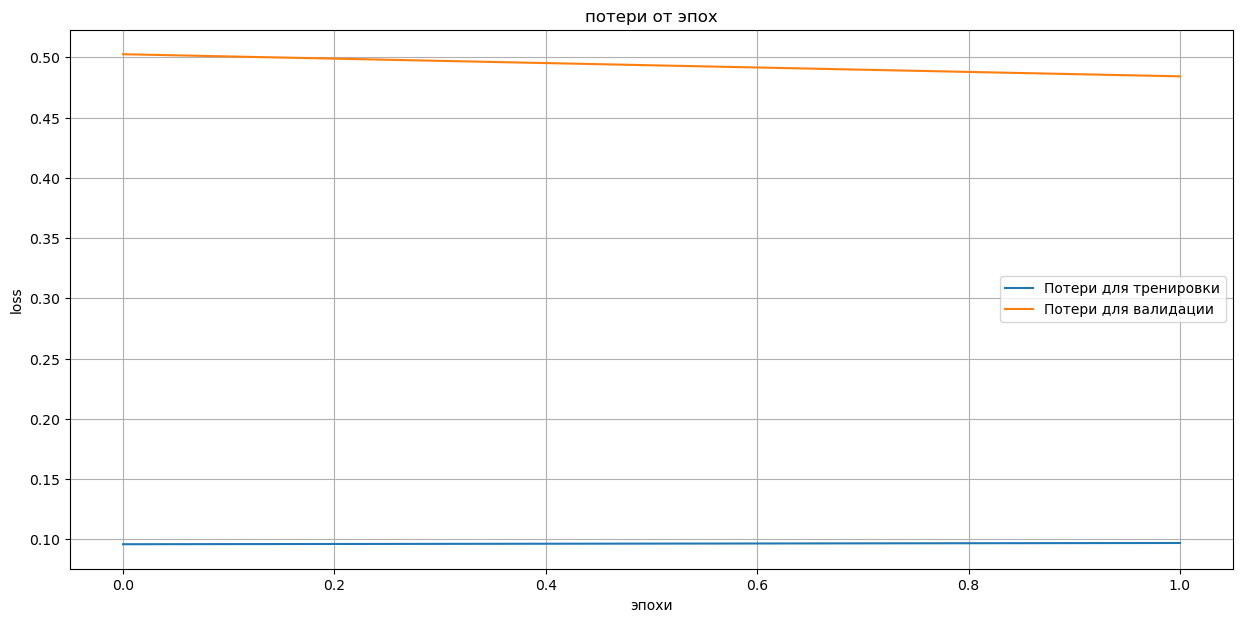

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 128)               100480    
                                                                 
 dense_311 (Dense)           (None, 110)               14190     
                                                                 
 dense_312 (Dense)           (None, 100)               11100     
                                                                 
 dense_313 (Dense)           (None, 90)                9090      
                                                                 
 dense_314 (Dense)           (None, 80)                7280      
                                                                 
 dense_315 (Dense)           (None, 70)                5670      
                                                                 
 dense_316 (Dense)           (None, 60)             

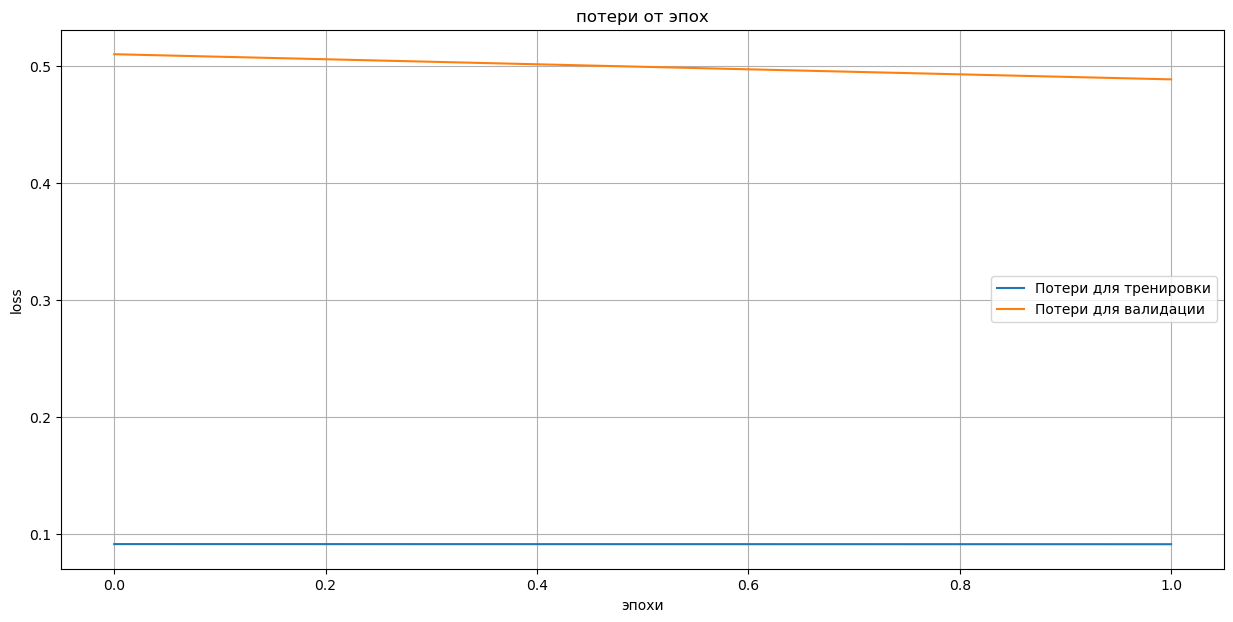

In [16]:
layers = np.arange(1,16)

for l in layers:
    make_model2(l)

Вывод: разное количество слоев дает различный результат, оптимальный вариант необходимо подбирать экспериментальным путем.

__Задача 2__
2 Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1

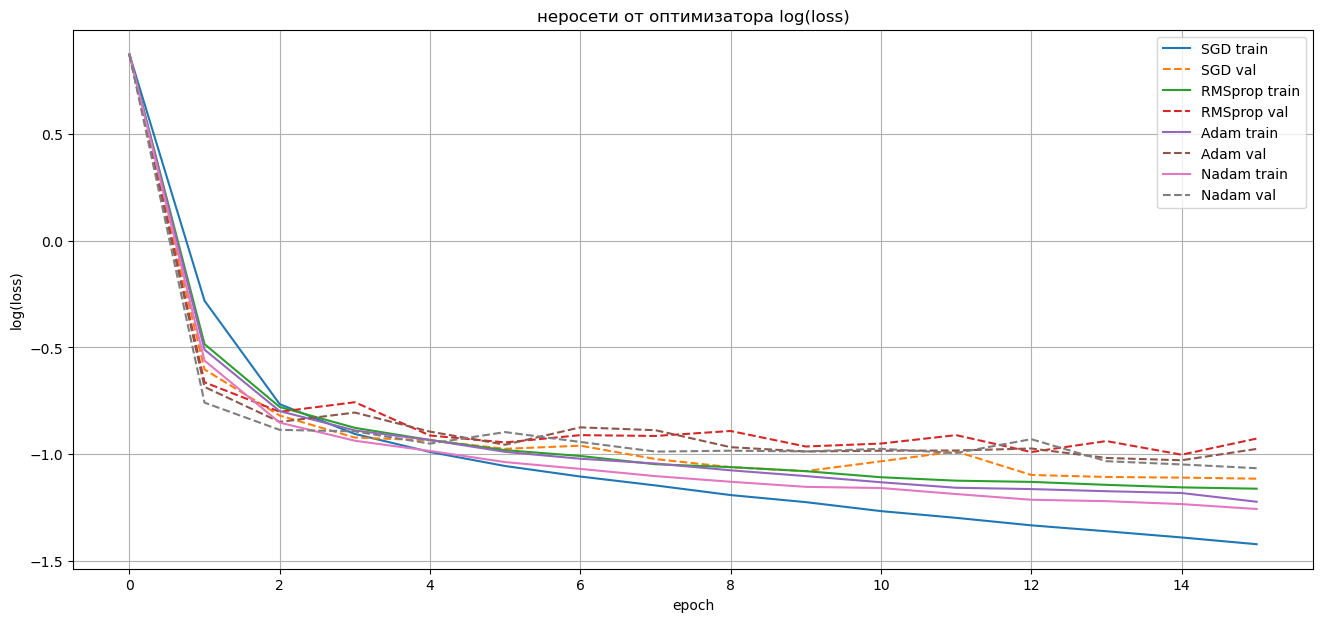

In [17]:
model2 = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
    ])
    
for layer in range(9):
        model2.add(Dense(10+np.abs(10-layer)*10, activation='tanh'))
        
model2.add(Dense(10, activation='softmax'))
model2.save_weights('model.h5')

plt.figure(figsize=(16,7))

epochs = 15

epoch = np.arange(epochs+1)

for i_optim in ['SGD', 'RMSProp', 'adam', 'NAdam']:
    modeli = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
    ])
    for layer in range(9):
        modeli.add(Dense(10+np.abs(10-layer)*10, activation='tanh'))
        
    modeli.add(Dense(10, activation='softmax'))
    
    modeli.load_weights('model.h5')
    
    modeli.compile(
        optimizer=i_optim,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]), verbose=0)
    
    hh = modeli.fit(
        train_images,
        to_categorical(train_labels),
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    plt.plot(epoch, np.log([hh0_tr[0]]+hh.history['loss']), '-', label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch, np.log([hh0_val[0]]+hh.history['val_loss']), '--', label = modeli.optimizer.get_config()['name']+' val')
    
plt.legend()
plt.grid('On')
plt.title('неросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

__Задача 3__  
3 Сделайте выод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Улучшить качество модели можно подбором оптимального соотношения параметров, таких как количество нейронов и слоев, количество эпох обучения, подбором оптимизатора. Всё зависит от конкретной задачи. В представленном примере лучше всего справилась модель из одинналдцати слоев с оптимизатором 'SGD'(стохастический градиентный спуск), количество эпох для обучения 12, далее модель начинает переобучаться, что видно на валидационных данных

__Задача 4__
Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно(полнота, точность). Сделайте вывод.

In [22]:
from sklearn.metrics import multilabel_confusion_matrix

In [19]:
model4 = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
    ])

for layer in range(9):
    model4.add(Dense(10+np.abs(10-layer)*10, activation='tanh'))
        
model4.add(Dense(10, activation='softmax'))
    
model4.compile(
    optimizer='SGD',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
    
hh0_tr = model4.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
hh0_val = model4.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]), verbose=0)
    
model4.fit(
    train_images,
    to_categorical(train_labels),
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

In [20]:
predictions = model4.predict(test_images)

313/313 [==============================] - 0s 827us/step


In [23]:
multilabel_confusion_matrix(test_labels, predictions.argmax(axis=1))

array([[[8851,  149],
        [ 189,  811]],

       [[8982,   18],
        [  34,  966]],

       [[8634,  366],
        [ 132,  868]],

       [[8896,  104],
        [ 141,  859]],

       [[8804,  196],
        [ 216,  784]],

       [[8924,   76],
        [  31,  969]],

       [[8730,  270],
        [ 357,  643]],

       [[8960,   40],
        [ 116,  884]],

       [[8979,   21],
        [  55,  945]],

       [[8928,   72],
        [  41,  959]]])